1. Importación de Bibliotecas

In [11]:
# Bibliotecas básicas para análisis de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para visualizaciones
plt.style.use('seaborn-v0_8-whitegrid')
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'

# Para análisis estadístico
import scipy.stats as stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Para análisis de series temporales
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import pmdarima as pm
from datetime import datetime, timedelta

# Para ignorar advertencias
import warnings
warnings.filterwarnings('ignore')

# Para visualizaciones interactivas (opcional)
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    plotly_available = True
except ImportError:
    plotly_available = False
    print("Plotly no está instalado. Las visualizaciones interactivas no estarán disponibles.")

# Para guardar modelos
import pickle
import joblib

# Para configurar la visualización de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.2f}'.format)

print("Bibliotecas importadas correctamente para análisis de series temporales y modelado ARIMAX.")

Bibliotecas importadas correctamente para análisis de series temporales y modelado ARIMAX.


2. Carga de Datos

In [12]:
# Definir rutas de los archivos
ruta_base = "data/"
ruta_defensas = ruta_base + "Defensas_Unificados.csv"
ruta_goleadores = ruta_base + "Goleadores_Unificados.csv"
ruta_porteros = ruta_base + "Porteros_Unificados.csv"

# Cargar datasets
try:
    # Intentar cargar con codificación UTF-8
    df_defensas = pd.read_csv(ruta_defensas, encoding='utf-8')
    df_goleadores = pd.read_csv(ruta_goleadores, encoding='utf-8')
    df_porteros = pd.read_csv(ruta_porteros, encoding='utf-8')
    print("Archivos cargados correctamente con codificación UTF-8.")
except UnicodeDecodeError:
    # Si falla, intentar con latin-1
    df_defensas = pd.read_csv(ruta_defensas, encoding='latin-1')
    df_goleadores = pd.read_csv(ruta_goleadores, encoding='latin-1')
    df_porteros = pd.read_csv(ruta_porteros, encoding='latin-1')
    print("Archivos cargados correctamente con codificación latin-1.")

# Información básica sobre los datasets
print("\n--- INFORMACIÓN DE LOS DATASETS ---")

print("\nDataset de Defensas:")
print(f"Número de filas: {df_defensas.shape[0]}")
print(f"Número de columnas: {df_defensas.shape[1]}")

print("\nDataset de Goleadores:")
print(f"Número de filas: {df_goleadores.shape[0]}")
print(f"Número de columnas: {df_goleadores.shape[1]}")

print("\nDataset de Porteros:")
print(f"Número de filas: {df_porteros.shape[0]}")
print(f"Número de columnas: {df_porteros.shape[1]}")

# Mostrar las primeras filas de cada dataset
print("\n--- PRIMERAS FILAS DE CADA DATASET ---")

print("\nDataset de Defensas (primeras 3 filas):")
display(df_defensas.head(3))

print("\nDataset de Goleadores (primeras 3 filas):")
display(df_goleadores.head(3))

print("\nDataset de Porteros (primeras 3 filas):")
display(df_porteros.head(3))

# Información sobre los tipos de datos
print("\n--- TIPOS DE DATOS EN CADA DATASET ---")

print("\nTipos de datos en Dataset de Defensas:")
display(df_defensas.dtypes)

print("\nTipos de datos en Dataset de Goleadores:")
display(df_goleadores.dtypes)

print("\nTipos de datos en Dataset de Porteros:")
display(df_porteros.dtypes)

# Verificar valores nulos
print("\n--- VALORES NULOS EN CADA DATASET ---")

print("\nValores nulos en Dataset de Defensas:")
display(df_defensas.isnull().sum())

print("\nValores nulos en Dataset de Goleadores:")
display(df_goleadores.isnull().sum())

print("\nValores nulos en Dataset de Porteros:")
display(df_porteros.isnull().sum())

Archivos cargados correctamente con codificación UTF-8.

--- INFORMACIÓN DE LOS DATASETS ---

Dataset de Defensas:
Número de filas: 550
Número de columnas: 31

Dataset de Goleadores:
Número de filas: 662
Número de columnas: 31

Dataset de Porteros:
Número de filas: 647
Número de columnas: 23

--- PRIMERAS FILAS DE CADA DATASET ---

Dataset de Defensas (primeras 3 filas):


,Jugador,Temporada,Fecha,Competición,Equipo,Oponente,Resultado,Goles,Asistencias,partido,Día de la semana,Ronda o Fase,Sede,Titular,Posición,Minutos,Penales marcados,Penales intentados,Tiros totales,Tiros a puerta,Tarjetas amarillas,Tarjetas rojas,Faltas cometidas,Faltas recibidas,Fuera de juego,Centros,Entradas ganadas,Intercepciones,Goles en propia,Penales ganados,Penales concedidos
0,Didider_Moreno,2022,2022-01-22,Primera A,Junior,Boyacá Patriot,W 3–1,0,0,1,Sat,Apertura — First stage,Home,Y,DM,73,0,0,0,0,0,0,2,0,0,0,2,2,0,0,0
1,Didider_Moreno,2022,2022-01-26,Primera A,Junior,Nacional,L 1–3,0,0,2,Wed,Apertura — First stage,Away,Y,DM,56,0,0,1,0,1,0,1,1,0,0,4,1,1,0,0
2,Didider_Moreno,2022,2022-01-29,Primera A,Junior,La Equidad,W 1–0,0,0,3,Sat,Apertura — First stage,Home,Y,DM,76,0,0,1,1,0,0,2,4,0,0,1,3,0,0,0



Dataset de Goleadores (primeras 3 filas):


,Jugador,Temporada,Fecha,Competición,Equipo,Oponente,Resultado,Goles,Asistencias,partido,Día de la semana,Ronda o Fase,Sede,Titular,Posición,Minutos,Penales marcados,Penales intentados,Tiros totales,Tiros a puerta,Tarjetas amarillas,Tarjetas rojas,Faltas cometidas,Faltas recibidas,Fuera de juego,Centros,Entradas ganadas,Intercepciones,Goles en propia,Penales ganados,Penales concedidos
0,Carlos_Bacca,2022,2022-01-08,La Liga,Granada,Barcelona,D 1–1,0,0,1,Sat,Matchweek 20,Home,N,FW,7,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0
1,Carlos_Bacca,2022,2022-01-20,La Liga,Granada,Getafe,L 2–4,0,0,2,Thu,Matchweek 21,Away,N,RM,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Carlos_Bacca,2022,2022-01-23,La Liga,Granada,Osasuna,L 0–2,0,0,3,Sun,Matchweek 22,Home,N,LW,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0



Dataset de Porteros (primeras 3 filas):


,Portero,Temporada,Fecha,Competición,Equipo,Oponente,Resultado,Tiros a puerta recibidos,Goles encajados,Paradas,Porcentaje de paradas,Porterías a cero,Penales recibidos,Penales permitidos,Penales atajados,Penales fallados,partido,Día de la semana,Ronda o Fase,Sede,Titular,Posición,Minutos
0,Alvaro_Montero,2022,2022-01-21,Primera A,Millonarios,Pasto,W 1–0,0,0,1,0.00,1,1,0,1,0,1,Fri,Apertura — First stage,Away,Y,GK,90
1,Alvaro_Montero,2022,2022-01-25,Primera A,Millonarios,CA Bucaramanga,D 0–0,2,0,2,1.00,1,0,0,0,0,2,Tue,Apertura — First stage,Away,Y,GK,90
2,Alvaro_Montero,2022,2022-01-29,Primera A,Millonarios,Nacional,L 0–2,6,2,4,0.67,0,0,0,0,0,3,Sat,Apertura — First stage,Home,Y,GK,90



--- TIPOS DE DATOS EN CADA DATASET ---

Tipos de datos en Dataset de Defensas:


Jugador               object
Temporada              int64
Fecha                 object
Competición           object
Equipo                object
Oponente              object
Resultado             object
Goles                  int64
Asistencias            int64
partido                int64
Día de la semana      object
Ronda o Fase          object
Sede                  object
Titular               object
Posición              object
Minutos                int64
Penales marcados       int64
Penales intentados     int64
Tiros totales          int64
Tiros a puerta         int64
Tarjetas amarillas     int64
Tarjetas rojas         int64
Faltas cometidas       int64
Faltas recibidas       int64
Fuera de juego         int64
Centros                int64
Entradas ganadas       int64
Intercepciones         int64
Goles en propia        int64
Penales ganados        int64
Penales concedidos     int64
dtype: object


Tipos de datos en Dataset de Goleadores:


Jugador               object
Temporada              int64
Fecha                 object
Competición           object
Equipo                object
Oponente              object
Resultado             object
Goles                  int64
Asistencias            int64
partido                int64
Día de la semana      object
Ronda o Fase          object
Sede                  object
Titular               object
Posición              object
Minutos                int64
Penales marcados       int64
Penales intentados     int64
Tiros totales          int64
Tiros a puerta         int64
Tarjetas amarillas     int64
Tarjetas rojas         int64
Faltas cometidas       int64
Faltas recibidas       int64
Fuera de juego         int64
Centros                int64
Entradas ganadas       int64
Intercepciones         int64
Goles en propia        int64
Penales ganados        int64
Penales concedidos     int64
dtype: object


Tipos de datos en Dataset de Porteros:


Portero                      object
Temporada                     int64
Fecha                        object
Competición                  object
Equipo                       object
Oponente                     object
Resultado                    object
Tiros a puerta recibidos      int64
Goles encajados               int64
Paradas                       int64
Porcentaje de paradas       float64
Porterías a cero              int64
Penales recibidos             int64
Penales permitidos            int64
Penales atajados              int64
Penales fallados              int64
partido                       int64
Día de la semana             object
Ronda o Fase                 object
Sede                         object
Titular                      object
Posición                     object
Minutos                       int64
dtype: object


--- VALORES NULOS EN CADA DATASET ---

Valores nulos en Dataset de Defensas:


Jugador                0
Temporada              0
Fecha                  0
Competición            0
Equipo                 0
Oponente               0
Resultado              0
Goles                  0
Asistencias            0
partido                0
Día de la semana       0
Ronda o Fase           0
Sede                   0
Titular                0
Posición              21
Minutos                0
Penales marcados       0
Penales intentados     0
Tiros totales          0
Tiros a puerta         0
Tarjetas amarillas     0
Tarjetas rojas         0
Faltas cometidas       0
Faltas recibidas       0
Fuera de juego         0
Centros                0
Entradas ganadas       0
Intercepciones         0
Goles en propia        0
Penales ganados        0
Penales concedidos     0
dtype: int64


Valores nulos en Dataset de Goleadores:


Jugador                0
Temporada              0
Fecha                  0
Competición            0
Equipo                 0
Oponente               0
Resultado              0
Goles                  0
Asistencias            0
partido                0
Día de la semana       0
Ronda o Fase           0
Sede                   0
Titular                0
Posición              83
Minutos                0
Penales marcados       0
Penales intentados     0
Tiros totales          0
Tiros a puerta         0
Tarjetas amarillas     0
Tarjetas rojas         0
Faltas cometidas       0
Faltas recibidas       0
Fuera de juego         0
Centros                0
Entradas ganadas       0
Intercepciones         0
Goles en propia        0
Penales ganados        0
Penales concedidos     0
dtype: int64


Valores nulos en Dataset de Porteros:


Portero                     0
Temporada                   0
Fecha                       0
Competición                 0
Equipo                      0
Oponente                    0
Resultado                   0
Tiros a puerta recibidos    0
Goles encajados             0
Paradas                     0
Porcentaje de paradas       0
Porterías a cero            0
Penales recibidos           0
Penales permitidos          0
Penales atajados            0
Penales fallados            0
partido                     0
Día de la semana            0
Ronda o Fase                0
Sede                        0
Titular                     0
Posición                    0
Minutos                     0
dtype: int64

3. Limpieza de Datos

In [13]:
# Función para mostrar información resumida de un DataFrame
def mostrar_info_resumida(df, nombre):
    print(f"\n----- Resumen de {nombre} -----")
    print(f"Dimensiones: {df.shape}")
    print("\nColumnas únicas:")
    for col in df.columns:
        if df[col].dtype == 'object':
            print(f"{col}: {df[col].nunique()} valores únicos")
    
    print("\nEstadísticas descriptivas para columnas numéricas:")
    display(df.describe())

# Limpieza del DataFrame de Defensas
def limpiar_defensas(df):
    df_limpio = df.copy()
    
    # Manejo de valores nulos en la columna 'Posición'
    if df_limpio['Posición'].isnull().sum() > 0:
        # Rellenar con 'Defensa' ya que estamos en el dataset de defensas
        df_limpio['Posición'].fillna('Defensa', inplace=True)
    
    # Convertir fechas a formato datetime
    df_limpio['Fecha'] = pd.to_datetime(df_limpio['Fecha'], errors='coerce')
    
    # Crear columna de año y mes para facilitar análisis temporales
    df_limpio['Año'] = df_limpio['Fecha'].dt.year
    df_limpio['Mes'] = df_limpio['Fecha'].dt.month
    
    # Estandarizar nombres de equipos y oponentes (convertir a mayúsculas)
    df_limpio['Equipo'] = df_limpio['Equipo'].str.upper()
    df_limpio['Oponente'] = df_limpio['Oponente'].str.upper()
    
    # Crear columna de eficiencia defensiva (intercepciones + entradas ganadas - goles en propia)
    df_limpio['Eficiencia_Defensiva'] = df_limpio['Intercepciones'] + df_limpio['Entradas ganadas'] - df_limpio['Goles en propia']
    
    return df_limpio

# Limpieza del DataFrame de Goleadores
def limpiar_goleadores(df):
    df_limpio = df.copy()
    
    # Manejo de valores nulos en la columna 'Posición'
    if df_limpio['Posición'].isnull().sum() > 0:
        # Rellenar con 'Delantero' ya que estamos en el dataset de goleadores
        df_limpio['Posición'].fillna('Delantero', inplace=True)
    
    # Convertir fechas a formato datetime
    df_limpio['Fecha'] = pd.to_datetime(df_limpio['Fecha'], errors='coerce')
    
    # Crear columna de año y mes para facilitar análisis temporales
    df_limpio['Año'] = df_limpio['Fecha'].dt.year
    df_limpio['Mes'] = df_limpio['Fecha'].dt.month
    
    # Estandarizar nombres de equipos y oponentes
    df_limpio['Equipo'] = df_limpio['Equipo'].str.upper()
    df_limpio['Oponente'] = df_limpio['Oponente'].str.upper()
    
    # Crear columna de eficiencia ofensiva (goles / tiros totales)
    # Evitar división por cero
    df_limpio['Eficiencia_Ofensiva'] = np.where(
        df_limpio['Tiros totales'] > 0,
        df_limpio['Goles'] / df_limpio['Tiros totales'],
        0
    )
    
    return df_limpio

# Limpieza del DataFrame de Porteros
def limpiar_porteros(df):
    df_limpio = df.copy()
    
    # Convertir fechas a formato datetime
    df_limpio['Fecha'] = pd.to_datetime(df_limpio['Fecha'], errors='coerce')
    
    # Crear columna de año y mes para facilitar análisis temporales
    df_limpio['Año'] = df_limpio['Fecha'].dt.year
    df_limpio['Mes'] = df_limpio['Fecha'].dt.month
    
    # Estandarizar nombres de equipos y oponentes
    df_limpio['Equipo'] = df_limpio['Equipo'].str.upper()
    df_limpio['Oponente'] = df_limpio['Oponente'].str.upper()
    
    # Asegurarse de que 'Porterías a cero' es numérico
    if 'Porterías a cero' in df_limpio.columns:
        df_limpio['Porterías a cero'] = pd.to_numeric(df_limpio['Porterías a cero'], errors='coerce').fillna(0).astype(int)
    
    return df_limpio

# Aplicar limpieza a cada DataFrame
df_defensas_limpio = limpiar_defensas(df_defensas)
df_goleadores_limpio = limpiar_goleadores(df_goleadores)
df_porteros_limpio = limpiar_porteros(df_porteros)

# Mostrar información resumida de cada DataFrame limpio
mostrar_info_resumida(df_defensas_limpio, "Defensas limpio")
mostrar_info_resumida(df_goleadores_limpio, "Goleadores limpio")
mostrar_info_resumida(df_porteros_limpio, "Porteros limpio")

# Verificar que no queden valores nulos en columnas importantes
print("\n----- Verificación final de valores nulos -----")
print("\nValores nulos en DataFrame de Defensas limpio:")
print(df_defensas_limpio.isnull().sum()[df_defensas_limpio.isnull().sum() > 0])

print("\nValores nulos en DataFrame de Goleadores limpio:")
print(df_goleadores_limpio.isnull().sum()[df_goleadores_limpio.isnull().sum() > 0])

print("\nValores nulos en DataFrame de Porteros limpio:")
print(df_porteros_limpio.isnull().sum()[df_porteros_limpio.isnull().sum() > 0])


----- Resumen de Defensas limpio -----
Dimensiones: (550, 34)

Columnas únicas:
Jugador: 5 valores únicos
Competición: 9 valores únicos
Equipo: 10 valores únicos
Oponente: 63 valores únicos
Resultado: 33 valores únicos
Día de la semana: 7 valores únicos
Ronda o Fase: 15 valores únicos
Sede: 3 valores únicos
Titular: 3 valores únicos
Posición: 7 valores únicos

Estadísticas descriptivas para columnas numéricas:


,Temporada,Fecha,Goles,Asistencias,partido,Minutos,Penales marcados,Penales intentados,Tiros totales,Tiros a puerta,Tarjetas amarillas,Tarjetas rojas,Faltas cometidas,Faltas recibidas,Fuera de juego,Centros,Entradas ganadas,Intercepciones,Goles en propia,Penales ganados,Penales concedidos,Año,Mes,Eficiencia_Defensiva
count,550.00,550,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00,550.00
mean,2023.36,2023-10-21 05:32:30.545454592,0.06,0.02,22.16,84.54,0.00,0.00,0.61,0.20,0.20,0.01,0.91,0.55,0.04,0.10,1.02,1.20,0.01,0.00,0.00,2023.36,5.87,2.20
min,2022.00,2022-01-21 00:00:00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022.00,1.00,0.00
25%,2023.00,2023-03-31 06:00:00,0.00,0.00,10.00,90.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023.00,3.00,1.00
50%,2023.00,2023-10-20 12:00:00,0.00,0.00,21.00,90.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,2023.00,5.00,2.00
75%,2024.00,2024-07-17 00:00:00,0.00,0.00,33.00,90.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,2.00,2.00,0.00,0.00,0.00,2024.00,9.00,3.00
max,2025.00,2025-04-11 00:00:00,2.00,1.00,55.00,120.00,1.00,1.00,5.00,3.00,2.00,1.00,7.00,5.00,2.00,2.00,6.00,7.00,1.00,0.00,0.00,2025.00,12.00,9.00
std,0.86,NaN,0.26,0.13,13.99,15.70,0.04,0.04,0.87,0.46,0.41,0.12,1.08,0.88,0.21,0.33,1.12,1.28,0.11,0.00,0.00,0.86,3.22,1.85



----- Resumen de Goleadores limpio -----
Dimensiones: (662, 34)

Columnas únicas:
Jugador: 5 valores únicos
Competición: 6 valores únicos
Equipo: 14 valores únicos
Oponente: 68 valores únicos
Resultado: 34 valores únicos
Día de la semana: 7 valores únicos
Ronda o Fase: 34 valores únicos
Sede: 2 valores únicos
Titular: 3 valores únicos
Posición: 8 valores únicos

Estadísticas descriptivas para columnas numéricas:


,Temporada,Fecha,Goles,Asistencias,partido,Minutos,Penales marcados,Penales intentados,Tiros totales,Tiros a puerta,Tarjetas amarillas,Tarjetas rojas,Faltas cometidas,Faltas recibidas,Fuera de juego,Centros,Entradas ganadas,Intercepciones,Goles en propia,Penales ganados,Penales concedidos,Año,Mes,Eficiencia_Ofensiva
count,662.00,662,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00,662.00
mean,2023.25,2023-09-23 12:19:34.622356480,0.42,0.08,21.12,73.76,0.10,0.12,2.68,1.08,0.16,0.01,0.52,0.77,0.52,0.43,0.17,0.12,0.00,0.00,0.00,2023.25,6.27,0.14
min,2022.00,2022-01-08 00:00:00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022.00,1.00,0.00
25%,2022.00,2022-12-04 18:00:00,0.00,0.00,10.00,67.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2022.00,3.00,0.00
50%,2023.00,2023-09-23 00:00:00,0.00,0.00,20.00,84.00,0.00,0.00,2.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2023.00,6.00,0.00
75%,2024.00,2024-05-25 18:00:00,1.00,0.00,32.00,90.00,0.00,0.00,4.00,2.00,0.00,0.00,1.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,2024.00,9.00,0.25
max,2025.00,2025-04-10 00:00:00,4.00,2.00,53.00,120.00,1.00,2.00,12.00,6.00,2.00,1.00,6.00,5.00,9.00,4.00,2.00,3.00,0.00,0.00,0.00,2025.00,12.00,1.00
std,0.92,NaN,0.64,0.29,13.27,23.50,0.30,0.33,1.98,1.11,0.37,0.09,0.80,0.98,0.86,0.75,0.43,0.37,0.00,0.00,0.00,0.92,3.33,0.24



----- Resumen de Porteros limpio -----
Dimensiones: (647, 25)

Columnas únicas:
Portero: 5 valores únicos
Competición: 8 valores únicos
Equipo: 16 valores únicos
Oponente: 86 valores únicos
Resultado: 35 valores únicos
Día de la semana: 7 valores únicos
Ronda o Fase: 40 valores únicos
Sede: 3 valores únicos
Titular: 3 valores únicos
Posición: 1 valores únicos

Estadísticas descriptivas para columnas numéricas:


,Temporada,Fecha,Tiros a puerta recibidos,Goles encajados,Paradas,Porcentaje de paradas,Porterías a cero,Penales recibidos,Penales permitidos,Penales atajados,Penales fallados,partido,Minutos,Año,Mes
count,647.00,647,647.00,647.00,647.00,647.00,647.00,647.00,647.00,647.00,647.00,647.00,647.00,647.00,647.00
mean,2023.25,2023-09-17 07:09:33.106646016,3.63,0.93,2.84,0.72,0.37,0.15,0.11,0.03,0.00,20.89,88.58,2023.25,6.05
min,2022.00,2022-01-16 00:00:00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2022.00,1.00
25%,2022.00,2022-11-12 12:00:00,2.00,0.00,1.00,0.50,0.00,0.00,0.00,0.00,0.00,9.00,90.00,2022.00,3.00
50%,2023.00,2023-09-15 00:00:00,3.00,1.00,2.00,0.80,0.00,0.00,0.00,0.00,0.00,19.00,90.00,2023.00,5.00
75%,2024.00,2024-07-16 00:00:00,5.00,1.00,4.00,1.00,1.00,0.00,0.00,0.00,0.00,31.00,90.00,2024.00,9.00
max,2025.00,2025-04-10 00:00:00,12.00,5.00,10.00,1.00,1.00,2.00,2.00,2.00,1.00,53.00,120.00,2025.00,12.00
std,0.95,NaN,2.24,0.95,1.98,0.31,0.48,0.39,0.34,0.19,0.07,13.53,10.59,0.95,3.33



----- Verificación final de valores nulos -----

Valores nulos en DataFrame de Defensas limpio:
Series([], dtype: int64)

Valores nulos en DataFrame de Goleadores limpio:
Series([], dtype: int64)

Valores nulos en DataFrame de Porteros limpio:
Series([], dtype: int64)


4. Transformación de Datos

In [14]:
# Funciones para transformar y enriquecer los datos con variables dummy para oponentes colombianos y sede
def crear_metricas_avanzadas_defensas(df):
    """Crear métricas avanzadas para defensas incluyendo variables dummy para oponentes colombianos y sede"""
    df_transformado = df.copy()
    
    # Aplicar mapeo de equipos colombianos y crear dummies para oponentes
    df_transformado = aplicar_mapeo_equipos_colombianos(df_transformado)
    
    # Crear variable dummy para sede (local/visitante)
    df_transformado = crear_dummy_sede(df_transformado)
    
    # Minutos jugados por partido
    df_transformado['Minutos_por_Partido'] = df_transformado['Minutos'] / df_transformado['partido']
    
    # Índice de contribución defensiva 
    # (combina entradas, intercepciones y penales evitados, normalizado por partidos)
    df_transformado['Indice_Defensa'] = (
        df_transformado['Entradas ganadas'] * 1.5 + 
        df_transformado['Intercepciones'] * 1.2 - 
        df_transformado['Penales concedidos'] * 3 -
        df_transformado['Goles en propia'] * 2
    ) / df_transformado['partido']
    
    # Índice de disciplina 
    # (inversamente proporcional a las tarjetas)
    df_transformado['Indice_Disciplina'] = 10 - (
        df_transformado['Tarjetas amarillas'] * 1 + 
        df_transformado['Tarjetas rojas'] * 3
    ) / df_transformado['partido']
    df_transformado['Indice_Disciplina'] = df_transformado['Indice_Disciplina'].clip(lower=0)
    
    # Índice de contribución ofensiva para defensas
    df_transformado['Indice_Ofensivo_Defensa'] = (
        df_transformado['Goles'] * 3 + 
        df_transformado['Asistencias'] * 2 + 
        df_transformado['Centros'] * 0.5
    ) / df_transformado['partido']
    
    # Índice de participación en juego
    df_transformado['Indice_Participacion'] = (
        df_transformado['Minutos'] / 
        (df_transformado['partido'] * 90)  # Asumiendo partidos de 90 minutos
    ) * 10
    
    # Score global de defensa (combinación ponderada de los índices anteriores)
    df_transformado['Score_Global_Defensa'] = (
        df_transformado['Indice_Defensa'] * 0.5 + 
        df_transformado['Indice_Disciplina'] * 0.2 + 
        df_transformado['Indice_Ofensivo_Defensa'] * 0.15 + 
        df_transformado['Indice_Participacion'] * 0.15
    )
    
    return df_transformado

def crear_metricas_avanzadas_goleadores(df):
    """Crear métricas avanzadas para goleadores incluyendo variables dummy para oponentes colombianos y sede"""
    df_transformado = df.copy()
    
    # Aplicar mapeo de equipos colombianos y crear dummies para oponentes
    df_transformado = aplicar_mapeo_equipos_colombianos(df_transformado)
    
    # Crear variable dummy para sede (local/visitante)
    df_transformado = crear_dummy_sede(df_transformado)
    
    # Minutos jugados por partido
    df_transformado['Minutos_por_Partido'] = df_transformado['Minutos'] / df_transformado['partido']
    
    # Goles por partido
    df_transformado['Goles_por_Partido'] = df_transformado['Goles'] / df_transformado['partido']
    
    # Goles por 90 minutos
    df_transformado['Goles_por_90min'] = df_transformado['Goles'] / (df_transformado['Minutos'] / 90)
    # Corregir infinitos o NaN
    df_transformado['Goles_por_90min'] = df_transformado['Goles_por_90min'].replace([np.inf, -np.inf], np.nan).fillna(0)
    
    # Eficiencia de tiro (porcentaje de tiros que son gol)
    df_transformado['Eficiencia_Tiro'] = np.where(
        df_transformado['Tiros totales'] > 0,
        df_transformado['Goles'] / df_transformado['Tiros totales'] * 100,
        0
    )
    
    # Precisión de tiro (porcentaje de tiros que van a puerta)
    df_transformado['Precision_Tiro'] = np.where(
        df_transformado['Tiros totales'] > 0,
        df_transformado['Tiros a puerta'] / df_transformado['Tiros totales'] * 100,
        0
    )
    
    # Índice de contribución ofensiva
    df_transformado['Indice_Ofensivo'] = ( 
        df_transformado['Asistencias'] * 2 + 
        df_transformado['Penales ganados'] * 1 +
        df_transformado['Tiros a puerta'] * 0.2
    ) / df_transformado['partido']
    
    # Índice de disciplina
    df_transformado['Indice_Disciplina'] = 10 - (
        df_transformado['Tarjetas amarillas'] * 1 + 
        df_transformado['Tarjetas rojas'] * 3
    ) / df_transformado['partido']
    df_transformado['Indice_Disciplina'] = df_transformado['Indice_Disciplina'].clip(lower=0)
    
    # Índice de participación en juego
    df_transformado['Indice_Participacion'] = (
        df_transformado['Minutos'] / 
        (df_transformado['partido'] * 90)  # Asumiendo partidos de 90 minutos
    ) * 10
    
    # Score global de ataque
    df_transformado['Score_Global_Ataque'] = (
        df_transformado['Indice_Ofensivo'] * 0.6 + 
        df_transformado['Indice_Disciplina'] * 0.1 + 
        df_transformado['Indice_Participacion'] * 0.3
    )
    
    return df_transformado

def crear_metricas_avanzadas_porteros(df):
    """Crear métricas avanzadas para porteros incluyendo variables dummy para oponentes colombianos y sede"""
    df_transformado = df.copy()
    
    # Aplicar mapeo de equipos colombianos y crear dummies para oponentes
    df_transformado = aplicar_mapeo_equipos_colombianos(df_transformado)
    
    # Crear variable dummy para sede (local/visitante)
    df_transformado = crear_dummy_sede(df_transformado)
    
    # Goles encajados por partido
    if 'Goles encajados' in df_transformado.columns and 'partido' in df_transformado.columns:
        df_transformado['Goles_Encajados_por_Partido'] = df_transformado['Goles encajados'] / df_transformado['partido']
    
    # Porterías a cero por partido
    if 'Porterías a cero' in df_transformado.columns and 'partido' in df_transformado.columns:
        df_transformado['Porterias_Cero_por_Partido'] = df_transformado['Porterías a cero'] / df_transformado['partido']
    
    # Índice de atajadas (paradas - goles encajados)
    if 'Paradas' in df_transformado.columns and 'Goles encajados' in df_transformado.columns:
        df_transformado['Indice_Atajadas'] = df_transformado['Paradas'] - df_transformado['Goles encajados']
    
    # Eficiencia de penales (% de penales atajados)
    if 'Penales atajados' in df_transformado.columns and 'Penales recibidos' in df_transformado.columns:
        df_transformado['Eficiencia_Penales'] = np.where(
            df_transformado['Penales recibidos'] > 0,
            df_transformado['Penales atajados'] / df_transformado['Penales recibidos'] * 100,
            0
        )
    
    # Score de portero (combinación ponderada de métricas clave)
    if all(col in df_transformado.columns for col in 
           ['Porterías a cero', 'Paradas', 'Goles encajados', 'Penales atajados', 'partido']):
        df_transformado['Score_Portero'] = (
            (df_transformado['Porterías a cero'] / df_transformado['partido'] * 50) +
            (df_transformado['Paradas'] / df_transformado['partido'] * 0.5) -
            (df_transformado['Goles encajados'] / df_transformado['partido'] * 15) +
            (df_transformado['Penales atajados'] * 5)
        )
    
    return df_transformado

def crear_dummy_sede(df):
    """
    Crea variables dummy para local/visitante basadas en la columna 'Sede'
    """
    # Verificar si la columna 'Sede' existe
    if 'Sede' not in df.columns:
        print("Advertencia: Columna 'Sede' no encontrada, no se pueden crear variables dummy de local/visitante")
        return df
    
    # Guardar valor original de Sede
    df['Sede_Original'] = df['Sede']
    
    # Estandarizar valores de Sede (convertir a mayúsculas)
    df['Sede'] = df['Sede'].str.upper()
    
    # Crear variables dummy para Home (Local) y Away (Visitante)
    # Asumiendo que 'Home' y 'HOME' indican partidos de local, y 'Away' y 'AWAY' indican visitante
    df['Sede_Local'] = 0
    df['Sede_Visitante'] = 0
    
    # Mapear diferentes formas de indicar local/visitante
    locales = ['HOME', 'H', 'LOCAL', 'L', 'LOC']
    visitantes = ['AWAY', 'A', 'VISITANTE', 'V', 'VIS']
    
    for valor in locales:
        df.loc[df['Sede'] == valor, 'Sede_Local'] = 1
    
    for valor in visitantes:
        df.loc[df['Sede'] == valor, 'Sede_Visitante'] = 1
    
    # Para valores que no están en ninguna de las listas, intentar inferir
    sin_mapeo = (df['Sede_Local'] == 0) & (df['Sede_Visitante'] == 0)
    
    if sin_mapeo.sum() > 0:
        print(f"Advertencia: {sin_mapeo.sum()} registros con valores de sede no reconocidos")
        print("Valores no reconocidos:", df.loc[sin_mapeo, 'Sede'].unique())
        
        # Intentar mapear por contenido parcial
        for idx in df[sin_mapeo].index:
            sede = df.loc[idx, 'Sede']
            if any(local in sede for local in ['HOME', 'LOCAL', 'H ']):
                df.loc[idx, 'Sede_Local'] = 1
            elif any(visitante in sede for visitante in ['AWAY', 'VISIT', 'A ']):
                df.loc[idx, 'Sede_Visitante'] = 1
    
    # Verificar si hay registros sin clasificar después de la inferencia
    sin_clasificar = (df['Sede_Local'] == 0) & (df['Sede_Visitante'] == 0)
    if sin_clasificar.sum() > 0:
        print(f"Advertencia: {sin_clasificar.sum()} registros sin clasificar como local o visitante")
        
        # Asignar un valor predeterminado a registros sin clasificar (podría ser neutral o desconocido)
        # Aquí asumimos que si no es local ni visitante, es neutral (0 en ambas)
        df.loc[sin_clasificar, 'Sede_Neutral'] = 1
    else:
        df['Sede_Neutral'] = 0
    
    return df

def aplicar_mapeo_equipos_colombianos(df):
    """
    Aplica el mapeo de nombres de equipos colombianos y crea variables dummy
    para los oponentes colombianos.
    """
    # Guardar el nombre original del oponente
    df['Oponente_Original'] = df['Oponente']
    
    # Diccionario de mapeo para estandarizar nombres de equipos colombianos
    mapeo_equipos = {
        # Equipos colombianos
        "JUNIOR": "Atlético Junior",
        "JR FC": "Atlético Junior",
        
        "CD AMÉRICA": "América de Cali",
        "CD AMERICA": "América de Cali",
        
        "MILLONARIOS": "Millonarios",
        "co MILLONARIOS": "Millonarios",
        
        "NACIONAL": "Atlético Nacional",
        
        "SANTA FE": "Independiente Santa Fe",
        "co SANTA FE": "Independiente Santa Fe",
        
        "TOLIMA": "Deportes Tolima",
        "co TOLIMA": "Deportes Tolima",
        
        "INDEPENDIENTE": "Independiente Medellín",
        
        "AD CALI": "Deportivo Cali",
        
        "PASTO": "Deportivo Pasto",
        
        "ONCE CALDAS": "Once Caldas",
        "co ONCE CALDAS": "Once Caldas",
        
        "ALIANZA": "Alianza FC",
        
        "PEREIRA": "Deportivo Pereira",
        
        "CA BUCARAMANGA": "Bucaramanga",
        
        "BOYACÁ CHICÓ": "Boyacá Chicó",
        "BOYACA CHICO": "Boyacá Chicó",
        "BOYACÁ PATRIOT": "Boyacá Chicó",
        "BOYACA PATRIOT": "Boyacá Chicó",
        
        "ENVIGADO": "Envigado",
        
        "FORTALEZA FC": "Fortaleza CEIF",
        
        "RIONEGRO": "Águilas Doradas",
        
        "LA EQUIDAD": "La Equidad",
        
        "UNIÓN MAGDALENA": "Unión Magdalena",
        "UNION MAGDALENA": "Unión Magdalena",
        
        "JAGUARES": "Jaguares",
        
        "CORTULUÁ": "Cortuluá",
        "CORTULUA": "Cortuluá",
        
        "ATLÉTICO HUILA": "Atlético Huila",
        "ATLETICO HUILA": "Atlético Huila",
        
        "LLANEROS": "Llaneros"
    }
    
    # Lista completa de equipos colombianos
    equipos_colombianos = [
        "Atlético Junior", "América de Cali", "Millonarios", "Atlético Nacional", 
        "Independiente Santa Fe", "Deportes Tolima", "Independiente Medellín", 
        "Deportivo Cali", "Deportivo Pasto", "Once Caldas", "Alianza FC", 
        "Deportivo Pereira", "Llaneros", "Bucaramanga", "Boyacá Chicó", 
        "Envigado", "Fortaleza CEIF", "Águilas Doradas", "La Equidad", 
        "Unión Magdalena", "Jaguares", "Cortuluá", "Atlético Huila"
    ]
    
    # Aplicar mapeo directo
    df['Oponente_Estandarizado'] = df['Oponente'].map(mapeo_equipos)
    
    # Para los que no se han mapeado directamente, intentar coincidencias parciales
    sin_mapeo = df['Oponente_Estandarizado'].isna()
    
    # Marcar cuáles son equipos colombianos
    df['Es_Colombiano'] = False
    
    # Primero, detectar equipos internacionales por prefijos de país
    prefijos_paises = ['ar ', 'br ', 'cl ', 'co ', 'ec ', 'pe ', 'uy ', 'bo ']
    for prefijo in prefijos_paises:
        df.loc[df['Oponente'].str.lower().str.startswith(prefijo), 'Es_Internacional'] = True
        # Eliminar prefijo para equipos colombianos
        if prefijo == 'co ':
            mascara = df['Oponente'].str.lower().str.startswith(prefijo)
            df.loc[mascara, 'Oponente'] = df.loc[mascara, 'Oponente'].str[3:]
    
    # Intentar mapear por coincidencias parciales
    for idx in df[sin_mapeo].index:
        oponente = df.loc[idx, 'Oponente']
        
        # Saltar equipos claramente internacionales
        es_internacional = False
        for prefijo in prefijos_paises:
            if oponente.lower().startswith(prefijo):
                es_internacional = True
                break
        
        if es_internacional:
            continue
            
        # Buscar coincidencias con equipos colombianos
        for equipo in equipos_colombianos:
            equipo_simple = equipo.upper().replace(" FC", "").replace("DEPORTIVO", "").replace("DEPORTES", "").replace("ATLÉTICO", "").replace("ATLETICO", "").strip()
            oponente_simple = oponente.upper().replace(" FC", "").replace("DEPORTIVO", "").replace("DEPORTES", "").replace("ATLÉTICO", "").replace("ATLETICO", "").strip()
            
            if equipo_simple in oponente_simple or oponente_simple in equipo_simple:
                df.loc[idx, 'Oponente_Estandarizado'] = equipo
                df.loc[idx, 'Es_Colombiano'] = True
                break
    
    # Para los oponentes que siguen sin mapeo, mantener el nombre original
    df.loc[df['Oponente_Estandarizado'].isna(), 'Oponente_Estandarizado'] = df.loc[df['Oponente_Estandarizado'].isna(), 'Oponente_Original']
    
    # Marcar todos los equipos que se han mapeado a equipos colombianos
    for equipo in equipos_colombianos:
        df.loc[df['Oponente_Estandarizado'] == equipo, 'Es_Colombiano'] = True
    
    # Crear variables dummy solo para oponentes colombianos
    # Filtrar primero las filas con oponentes colombianos
    df_colombianos = df[df['Es_Colombiano']].copy()
    
    if len(df_colombianos) > 0:
        # Crear dummies solo para equipos colombianos
        dummies = pd.get_dummies(df_colombianos['Oponente_Estandarizado'], prefix='Oponente')
        
        # Añadir dummies al DataFrame original
        df = pd.merge(
            df.drop(columns=[col for col in df.columns if col.startswith('Oponente_') and col not in ['Oponente_Original', 'Oponente_Estandarizado']]),
            dummies,
            left_index=True,
            right_index=True,
            how='left'
        )
        
        # Rellenar NAs en columnas dummy con 0
        for col in dummies.columns:
            if col in df.columns:
                df[col] = df[col].fillna(0)
    
    return df

# Aplicar transformaciones
print("Transformando datasets con métricas avanzadas y variables de oponentes colombianos y sede...")
df_defensas_limpio = limpiar_defensas(df_defensas)
df_goleadores_limpio = limpiar_goleadores(df_goleadores)
df_porteros_limpio = limpiar_porteros(df_porteros)

df_defensas_transformado = crear_metricas_avanzadas_defensas(df_defensas_limpio)
df_goleadores_transformado = crear_metricas_avanzadas_goleadores(df_goleadores_limpio)
df_porteros_transformado = crear_metricas_avanzadas_porteros(df_porteros_limpio)

# Mostrar las nuevas métricas creadas
print("\n----- Nuevas métricas para Defensas -----")
cols_nuevas_defensas = ['Minutos_por_Partido', 'Indice_Defensa', 'Indice_Disciplina', 
                       'Indice_Ofensivo_Defensa', 'Indice_Participacion', 'Score_Global_Defensa']
print(df_defensas_transformado[cols_nuevas_defensas].describe())

print("\n----- Nuevas métricas para Goleadores -----")
cols_nuevas_goleadores = ['Goles_por_Partido', 'Goles_por_90min', 'Eficiencia_Tiro', 
                         'Precision_Tiro', 'Indice_Ofensivo', 'Score_Global_Ataque']
print(df_goleadores_transformado[cols_nuevas_goleadores].describe())

print("\n----- Nuevas métricas para Porteros -----")
cols_nuevas_porteros = [col for col in ['Goles_Encajados_por_Partido', 'Porterias_Cero_por_Partido', 
                                       'Indice_Atajadas', 'Eficiencia_Penales', 'Score_Portero'] 
                      if col in df_porteros_transformado.columns]
if cols_nuevas_porteros:
    print(df_porteros_transformado[cols_nuevas_porteros].describe())
else:
    print("No se pudieron crear métricas nuevas para porteros debido a columnas faltantes")

# Verificar variables dummy generadas para oponentes
oponentes_cols = [col for col in df_goleadores_transformado.columns if col.startswith('Oponente_') and col not in ['Oponente_Original', 'Oponente_Estandarizado']]
print(f"\nTotal de variables dummy de oponentes colombianos: {len(oponentes_cols)}")
print(f"Ejemplos de variables dummy de oponentes: {oponentes_cols[:5]}")

# Verificar variables dummy generadas para sede
sede_cols = [col for col in df_goleadores_transformado.columns if col.startswith('Sede_') and col != 'Sede_Original']
print(f"\nVariables dummy de sede (local/visitante): {sede_cols}")
print(f"Distribución de partidos por sede:")
for col in sede_cols:
    if col in df_goleadores_transformado.columns:
        print(f"  {col}: {df_goleadores_transformado[col].sum()} partidos")

# Guardar los datasets transformados
df_defensas_transformado.to_csv("Defensas_Procesados.csv", index=False)
df_goleadores_transformado.to_csv("Goleadores_Procesados.csv", index=False)
df_porteros_transformado.to_csv("Porteros_Procesados.csv", index=False)

print("\nLos datasets transformados han sido guardados como archivos CSV.")

Transformando datasets con métricas avanzadas y variables de oponentes colombianos y sede...
Advertencia: 10 registros con valores de sede no reconocidos
Valores no reconocidos: ['NEUTRAL']
Advertencia: 10 registros sin clasificar como local o visitante
Advertencia: 3 registros con valores de sede no reconocidos
Valores no reconocidos: ['NEUTRAL']
Advertencia: 3 registros sin clasificar como local o visitante

----- Nuevas métricas para Defensas -----
       Minutos_por_Partido  Indice_Defensa  Indice_Disciplina  Indice_Ofensivo_Defensa  Indice_Participacion  Score_Global_Defensa
count               550.00          550.00             550.00                   550.00                550.00                550.00
mean                  8.84            0.31               9.98                     0.02                  0.98                  2.30
std                  14.42            0.68               0.11                     0.16                  1.60                  0.55
min                 

5. Análisis Exploratorio (Porteros)

Análisis de Porteros - 647 registros


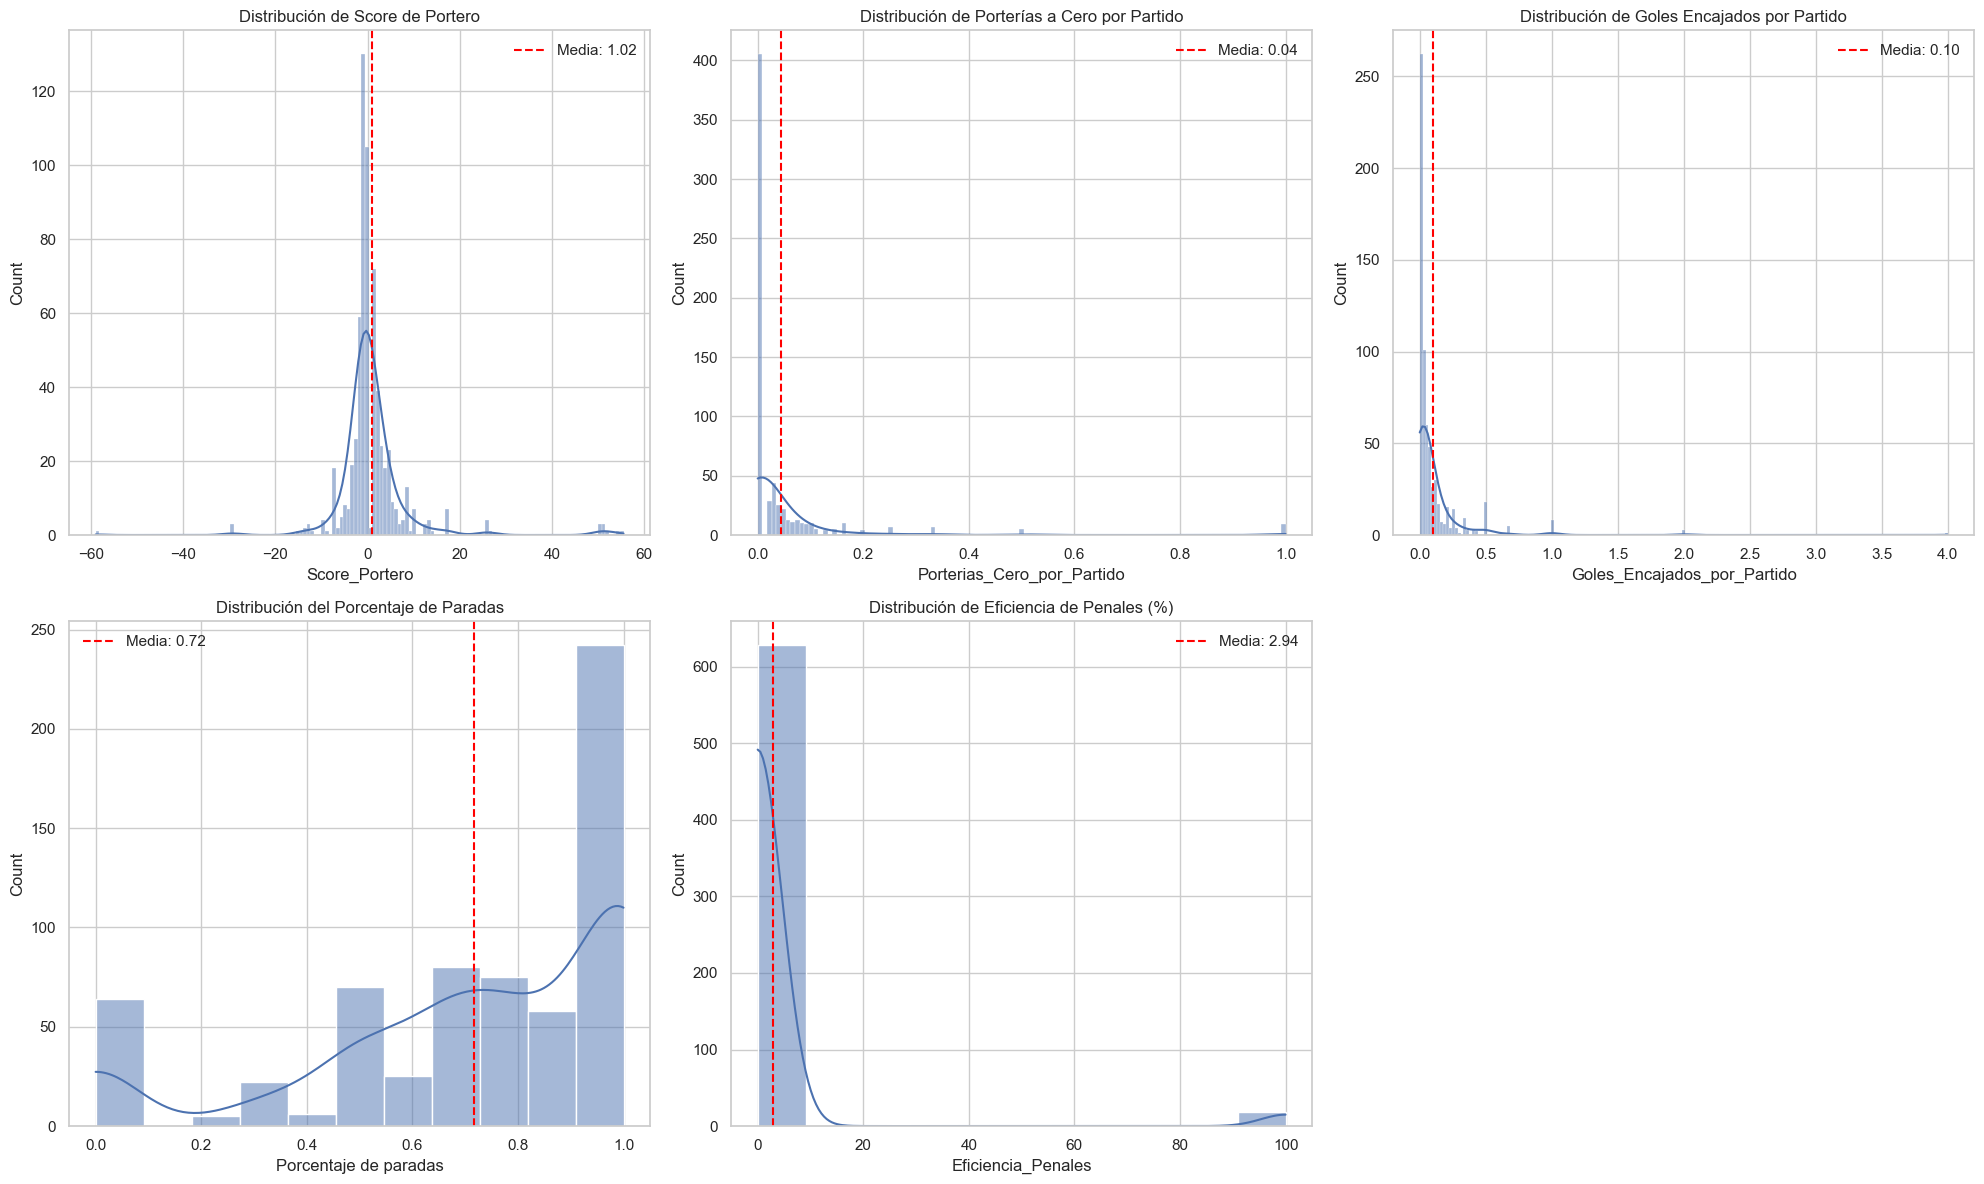

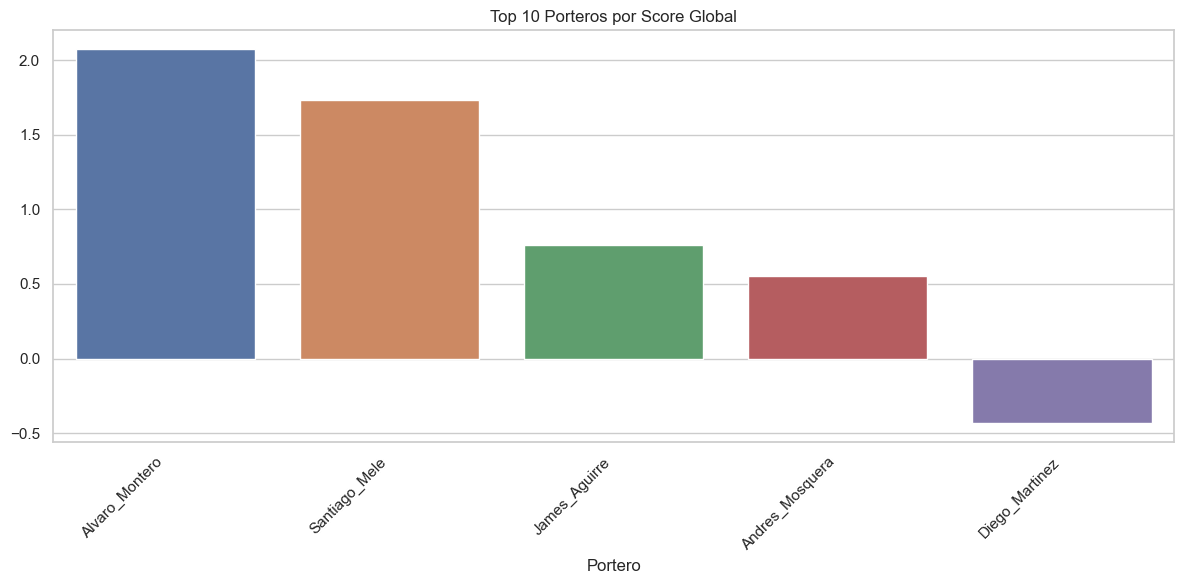

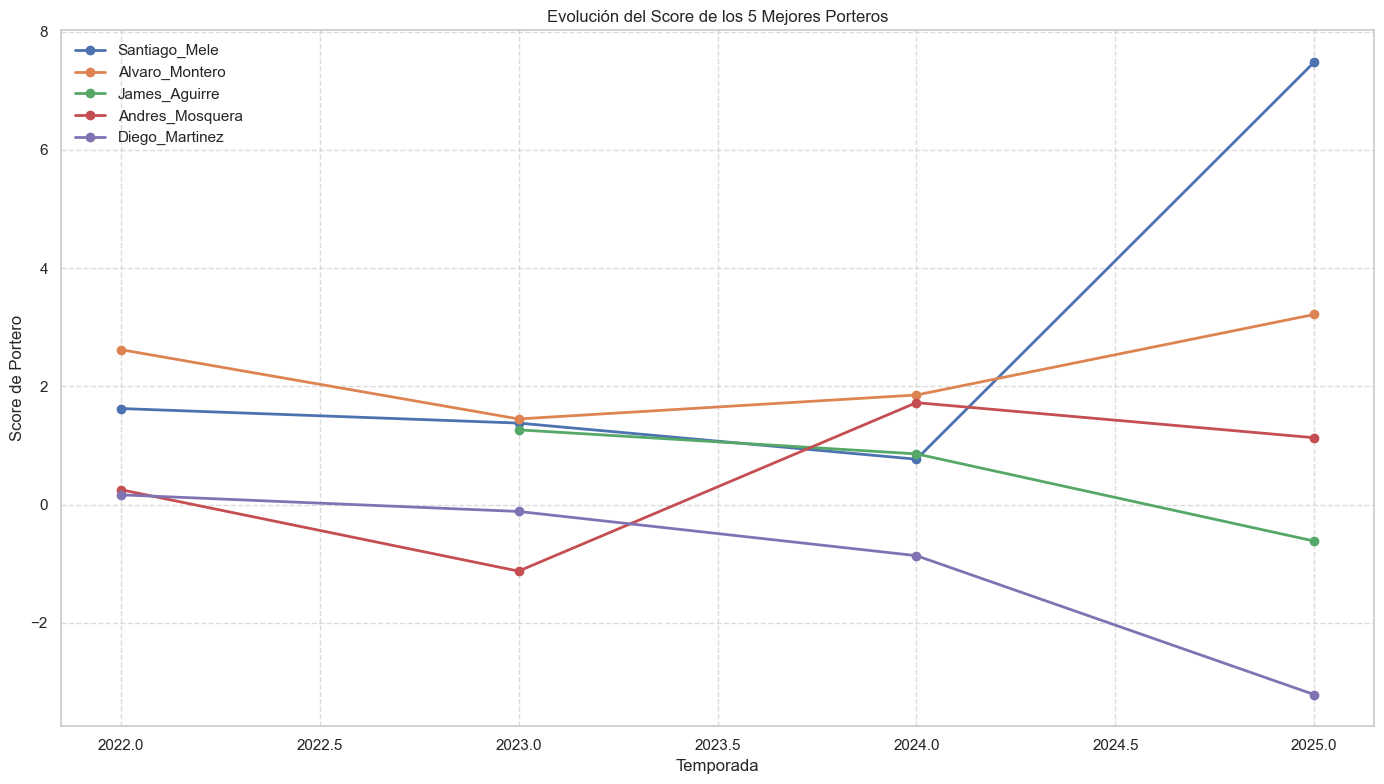

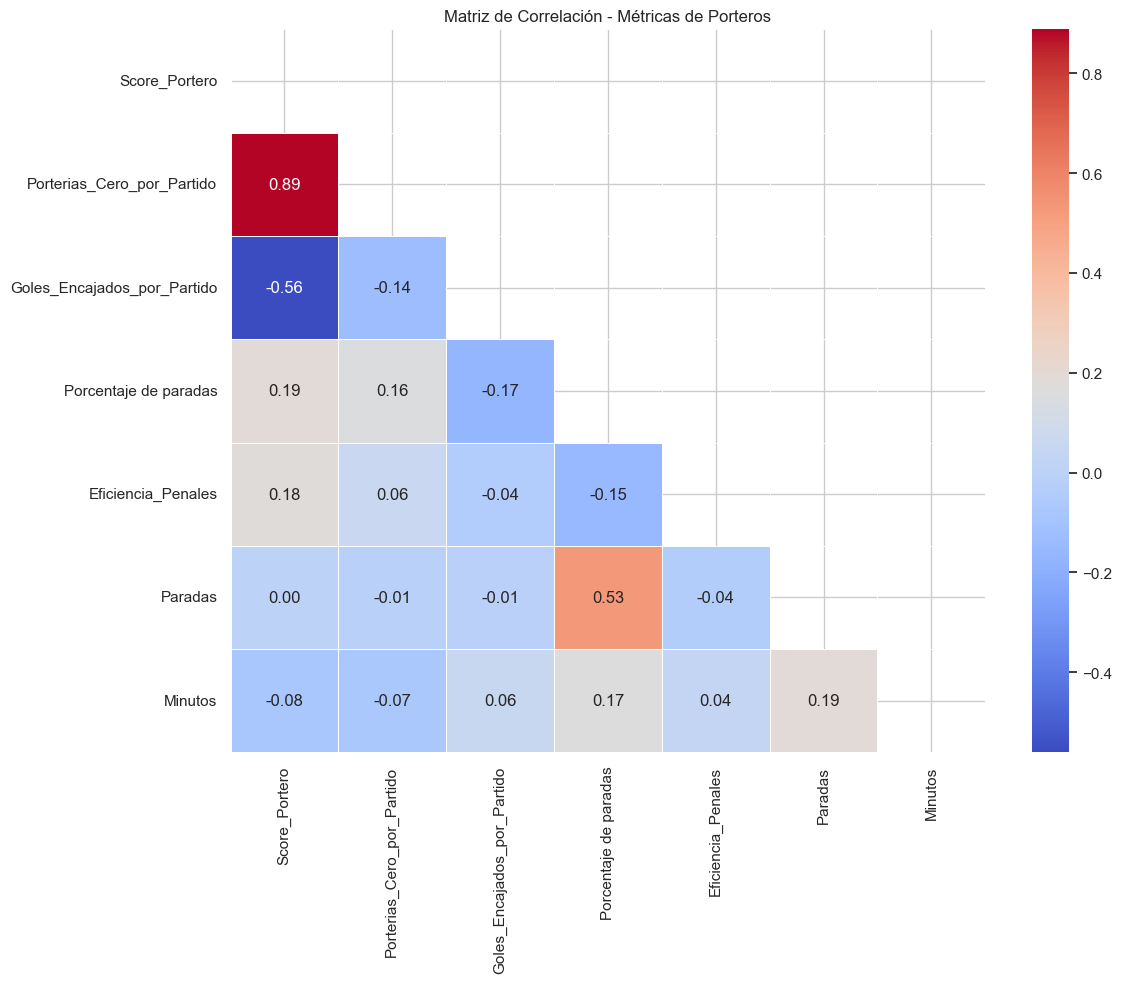

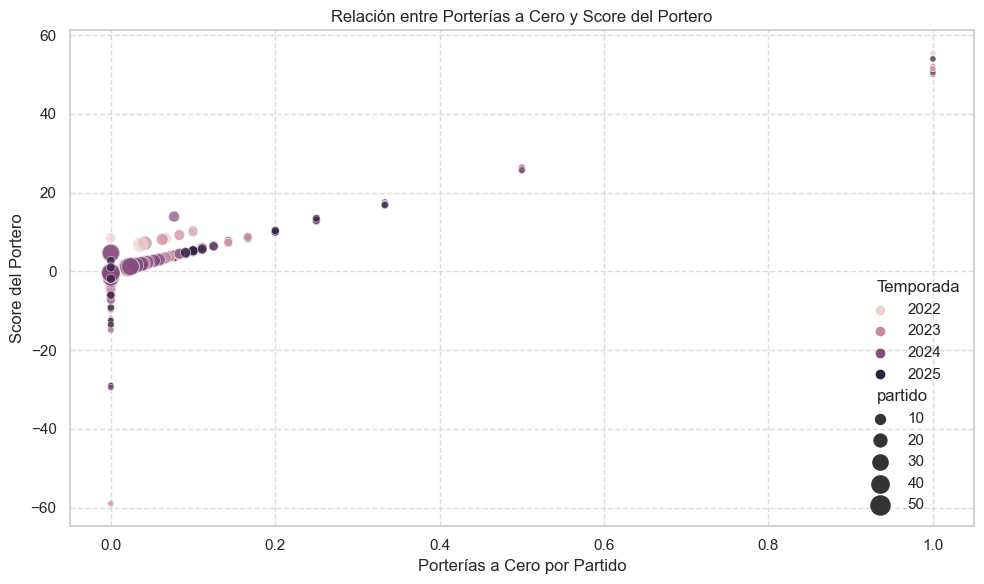

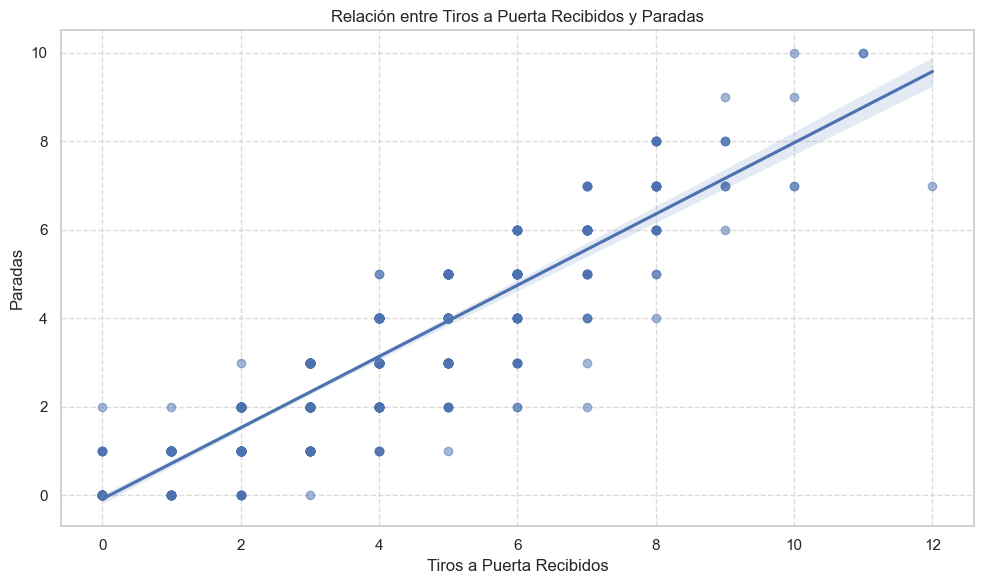


Top 5 Porteros por Score Global:


,Portero,Score_Portero,Porterias_Cero_por_Partido,Goles_Encajados_por_Partido,Porcentaje de paradas,Eficiencia_Penales
0,Alvaro_Montero,2.07,0.06,0.07,0.70,2.48
4,Santiago_Mele,1.73,0.06,0.10,0.70,5.15
3,James_Aguirre,0.76,0.04,0.11,0.73,6.90
1,Andres_Mosquera,0.56,0.03,0.09,0.75,0.70
2,Diego_Martinez,-0.43,0.03,0.15,0.71,0.83



Top 5 Porteros por Porterías a Cero por Partido:


,Portero,Score_Portero,Porterias_Cero_por_Partido,Goles_Encajados_por_Partido,Porcentaje de paradas,Eficiencia_Penales
0,Alvaro_Montero,2.07,0.06,0.07,0.70,2.48
4,Santiago_Mele,1.73,0.06,0.10,0.70,5.15
3,James_Aguirre,0.76,0.04,0.11,0.73,6.90
1,Andres_Mosquera,0.56,0.03,0.09,0.75,0.70
2,Diego_Martinez,-0.43,0.03,0.15,0.71,0.83



Top 5 Porteros por Menor Cantidad de Goles Encajados por Partido:


,Portero,Score_Portero,Porterias_Cero_por_Partido,Goles_Encajados_por_Partido,Porcentaje de paradas,Eficiencia_Penales
0,Alvaro_Montero,2.07,0.06,0.07,0.70,2.48
1,Andres_Mosquera,0.56,0.03,0.09,0.75,0.70
4,Santiago_Mele,1.73,0.06,0.10,0.70,5.15
3,James_Aguirre,0.76,0.04,0.11,0.73,6.90
2,Diego_Martinez,-0.43,0.03,0.15,0.71,0.83



Top 5 Porteros por Porcentaje de Paradas:


,Portero,Score_Portero,Porterias_Cero_por_Partido,Goles_Encajados_por_Partido,Porcentaje de paradas,Eficiencia_Penales
1,Andres_Mosquera,0.56,0.03,0.09,0.75,0.70
3,James_Aguirre,0.76,0.04,0.11,0.73,6.90
2,Diego_Martinez,-0.43,0.03,0.15,0.71,0.83
0,Alvaro_Montero,2.07,0.06,0.07,0.70,2.48
4,Santiago_Mele,1.73,0.06,0.10,0.70,5.15


In [8]:
# Cargar los datos procesados de porteros
df_porteros = pd.read_csv("Porteros_Procesados.csv")

# Crear carpetas para guardar las imágenes
import os
carpeta_imagenes = "data/imagenes"
carpeta_porteros = f"{carpeta_imagenes}/analisis_porteros"
carpeta_defensas = f"{carpeta_imagenes}/analisis_defensas"
carpeta_goleadores = f"{carpeta_imagenes}/analisis_goleadores"
carpeta_comparativo = f"{carpeta_imagenes}/analisis_comparativo"

# Crear las carpetas si no existen
for carpeta in [carpeta_imagenes, carpeta_porteros, carpeta_defensas, carpeta_goleadores, carpeta_comparativo]:
    os.makedirs(carpeta, exist_ok=True)

print(f"Análisis de Porteros - {df_porteros.shape[0]} registros")

# 1. Distribución de métricas clave
plt.figure(figsize=(20, 12))

# Distribución de Score de Portero
plt.subplot(2, 3, 1)
sns.histplot(df_porteros['Score_Portero'], kde=True)
plt.title('Distribución de Score de Portero')
plt.axvline(df_porteros['Score_Portero'].mean(), color='red', linestyle='--', label=f'Media: {df_porteros["Score_Portero"].mean():.2f}')
plt.legend()

# Distribución de Porterías a cero por partido
plt.subplot(2, 3, 2)
sns.histplot(df_porteros['Porterias_Cero_por_Partido'], kde=True)
plt.title('Distribución de Porterías a Cero por Partido')
plt.axvline(df_porteros['Porterias_Cero_por_Partido'].mean(), color='red', linestyle='--', label=f'Media: {df_porteros["Porterias_Cero_por_Partido"].mean():.2f}')
plt.legend()

# Distribución de Goles encajados por partido
plt.subplot(2, 3, 3)
sns.histplot(df_porteros['Goles_Encajados_por_Partido'], kde=True)
plt.title('Distribución de Goles Encajados por Partido')
plt.axvline(df_porteros['Goles_Encajados_por_Partido'].mean(), color='red', linestyle='--', label=f'Media: {df_porteros["Goles_Encajados_por_Partido"].mean():.2f}')
plt.legend()

# Distribución del Porcentaje de paradas
plt.subplot(2, 3, 4)
sns.histplot(df_porteros['Porcentaje de paradas'], kde=True)
plt.title('Distribución del Porcentaje de Paradas')
plt.axvline(df_porteros['Porcentaje de paradas'].mean(), color='red', linestyle='--', label=f'Media: {df_porteros["Porcentaje de paradas"].mean():.2f}')
plt.legend()

# Distribución de Eficiencia de Penales
plt.subplot(2, 3, 5)
sns.histplot(df_porteros['Eficiencia_Penales'], kde=True)
plt.title('Distribución de Eficiencia de Penales (%)')
plt.axvline(df_porteros['Eficiencia_Penales'].mean(), color='red', linestyle='--', label=f'Media: {df_porteros["Eficiencia_Penales"].mean():.2f}')
plt.legend()

plt.tight_layout()
plt.savefig(f'{carpeta_porteros}/distribucion_metricas_porteros.png')
plt.show()

# 2. Top 10 porteros por Score_Portero
top_porteros = df_porteros.groupby('Portero')['Score_Portero'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_porteros.index, y=top_porteros.values)
plt.title('Top 10 Porteros por Score Global')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f'{carpeta_porteros}/top10_porteros.png')
plt.show()

# 3. Análisis por temporada
porteros_por_temporada = df_porteros.groupby(['Portero', 'Temporada']).agg({
    'Score_Portero': 'mean',
    'Porterias_Cero_por_Partido': 'mean',
    'Goles_Encajados_por_Partido': 'mean',
    'Porcentaje de paradas': 'mean',
    'partido': 'count'
}).reset_index()

# Filtrar porteros con al menos 10 partidos y mostrar su evolución
porteros_destacados = porteros_por_temporada[porteros_por_temporada['partido'] >= 10]

# 4. Evolución de los mejores 5 porteros a lo largo de las temporadas
mejores_porteros = porteros_por_temporada.groupby('Portero')['Score_Portero'].mean().sort_values(ascending=False).head(5).index.tolist()

plt.figure(figsize=(14, 8))
for portero in mejores_porteros:
    datos = porteros_por_temporada[porteros_por_temporada['Portero'] == portero]
    plt.plot(datos['Temporada'], datos['Score_Portero'], marker='o', linewidth=2, label=portero)

plt.title('Evolución del Score de los 5 Mejores Porteros')
plt.xlabel('Temporada')
plt.ylabel('Score de Portero')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig(f'{carpeta_porteros}/evolucion_mejores_porteros.png')
plt.show()

# 5. Análisis de correlación
plt.figure(figsize=(12, 10))
cols_corr = ['Score_Portero', 'Porterias_Cero_por_Partido', 'Goles_Encajados_por_Partido', 
             'Porcentaje de paradas', 'Eficiencia_Penales', 'Paradas', 'Minutos']
corr = df_porteros[cols_corr].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación - Métricas de Porteros')
plt.tight_layout()
plt.savefig(f'{carpeta_porteros}/correlacion_porteros.png')
plt.show()

# 6. Relación entre porterías a cero y score del portero
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_porteros, x='Porterias_Cero_por_Partido', y='Score_Portero', 
                hue='Temporada', size='partido', sizes=(20, 200), alpha=0.7)
plt.title('Relación entre Porterías a Cero y Score del Portero')
plt.xlabel('Porterías a Cero por Partido')
plt.ylabel('Score del Portero')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(f'{carpeta_porteros}/relacion_porterias_cero_score.png')
plt.show()

# 7. Relación entre tiros recibidos y atajadas
plt.figure(figsize=(10, 6))
sns.regplot(data=df_porteros, x='Tiros a puerta recibidos', y='Paradas', scatter_kws={'alpha':0.5})
plt.title('Relación entre Tiros a Puerta Recibidos y Paradas')
plt.xlabel('Tiros a Puerta Recibidos')
plt.ylabel('Paradas')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(f'{carpeta_porteros}/relacion_tiros_paradas.png')
plt.show()

# 8. Top 5 porteros por métricas principales
top_metrics = ['Portero', 'Score_Portero', 'Porterias_Cero_por_Partido', 
               'Goles_Encajados_por_Partido', 'Porcentaje de paradas', 'Eficiencia_Penales']

top_porteros_df = df_porteros.groupby('Portero').agg({
    'Score_Portero': 'mean',
    'Porterias_Cero_por_Partido': 'mean',
    'Goles_Encajados_por_Partido': 'mean',
    'Porcentaje de paradas': 'mean',
    'Eficiencia_Penales': 'mean',
    'partido': 'count'
}).reset_index()

# Filtrar porteros con al menos 10 partidos
top_porteros_df = top_porteros_df[top_porteros_df['partido'] >= 10]

print("\nTop 5 Porteros por Score Global:")
display(top_porteros_df.sort_values('Score_Portero', ascending=False)[top_metrics].head(5))

print("\nTop 5 Porteros por Porterías a Cero por Partido:")
display(top_porteros_df.sort_values('Porterias_Cero_por_Partido', ascending=False)[top_metrics].head(5))

print("\nTop 5 Porteros por Menor Cantidad de Goles Encajados por Partido:")
display(top_porteros_df.sort_values('Goles_Encajados_por_Partido')[top_metrics].head(5))

print("\nTop 5 Porteros por Porcentaje de Paradas:")
display(top_porteros_df.sort_values('Porcentaje de paradas', ascending=False)[top_metrics].head(5))

6. Análisis Exploratorio (Defensas)

Análisis de Defensas - 550 registros


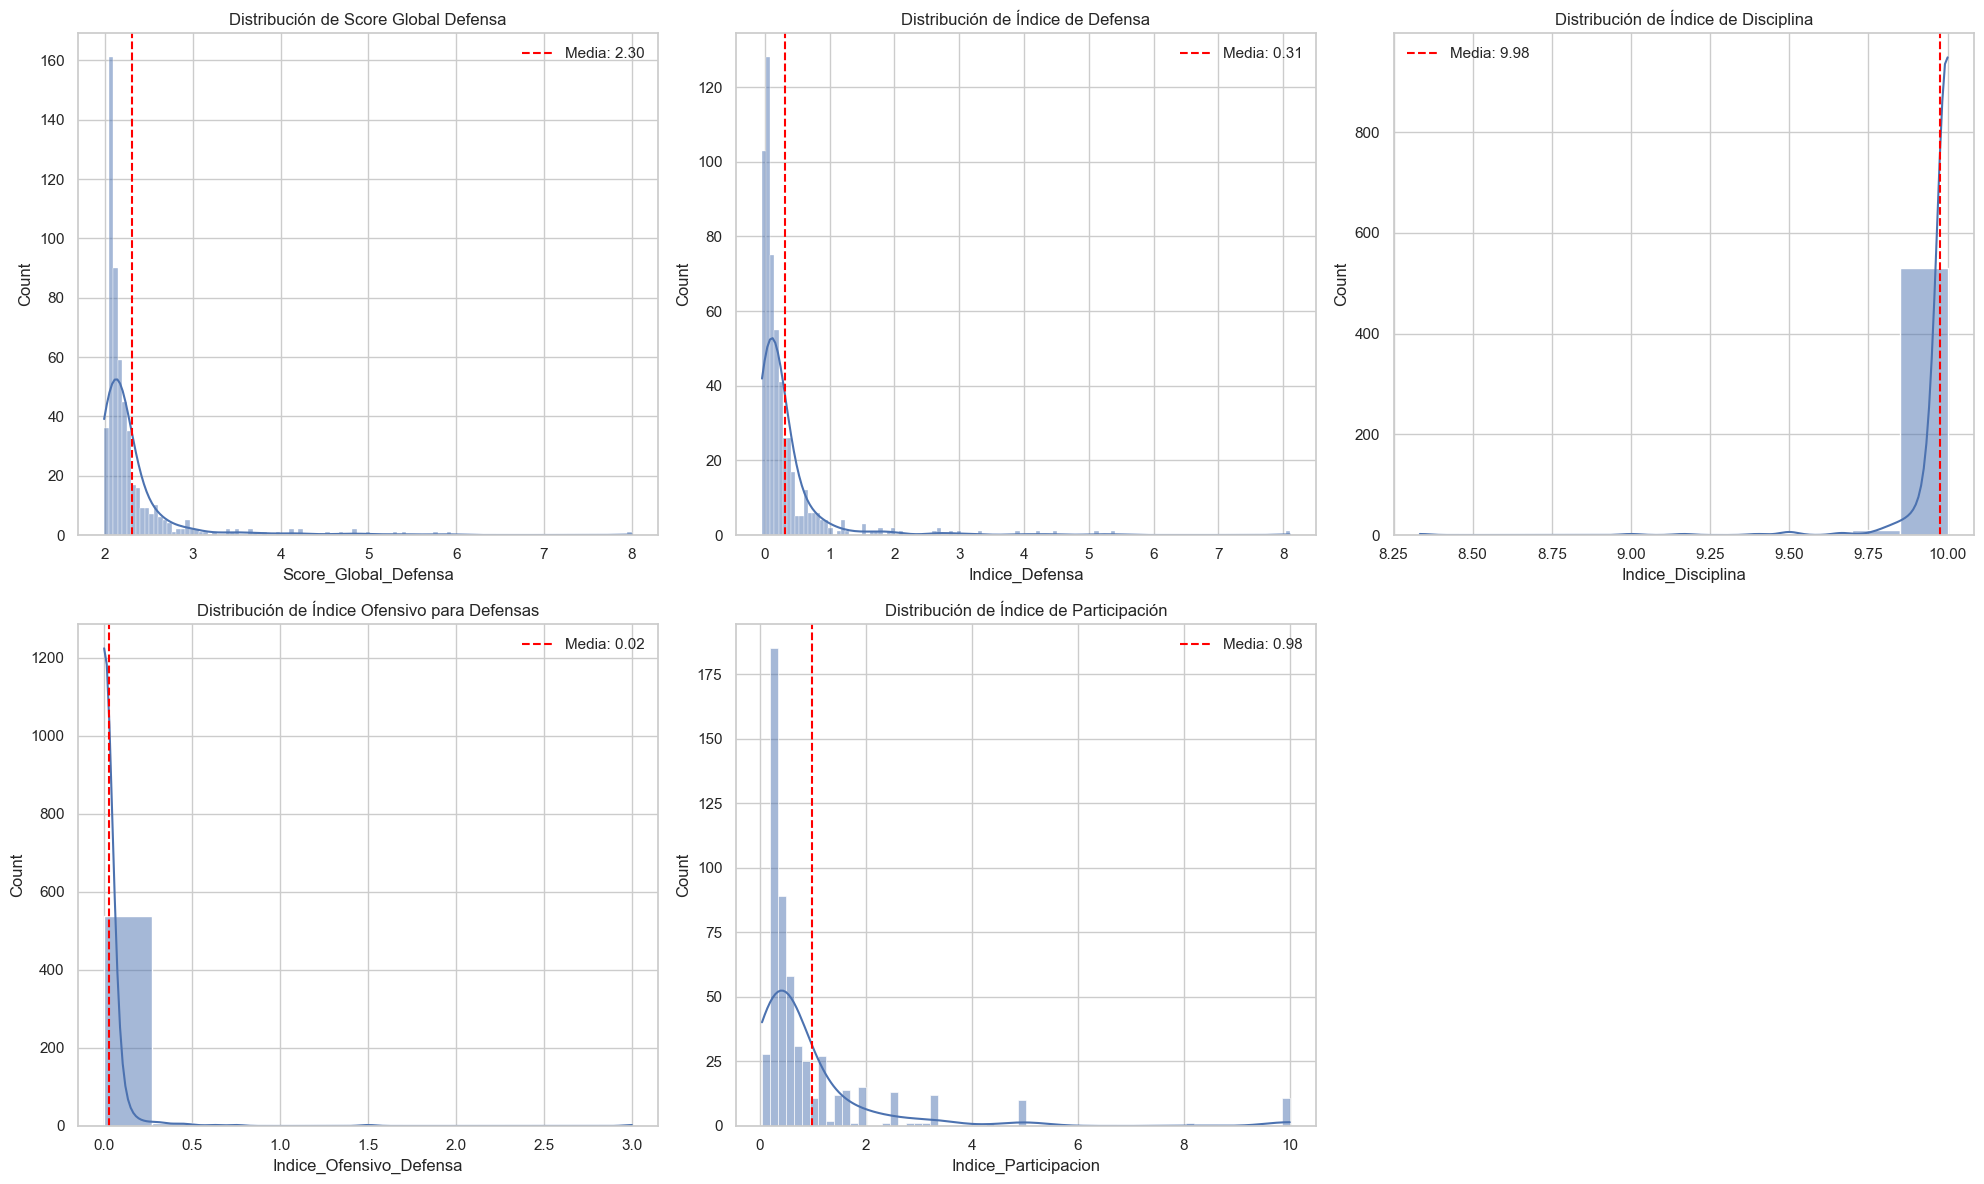

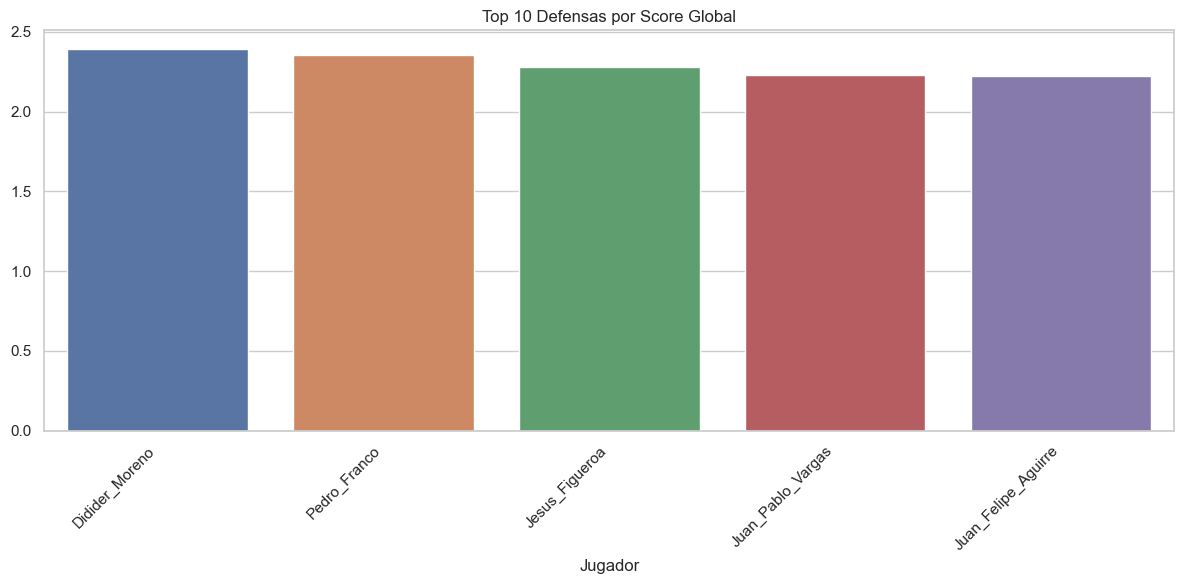

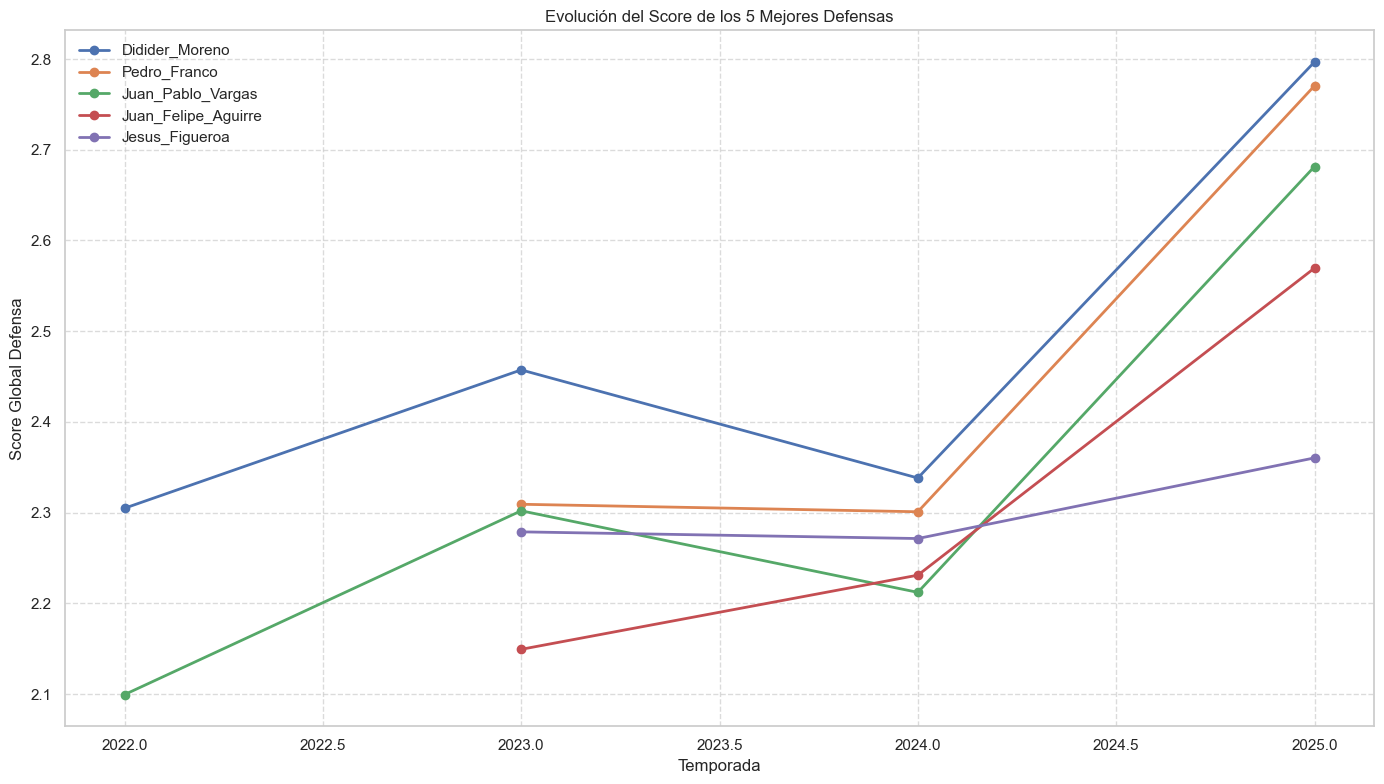

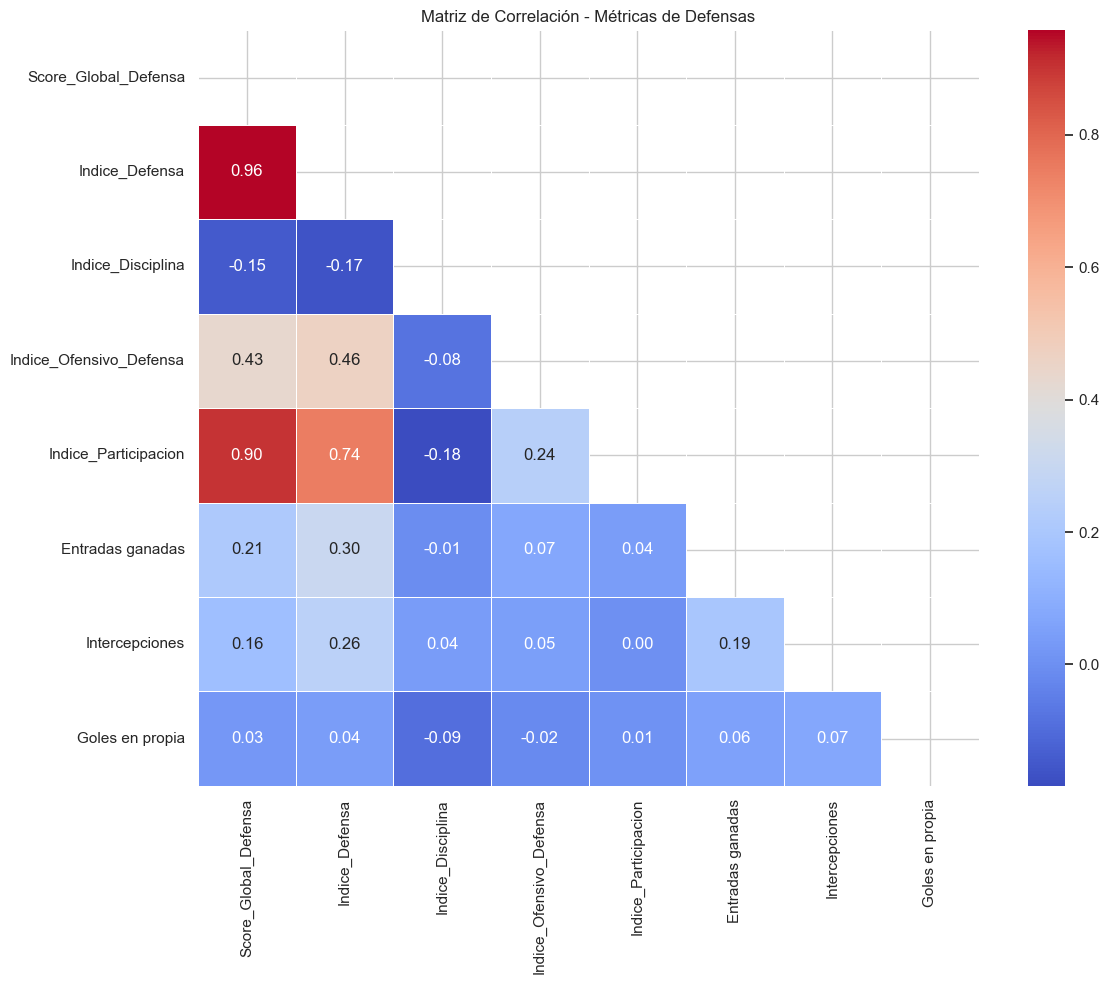

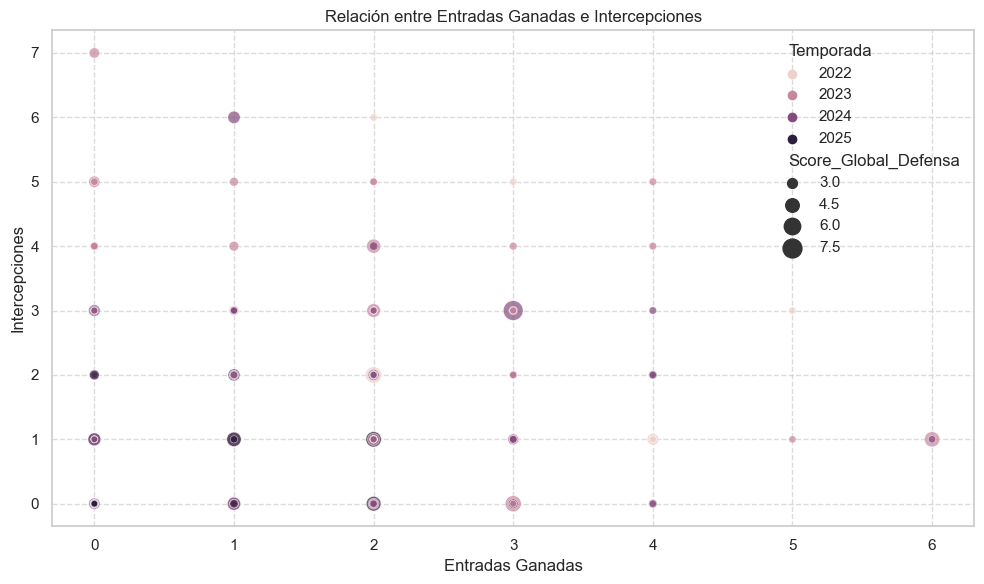

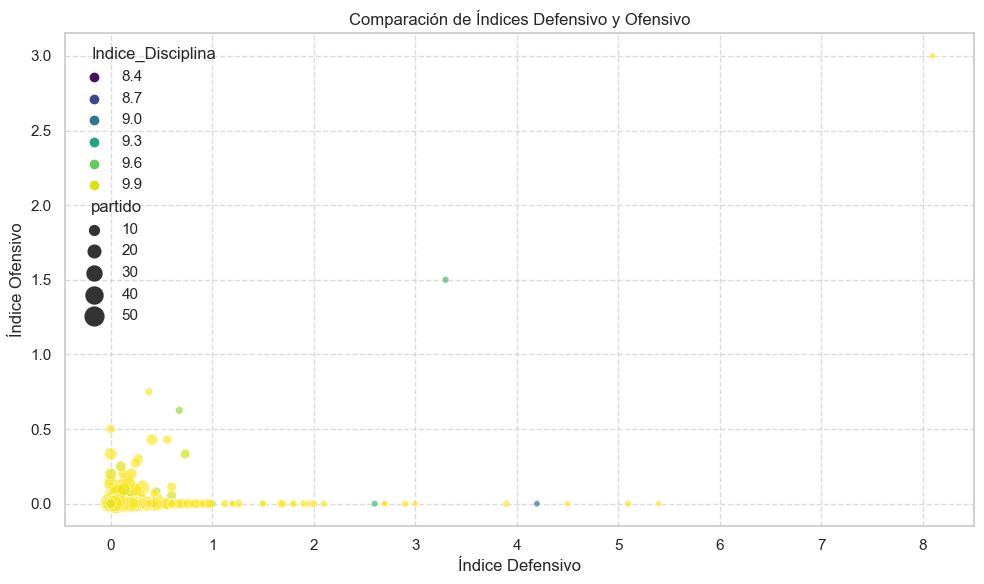


Top 5 Defensas por Score Global:


,Jugador,Score_Global_Defensa,Indice_Defensa,Indice_Disciplina,Indice_Ofensivo_Defensa,Indice_Participacion
0,Didider_Moreno,2.39,0.49,9.97,0.04,0.97
4,Pedro_Franco,2.36,0.34,9.97,0.03,1.28
1,Jesus_Figueroa,2.28,0.26,9.99,0.01,1.02
3,Juan_Pablo_Vargas,2.23,0.22,9.98,0.02,0.81
2,Juan_Felipe_Aguirre,2.23,0.17,9.98,0.02,0.94



Top 5 Defensas por Índice Defensivo:


,Jugador,Score_Global_Defensa,Indice_Defensa,Indice_Disciplina,Indice_Ofensivo_Defensa,Indice_Participacion
0,Didider_Moreno,2.39,0.49,9.97,0.04,0.97
4,Pedro_Franco,2.36,0.34,9.97,0.03,1.28
1,Jesus_Figueroa,2.28,0.26,9.99,0.01,1.02
3,Juan_Pablo_Vargas,2.23,0.22,9.98,0.02,0.81
2,Juan_Felipe_Aguirre,2.23,0.17,9.98,0.02,0.94



Top 5 Defensas por Índice Ofensivo:


,Jugador,Score_Global_Defensa,Indice_Defensa,Indice_Disciplina,Indice_Ofensivo_Defensa,Indice_Participacion
0,Didider_Moreno,2.39,0.49,9.97,0.04,0.97
4,Pedro_Franco,2.36,0.34,9.97,0.03,1.28
2,Juan_Felipe_Aguirre,2.23,0.17,9.98,0.02,0.94
3,Juan_Pablo_Vargas,2.23,0.22,9.98,0.02,0.81
1,Jesus_Figueroa,2.28,0.26,9.99,0.01,1.02



Top 5 Defensas por Índice de Disciplina:


,Jugador,Score_Global_Defensa,Indice_Defensa,Indice_Disciplina,Indice_Ofensivo_Defensa,Indice_Participacion
1,Jesus_Figueroa,2.28,0.26,9.99,0.01,1.02
3,Juan_Pablo_Vargas,2.23,0.22,9.98,0.02,0.81
2,Juan_Felipe_Aguirre,2.23,0.17,9.98,0.02,0.94
0,Didider_Moreno,2.39,0.49,9.97,0.04,0.97
4,Pedro_Franco,2.36,0.34,9.97,0.03,1.28


In [14]:
# Cargar los datos procesados de defensas
df_defensas = pd.read_csv("Defensas_Procesados.csv")

print(f"Análisis de Defensas - {df_defensas.shape[0]} registros")

# 1. Distribución de métricas clave
plt.figure(figsize=(20, 12))

# Distribución de Score Global Defensa
plt.subplot(2, 3, 1)
sns.histplot(df_defensas['Score_Global_Defensa'], kde=True)
plt.title('Distribución de Score Global Defensa')
plt.axvline(df_defensas['Score_Global_Defensa'].mean(), color='red', linestyle='--', label=f'Media: {df_defensas["Score_Global_Defensa"].mean():.2f}')
plt.legend()

# Distribución de Índice de Defensa
plt.subplot(2, 3, 2)
sns.histplot(df_defensas['Indice_Defensa'], kde=True)
plt.title('Distribución de Índice de Defensa')
plt.axvline(df_defensas['Indice_Defensa'].mean(), color='red', linestyle='--', label=f'Media: {df_defensas["Indice_Defensa"].mean():.2f}')
plt.legend()

# Distribución de Índice de Disciplina
plt.subplot(2, 3, 3)
sns.histplot(df_defensas['Indice_Disciplina'], kde=True)
plt.title('Distribución de Índice de Disciplina')
plt.axvline(df_defensas['Indice_Disciplina'].mean(), color='red', linestyle='--', label=f'Media: {df_defensas["Indice_Disciplina"].mean():.2f}')
plt.legend()

# Distribución de Índice Ofensivo para Defensas
plt.subplot(2, 3, 4)
sns.histplot(df_defensas['Indice_Ofensivo_Defensa'], kde=True)
plt.title('Distribución de Índice Ofensivo para Defensas')
plt.axvline(df_defensas['Indice_Ofensivo_Defensa'].mean(), color='red', linestyle='--', label=f'Media: {df_defensas["Indice_Ofensivo_Defensa"].mean():.2f}')
plt.legend()

# Distribución de Índice de Participación
plt.subplot(2, 3, 5)
sns.histplot(df_defensas['Indice_Participacion'], kde=True)
plt.title('Distribución de Índice de Participación')
plt.axvline(df_defensas['Indice_Participacion'].mean(), color='red', linestyle='--', label=f'Media: {df_defensas["Indice_Participacion"].mean():.2f}')
plt.legend()

plt.tight_layout()
plt.savefig(f'{carpeta_defensas}/distribucion_metricas_defensas.png')
plt.show()

# 2. Top 10 defensas por Score_Global_Defensa
top_defensas = df_defensas.groupby('Jugador')['Score_Global_Defensa'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_defensas.index, y=top_defensas.values)
plt.title('Top 10 Defensas por Score Global')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(f'{carpeta_defensas}/top10_defensas.png')
plt.show()

# 3. Análisis por temporada
defensas_por_temporada = df_defensas.groupby(['Jugador', 'Temporada']).agg({
    'Score_Global_Defensa': 'mean',
    'Indice_Defensa': 'mean',
    'Indice_Disciplina': 'mean',
    'Indice_Ofensivo_Defensa': 'mean',
    'partido': 'count'
}).reset_index()

# Filtrar defensas con al menos 10 partidos
defensas_destacados = defensas_por_temporada[defensas_por_temporada['partido'] >= 10]

# 4. Evolución de los mejores 5 defensas a lo largo de las temporadas
mejores_defensas = defensas_por_temporada.groupby('Jugador')['Score_Global_Defensa'].mean().sort_values(ascending=False).head(5).index.tolist()

plt.figure(figsize=(14, 8))
for defensa in mejores_defensas:
    datos = defensas_por_temporada[defensas_por_temporada['Jugador'] == defensa]
    plt.plot(datos['Temporada'], datos['Score_Global_Defensa'], marker='o', linewidth=2, label=defensa)

plt.title('Evolución del Score de los 5 Mejores Defensas')
plt.xlabel('Temporada')
plt.ylabel('Score Global Defensa')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.savefig(f'{carpeta_defensas}/evolucion_mejores_defensas.png')
plt.show()

# 5. Análisis de correlación
plt.figure(figsize=(12, 10))
cols_corr = ['Score_Global_Defensa', 'Indice_Defensa', 'Indice_Disciplina', 'Indice_Ofensivo_Defensa',
             'Indice_Participacion', 'Entradas ganadas', 'Intercepciones', 'Goles en propia']
corr = df_defensas[cols_corr].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask=mask, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación - Métricas de Defensas')
plt.tight_layout()
plt.savefig(f'{carpeta_defensas}/correlacion_defensas.png')
plt.show()

# 6. Relación entre entradas ganadas e intercepciones
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_defensas, x='Entradas ganadas', y='Intercepciones', 
                hue='Temporada', size='Score_Global_Defensa', sizes=(20, 200), alpha=0.7)
plt.title('Relación entre Entradas Ganadas e Intercepciones')
plt.xlabel('Entradas Ganadas')
plt.ylabel('Intercepciones')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(f'{carpeta_defensas}/relacion_entradas_intercepciones.png')
plt.show()

# 7. Comparación de métricas defensivas y ofensivas
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_defensas, x='Indice_Defensa', y='Indice_Ofensivo_Defensa', 
                hue='Indice_Disciplina', size='partido', sizes=(20, 200), palette='viridis', alpha=0.7)
plt.title('Comparación de Índices Defensivo y Ofensivo')
plt.xlabel('Índice Defensivo')
plt.ylabel('Índice Ofensivo')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig(f'{carpeta_defensas}/comparacion_indices_defensa.png')
plt.show()

# 8. Top 5 defensas por métricas principales
top_metrics = ['Jugador', 'Score_Global_Defensa', 'Indice_Defensa', 
               'Indice_Disciplina', 'Indice_Ofensivo_Defensa', 'Indice_Participacion']

top_defensas_df = df_defensas.groupby('Jugador').agg({
    'Score_Global_Defensa': 'mean',
    'Indice_Defensa': 'mean',
    'Indice_Disciplina': 'mean',
    'Indice_Ofensivo_Defensa': 'mean',
    'Indice_Participacion': 'mean',
    'partido': 'count'
}).reset_index()

# Filtrar defensas con al menos 10 partidos
top_defensas_df = top_defensas_df[top_defensas_df['partido'] >= 10]

print("\nTop 5 Defensas por Score Global:")
display(top_defensas_df.sort_values('Score_Global_Defensa', ascending=False)[top_metrics].head(5))

print("\nTop 5 Defensas por Índice Defensivo:")
display(top_defensas_df.sort_values('Indice_Defensa', ascending=False)[top_metrics].head(5))

print("\nTop 5 Defensas por Índice Ofensivo:")
display(top_defensas_df.sort_values('Indice_Ofensivo_Defensa', ascending=False)[top_metrics].head(5))

print("\nTop 5 Defensas por Índice de Disciplina:")
display(top_defensas_df.sort_values('Indice_Disciplina', ascending=False)[top_metrics].head(5))

7. Análisis Exploratorio (Goleadores)

Cargando datos para análisis...
Total de registros: 662
Registros de equipos colombianos: 0
Registros para Dayro_Moreno: 0
Registros para Leonardo_Castro: 0
Registros para Carlos_Bacca: 0
Registros para Marco_Perez: 0
Registros para Hugo_Rodallega: 0
Total de combinaciones jugador-equipo con goles: 0
No hay datos suficientes para crear el gráfico de goles por equipo.


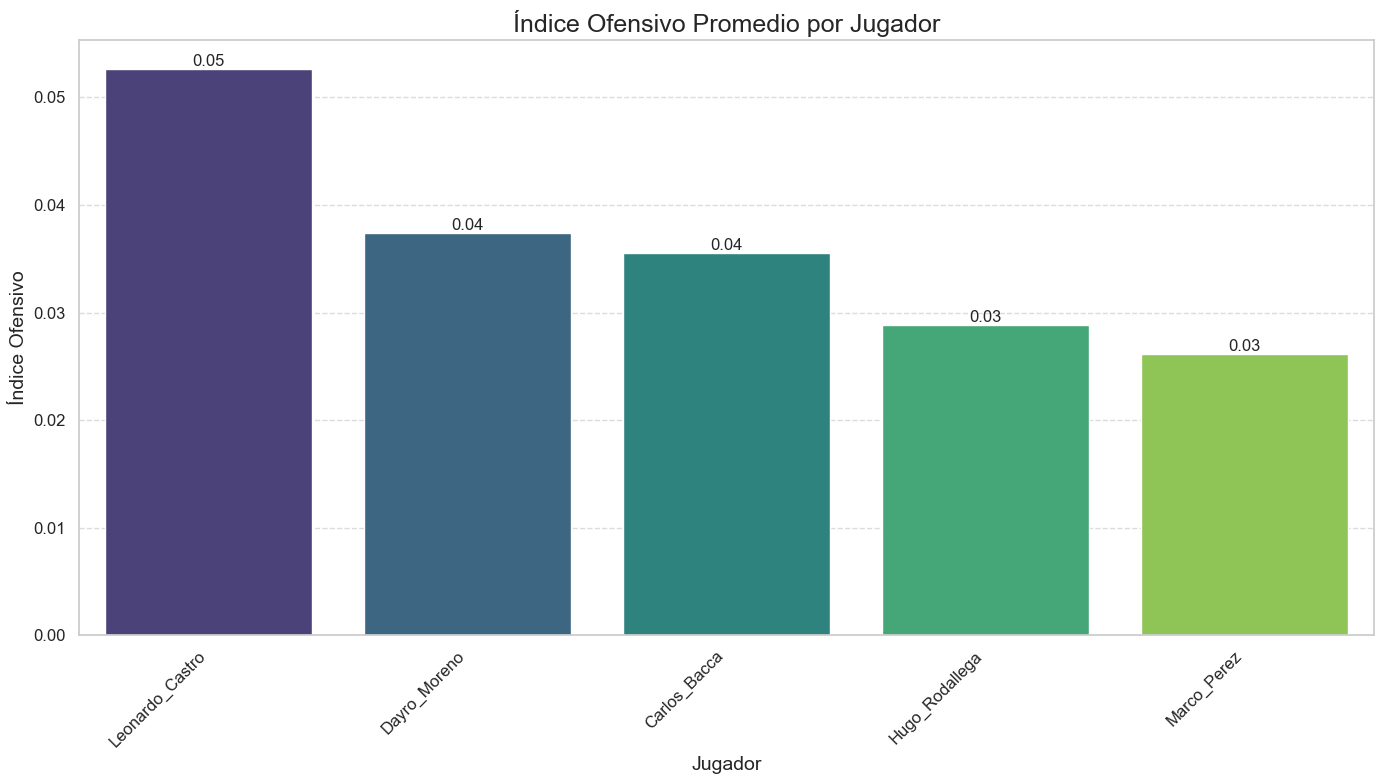

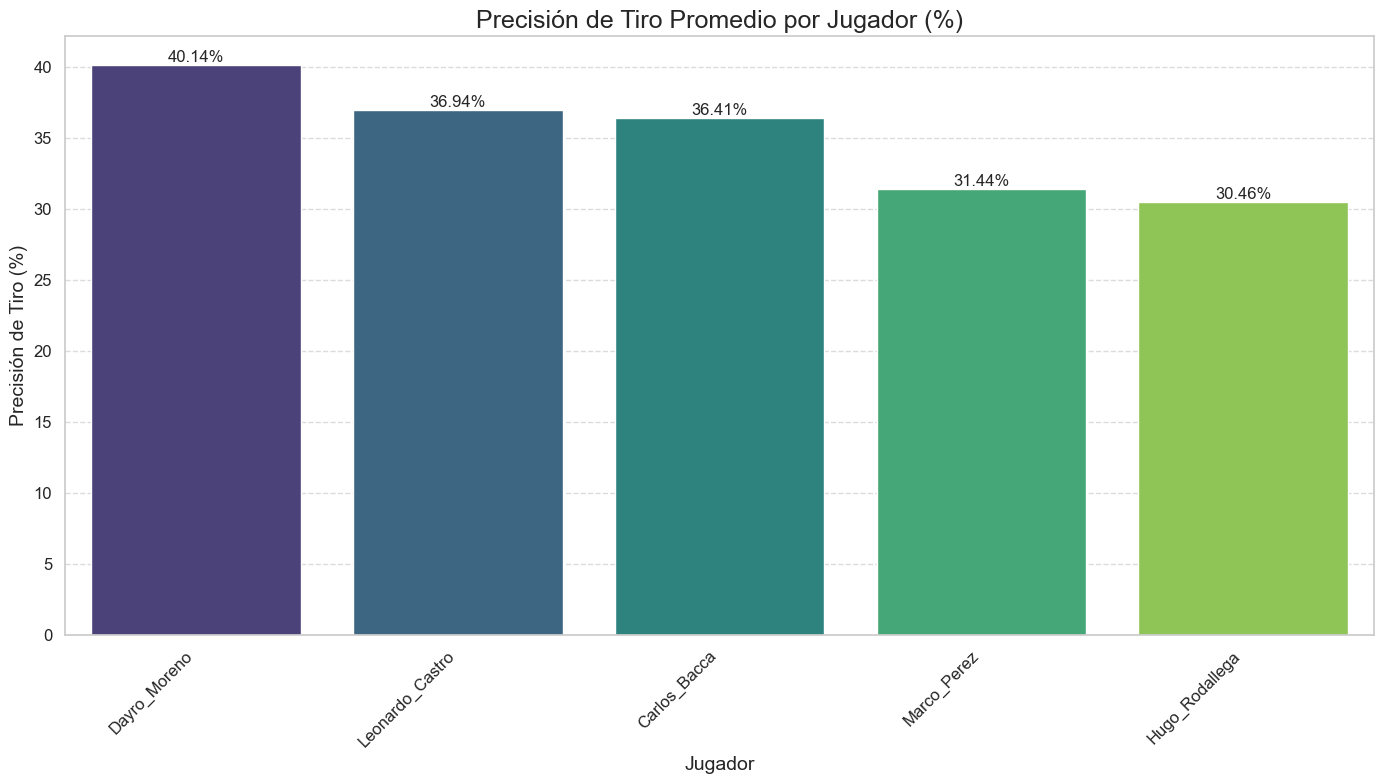

Registros desde 2022: 662


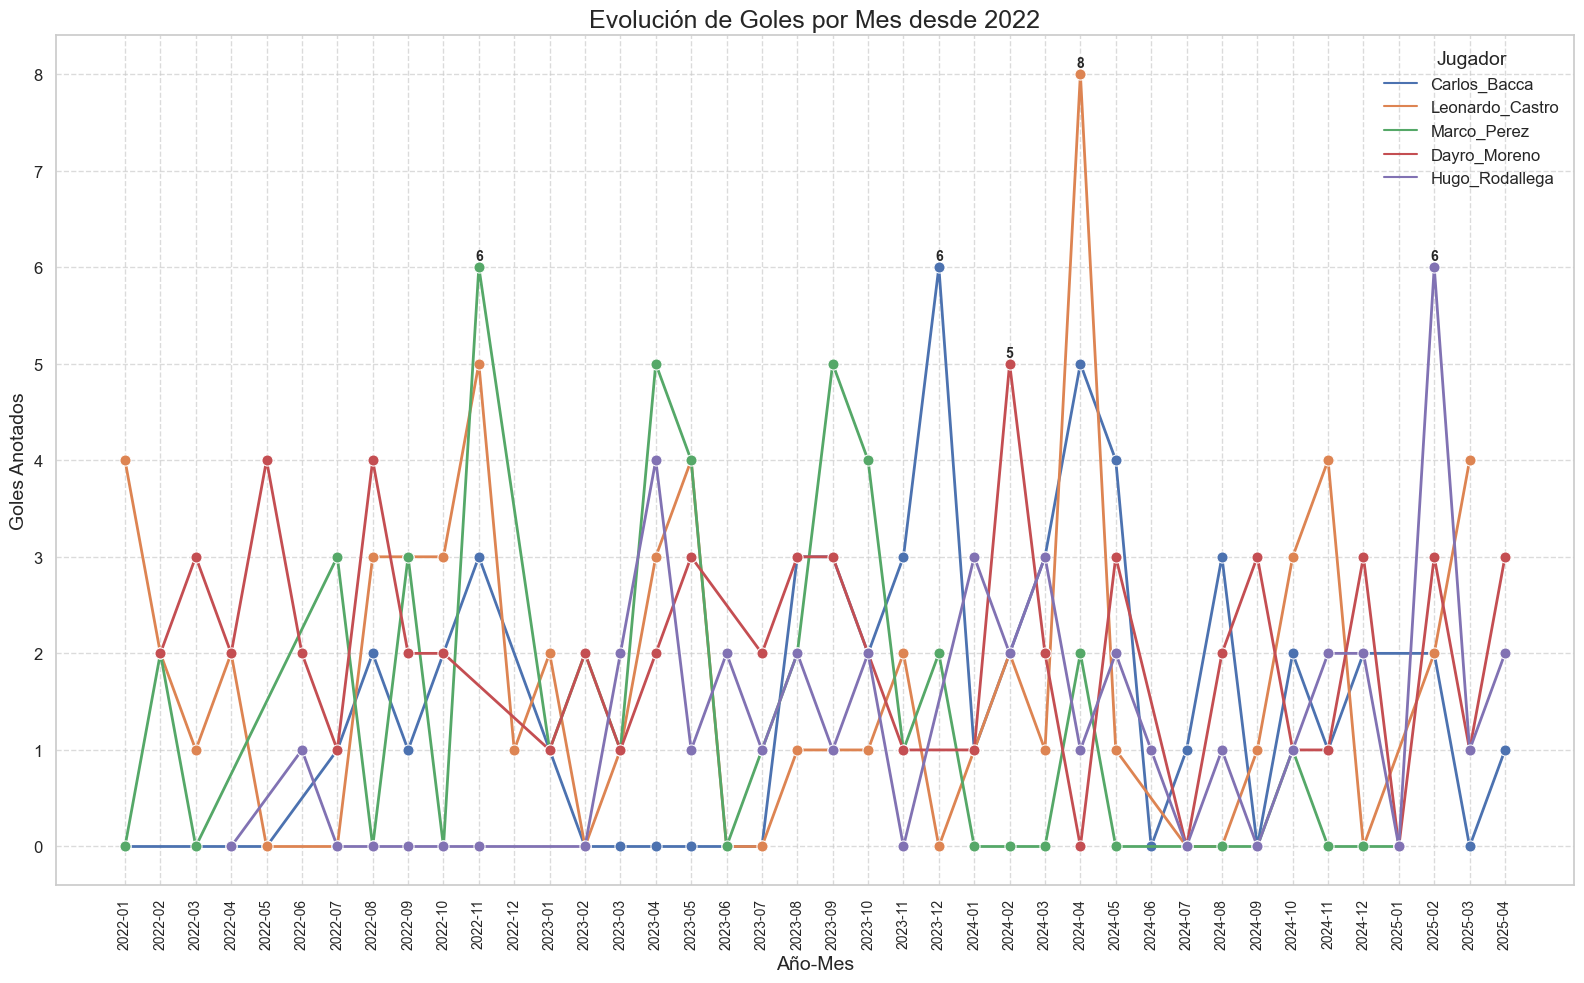

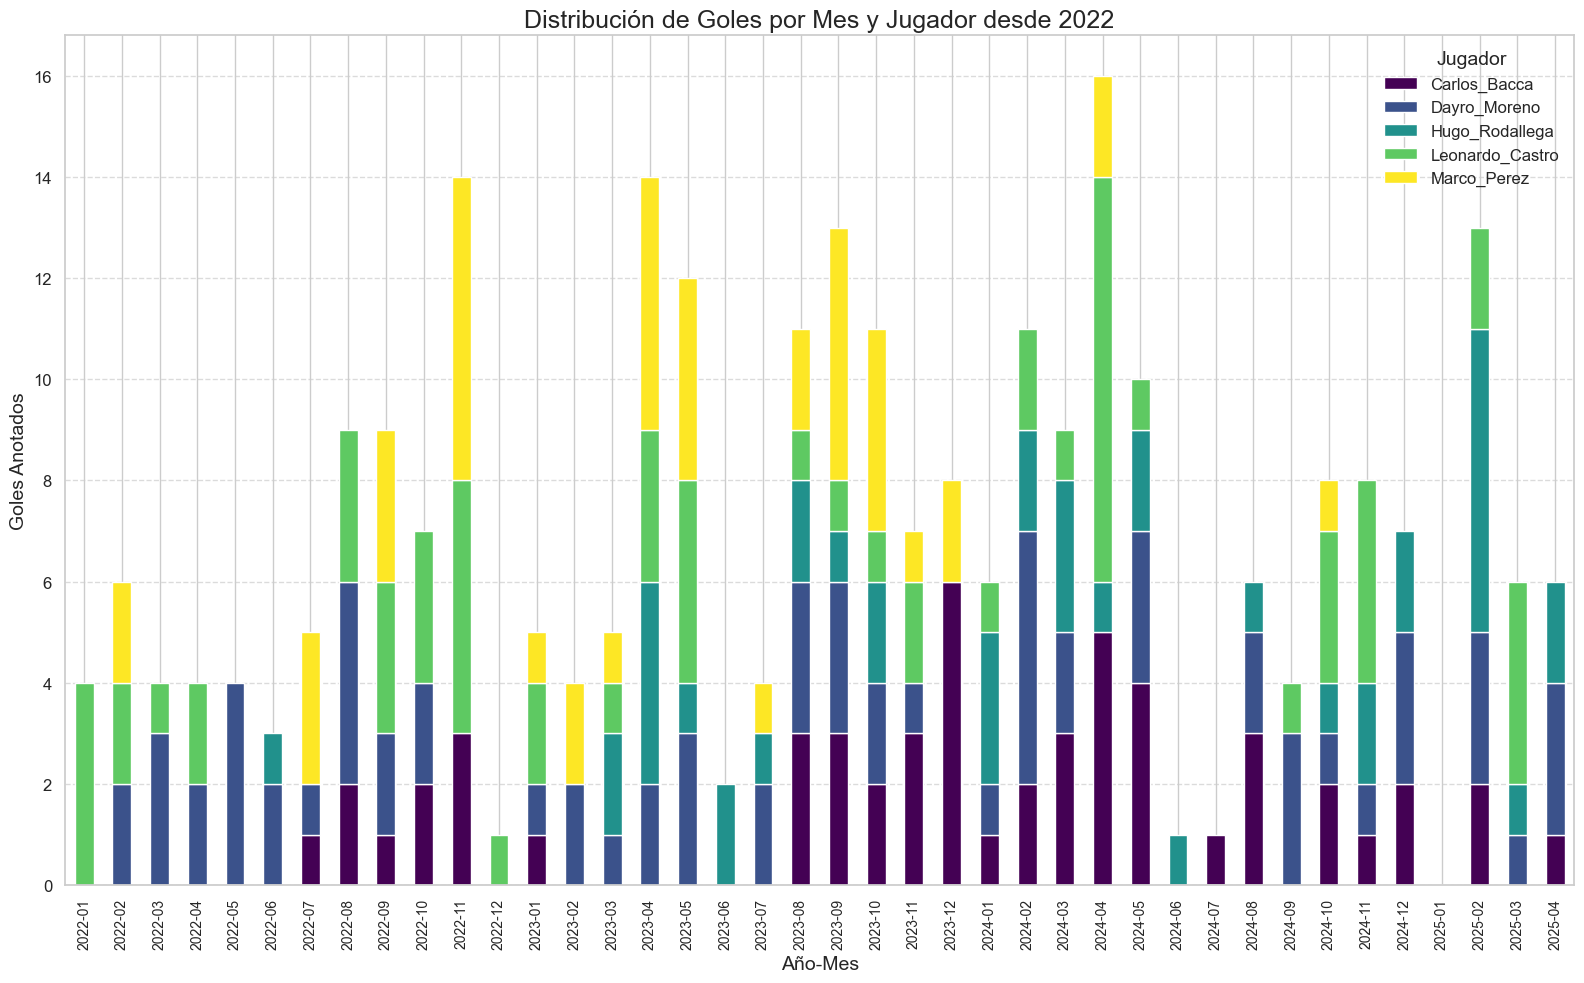

In [16]:
import os
carpeta_imagenes = "data/imagenes"
carpeta_goleadores = f"{carpeta_imagenes}/analisis_goleadores"
os.makedirs(carpeta_goleadores, exist_ok=True)

# Cargar los datos
df_goleadores = pd.read_csv("Goleadores_Procesados.csv")

# Identificar a los 5 jugadores principales
jugadores = ['Dayro_Moreno', 'Leonardo_Castro', 'Carlos_Bacca', 'Marco_Perez', 'Hugo_Rodallega']

print("Cargando datos para análisis...")
print(f"Total de registros: {len(df_goleadores)}")

# 1. Goles por equipo oponente
# En lugar de crear un DataFrame vacío y llenarlo, vamos a crear una lista y luego convertirla
resultados = []

# Filtramos solo equipos colombianos
df_colombianos = df_goleadores[df_goleadores['Es_Colombiano'] == 'True']
print(f"Registros de equipos colombianos: {len(df_colombianos)}")

# Para cada jugador, procesamos los datos
for jugador in jugadores:
    # Filtrar datos para este jugador
    datos_jugador = df_colombianos[df_colombianos['Jugador'] == jugador]
    print(f"Registros para {jugador}: {len(datos_jugador)}")
    
    # Agrupar por equipo y sumar goles
    for oponente in datos_jugador['Oponente_Estandarizado'].unique():
        goles = datos_jugador[datos_jugador['Oponente_Estandarizado'] == oponente]['Goles'].sum()
        if goles > 0:  # Solo incluir si hay goles
            resultados.append({
                'Jugador': jugador,
                'Oponente_Estandarizado': oponente,
                'Goles': goles
            })

# Convertir a DataFrame
df_resultados = pd.DataFrame(resultados)
print(f"Total de combinaciones jugador-equipo con goles: {len(df_resultados)}")

# Si hay datos para graficar
if len(df_resultados) > 0:
    # Ordenar para mejorar visualización
    df_resultados = df_resultados.sort_values(['Oponente_Estandarizado', 'Goles'], ascending=[True, False])
    
    # Gráfico horizontal de goles por equipo
    plt.figure(figsize=(16, 20))
    ax = sns.barplot(
        x='Goles',
        y='Oponente_Estandarizado', 
        hue='Jugador',
        data=df_resultados,
        palette='viridis'
    )
    
    plt.title('Goles anotados contra cada Equipo Colombiano por Jugador', fontsize=18)
    plt.xlabel('Número Total de Goles', fontsize=14)
    plt.ylabel('Equipo Oponente', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Jugador', fontsize=12, title_fontsize=14, loc='lower right')
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Añadir etiquetas
    for container in ax.containers:
        ax.bar_label(container, fmt='%.0f', fontsize=9)
    
    plt.tight_layout()
    plt.savefig(f'{carpeta_goleadores}/goles_totales_por_equipo_horizontal.png', dpi=300)
    plt.show()
else:
    print("No hay datos suficientes para crear el gráfico de goles por equipo.")

# 2. Índice Ofensivo por Jugador
# Calculamos el promedio del Índice Ofensivo para cada jugador
indice_ofensivo = df_goleadores[df_goleadores['Jugador'].isin(jugadores)].groupby('Jugador')['Indice_Ofensivo'].mean().reset_index()
indice_ofensivo = indice_ofensivo.sort_values('Indice_Ofensivo', ascending=False)

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x='Jugador',
    y='Indice_Ofensivo',
    data=indice_ofensivo,
    palette='viridis'
)

plt.title('Índice Ofensivo Promedio por Jugador', fontsize=18)
plt.xlabel('Jugador', fontsize=14)
plt.ylabel('Índice Ofensivo', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas con el valor del índice
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.2f}', 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.savefig(f'{carpeta_goleadores}/indice_ofensivo_jugadores.png', dpi=300)
plt.show()

# 3. Precisión de Tiro por Jugador
# Calculamos el promedio de la Precisión de Tiro para cada jugador
precision_tiro = df_goleadores[df_goleadores['Jugador'].isin(jugadores)].groupby('Jugador')['Precision_Tiro'].mean().reset_index()
precision_tiro = precision_tiro.sort_values('Precision_Tiro', ascending=False)

plt.figure(figsize=(14, 8))
ax = sns.barplot(
    x='Jugador',
    y='Precision_Tiro',
    data=precision_tiro,
    palette='viridis'
)

plt.title('Precisión de Tiro Promedio por Jugador (%)', fontsize=18)
plt.xlabel('Jugador', fontsize=14)
plt.ylabel('Precisión de Tiro (%)', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Añadir etiquetas con el valor de precisión
for i, p in enumerate(ax.patches):
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.savefig(f'{carpeta_goleadores}/precision_tiro_jugadores.png', dpi=300)
plt.show()

# 4. Goles por Mes desde 2022
# Filtramos datos desde 2022 y solo los jugadores de interés
df_filtrado = df_goleadores[(df_goleadores['Año'] >= 2022) & (df_goleadores['Jugador'].isin(jugadores))]
print(f"Registros desde 2022: {len(df_filtrado)}")

# Creamos una columna para el mes-año en formato "YYYY-MM"
df_filtrado['Año-Mes'] = df_filtrado['Año'].astype(str) + '-' + df_filtrado['Mes'].astype(str).str.zfill(2)

# Agrupamos por jugador y mes-año, y sumamos los goles
goles_por_mes = df_filtrado.groupby(['Jugador', 'Año-Mes', 'Año', 'Mes'])['Goles'].sum().reset_index()

# Ordenamos cronológicamente
goles_por_mes = goles_por_mes.sort_values(['Año', 'Mes'])

# Creamos un gráfico de línea para mostrar la evolución de goles por mes
plt.figure(figsize=(16, 10))
ax = sns.lineplot(
    x='Año-Mes',
    y='Goles',
    hue='Jugador',
    data=goles_por_mes,
    marker='o',
    markersize=8,
    linewidth=2
)

plt.title('Evolución de Goles por Mes desde 2022', fontsize=18)
plt.xlabel('Año-Mes', fontsize=14)
plt.ylabel('Goles Anotados', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.legend(title='Jugador', fontsize=12, title_fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir etiquetas de valor a los puntos clave (máximos)
for jugador in jugadores:
    datos_jugador = goles_por_mes[goles_por_mes['Jugador'] == jugador]
    if len(datos_jugador) > 0:
        max_goles = datos_jugador['Goles'].max()
        if max_goles > 0:  # Solo etiquetar si hay goles
            puntos_max = datos_jugador[datos_jugador['Goles'] == max_goles]
            for idx, punto in puntos_max.iterrows():
                plt.annotate(f"{punto['Goles']}", 
                            (punto['Año-Mes'], punto['Goles']),
                            xytext=(0, 5),
                            textcoords='offset points',
                            ha='center',
                            fontsize=10,
                            fontweight='bold')

plt.tight_layout()
plt.savefig(f'{carpeta_goleadores}/goles_por_mes.png', dpi=300)
plt.show()

# 5. Gráfico de barras apiladas para mostrar la contribución mensual de cada jugador
# Creamos un pivote para organizar los datos por mes y jugador
pivot_mes = pd.pivot_table(
    goles_por_mes, 
    values='Goles', 
    index='Año-Mes', 
    columns='Jugador',
    fill_value=0
)

# Creamos un gráfico de barras apiladas
pivot_mes.plot(kind='bar', stacked=True, figsize=(16, 10), colormap='viridis')
plt.title('Distribución de Goles por Mes y Jugador desde 2022', fontsize=18)
plt.xlabel('Año-Mes', fontsize=14)
plt.ylabel('Goles Anotados', fontsize=14)
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=12)
plt.legend(title='Jugador', fontsize=12, title_fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.savefig(f'{carpeta_goleadores}/goles_por_mes_apilados.png', dpi=300)
plt.show()

Preparacion datos Poisson

Número de jugadores únicos en el dataset: 5
Jugadores: ['Carlos_Bacca' 'Dayro_Moreno' 'Hugo_Rodallega' 'Leonardo_Castro'
 'Marco_Perez']
Dimensiones del conjunto de datos (después de filtrar): (597, 62)
Número de registros original: 662
Número de registros después de filtrar: 597

Estadísticas descriptivas de variables numéricas:
       Tiros totales  Tiros a puerta  Minutos  Precision_Tiro  Indice_Ofensivo    Mes     Año  Semana_Año  Bisemana  Minutos_por_Partido  Eficiencia_Tiro  Indice_Participacion  Indice_Disciplina
count         597.00          597.00   597.00          597.00           597.00 597.00  597.00      597.00    597.00               597.00           597.00                597.00             597.00
mean            2.70            1.11    75.26           36.69             0.04   6.37 2023.28       25.74     13.61                 8.17            14.99                  0.91               9.99
std             1.92            1.11    21.77           34.35             0.13   3.

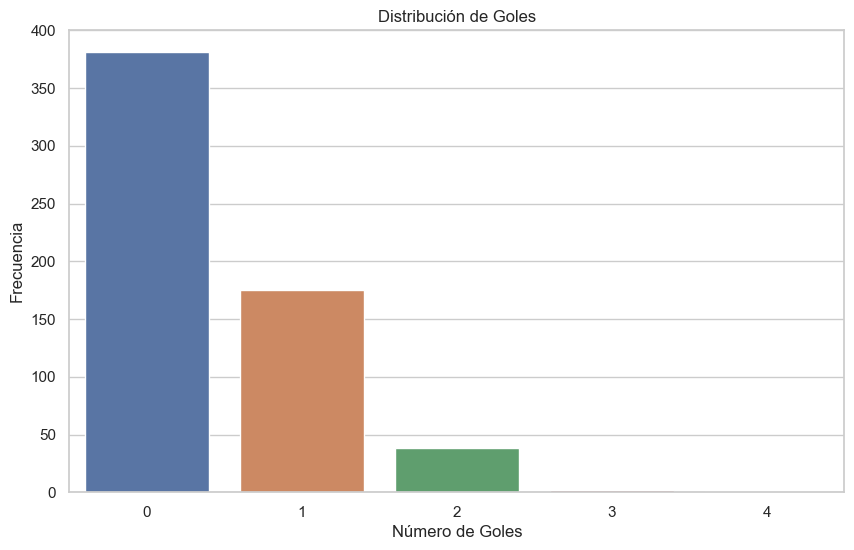


Correlaciones con la variable objetivo (Goles):
Eficiencia_Tiro         0.78
Tiros a puerta          0.61
Precision_Tiro          0.48
Tiros totales           0.37
Minutos                 0.22
Indice_Ofensivo         0.15
Minutos_por_Partido     0.08
Indice_Participacion    0.08
Bisemana                0.02
Semana_Año              0.02
Mes                     0.02
Año                    -0.04
Indice_Disciplina      -0.10
Name: Goles, dtype: float64


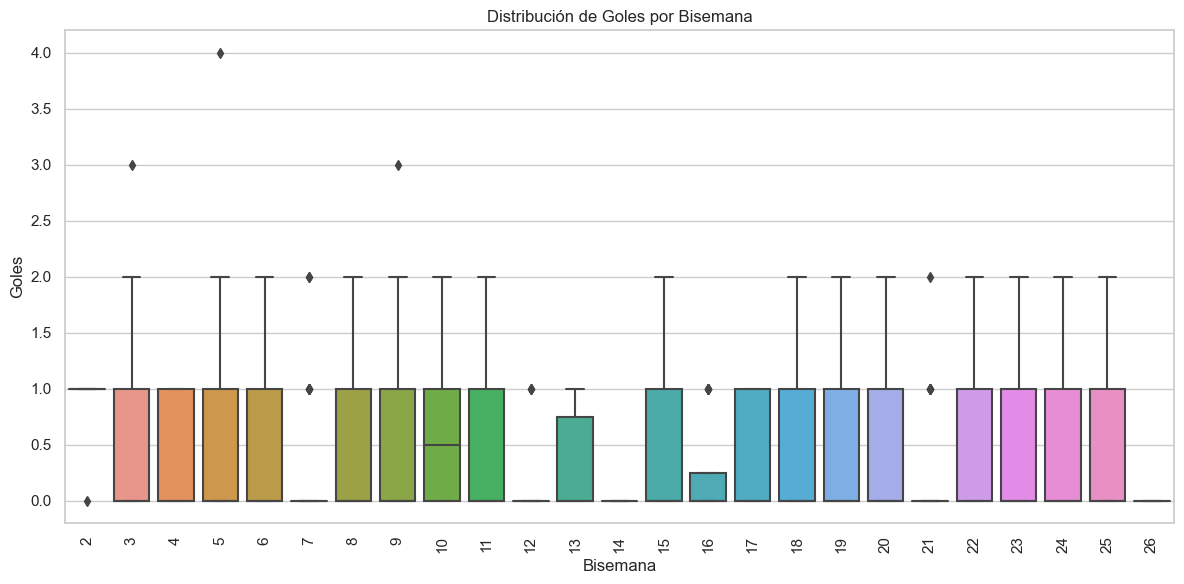

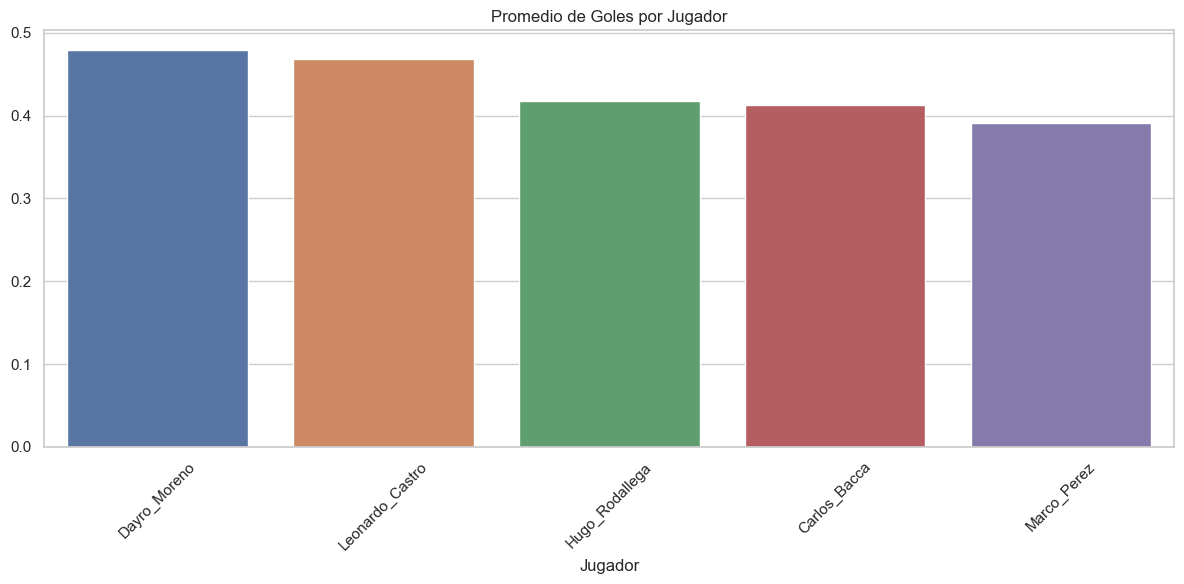


Datos preparados y guardados en 'datos_preparados_modelo_poisson.csv'

Variables incluidas en el modelo:
Variables numéricas: ['Tiros totales', 'Tiros a puerta', 'Minutos', 'Precision_Tiro', 'Indice_Ofensivo', 'Mes', 'Año', 'Semana_Año', 'Bisemana', 'Minutos_por_Partido', 'Eficiencia_Tiro', 'Indice_Participacion', 'Indice_Disciplina']
Variables binarias: ['Sede_Local', 'Sede_Visitante', 'Sede_Neutral']
Variables de oponente: 23 variables
Variables categóricas (convertidas a dummies): ['Posición', 'Fase_Torneo', 'Equipo', 'Trimestre']
Total de características: 62


{'X':      Tiros totales  Tiros a puerta  Minutos  Precision_Tiro  Indice_Ofensivo  Mes   Año  Semana_Año  Bisemana  Minutos_por_Partido  Eficiencia_Tiro  Indice_Participacion  Indice_Disciplina  Sede_Local  Sede_Visitante  Sede_Neutral Oponente_Alianza FC Oponente_América de Cali Oponente_Atlético Huila Oponente_Atlético Junior Oponente_Atlético Nacional Oponente_Boyacá Chicó Oponente_Bucaramanga Oponente_Cortuluá Oponente_Deportes Tolima Oponente_Deportivo Cali Oponente_Deportivo Pasto Oponente_Deportivo Pereira Oponente_Envigado Oponente_Fortaleza CEIF Oponente_Independiente Medellín Oponente_Independiente Santa Fe Oponente_Jaguares Oponente_La Equidad Oponente_Llaneros Oponente_Millonarios Oponente_Once Caldas Oponente_Unión Magdalena Oponente_Águilas Doradas  Posición_AM  Posición_DM  Posición_Delantero  Posición_FW  Posición_LM  Fase_Torneo_Final  Fase_Torneo_Inicio  Fase_Torneo_Medio  Equipo_CA BUCARAMANGA  Equipo_CO JUNIOR  Equipo_CO MILLONARIOS  Equipo_CO ONCE CALDAS  \
 5    

In [19]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('Goleadores_Procesados.csv')

# Identificar los jugadores únicos en el dataset
jugadores_unicos = df['Jugador'].unique()
print(f"Número de jugadores únicos en el dataset: {len(jugadores_unicos)}")
print(f"Jugadores: {jugadores_unicos}")

# Transformar las fechas a formato datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')

# Crear variable para semana del año y bisemana
df['Semana_Año'] = df['Fecha'].dt.isocalendar().week
df['Bisemana'] = (df['Semana_Año'] // 2) + 1  # Agrupar en períodos de 2 semanas

# Crear variable para trimestre del año
df['Trimestre'] = df['Fecha'].dt.quarter

# Crear variable de fase de torneo basada en trimestres (aproximación)
def asignar_fase_por_trimestre(trimestre):
    if pd.isna(trimestre):
        return 'Desconocido'
    elif trimestre == 1:
        return 'Inicio'
    elif trimestre == 2:
        return 'Medio'
    else:
        return 'Final'

df['Fase_Torneo'] = df['Trimestre'].apply(asignar_fase_por_trimestre)

# Filtrar solo partidos contra equipos colombianos si es_colombiano es True
if 'Es_Colombiano' in df.columns:
    df_colombiano = df[df['Es_Colombiano'] == True].copy()
else:
    df_colombiano = df.copy()
    print("Advertencia: No se encontró la columna 'Es_Colombiano', usando todos los datos.")

# Seleccionar variables relevantes para el modelo
variables_numericas = [
    'Tiros totales', 'Tiros a puerta', 'Minutos', 'Precision_Tiro',
    'Indice_Ofensivo', 'Mes', 'Año', 'Semana_Año', 'Bisemana',
    'Minutos_por_Partido', 'Eficiencia_Tiro', 
    'Indice_Participacion', 'Indice_Disciplina'
]

variables_binarias = [
    'Sede_Local', 'Sede_Visitante', 'Sede_Neutral'
]

# Variables categóricas que necesitan conversión a dummies
categoricas_para_dummies = ['Posición', 'Fase_Torneo', 'Equipo', 'Trimestre']

# Verificar si las variables existen en el dataframe
variables_numericas = [var for var in variables_numericas if var in df_colombiano.columns]
variables_binarias = [var for var in variables_binarias if var in df_colombiano.columns]
categoricas_para_dummies = [var for var in categoricas_para_dummies if var in df_colombiano.columns]

# Crear dummies para variables categóricas
dummies_list = []
for var in categoricas_para_dummies:
    dummies = pd.get_dummies(df_colombiano[var], prefix=var)
    dummies_list.append(dummies)

# Obtener variables de oponente que ya están como dummies en el dataset
oponente_cols = [col for col in df_colombiano.columns if col.startswith('Oponente_') and 
                col not in ['Oponente_Original', 'Oponente_Estandarizado']]

# Combinar todas las variables para el conjunto de datos final
X_numericas = df_colombiano[variables_numericas].copy()
X_binarias = df_colombiano[variables_binarias].copy()
X_oponentes = df_colombiano[oponente_cols].copy()

# Concatenar todas las partes
partes_X = [X_numericas, X_binarias, X_oponentes] + dummies_list
X = pd.concat(partes_X, axis=1)

# Variable objetivo
y = df_colombiano['Goles']

# Manejar valores faltantes
X.fillna(0, inplace=True)

# Ver estadísticas descriptivas
print(f"Dimensiones del conjunto de datos (después de filtrar): {X.shape}")
print(f"Número de registros original: {len(df)}")
print(f"Número de registros después de filtrar: {len(df_colombiano)}")
print("\nEstadísticas descriptivas de variables numéricas:")
print(X_numericas.describe())

# Ver distribución de la variable objetivo
plt.figure(figsize=(10, 6))
sns.countplot(x=y)
plt.title('Distribución de Goles')
plt.xlabel('Número de Goles')
plt.ylabel('Frecuencia')
plt.show()

# Mostrar correlaciones con la variable objetivo usando el método de pandas
correlaciones = pd.DataFrame()
correlaciones['Goles'] = y
for col in X_numericas.columns:
    correlaciones[col] = X_numericas[col]

# Calcular matriz de correlación usando pandas
corr_matrix = correlaciones.corr(method='pearson', numeric_only=True)
corr_with_goles = corr_matrix['Goles'].sort_values(ascending=False).drop('Goles')

print("\nCorrelaciones con la variable objetivo (Goles):")
print(corr_with_goles)

# Relación entre variables temporales y goles
if 'Bisemana' in X_numericas.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Bisemana', y='Goles', data=df_colombiano)
    plt.title('Distribución de Goles por Bisemana')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

# Analizar goles por jugador
plt.figure(figsize=(12, 6))
df_goles_por_jugador = df_colombiano.groupby('Jugador')['Goles'].mean().sort_values(ascending=False)
sns.barplot(x=df_goles_por_jugador.index, y=df_goles_por_jugador.values)
plt.title('Promedio de Goles por Jugador')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Exportar datos preparados
X_with_y = X.copy()
X_with_y['Goles'] = y
X_with_y['Jugador'] = df_colombiano['Jugador'].values  # Añadir columna de jugador para referencia
X_with_y.to_csv('datos_preparados_modelo_poisson.csv', index=False)

print("\nDatos preparados y guardados en 'datos_preparados_modelo_poisson.csv'")

# Mostrar las variables incluidas en el modelo
print("\nVariables incluidas en el modelo:")
print(f"Variables numéricas: {variables_numericas}")
print(f"Variables binarias: {variables_binarias}")
print(f"Variables de oponente: {len(oponente_cols)} variables")
print(f"Variables categóricas (convertidas a dummies): {categoricas_para_dummies}")
print(f"Total de características: {X.shape[1]}")

# Retornar los conjuntos de datos para el modelo
datos_preparados = {
    'X': X,
    'y': y,
    'df_completo': X_with_y,
    'jugadores': jugadores_unicos
}

# Este es el diccionario que contiene los datos preparados
datos_preparados

Entrenamiento modelo

Forma del DataFrame: (597, 64)

Tipos de datos:
bool       46
int64      11
float64     6
object      1
Name: count, dtype: int64

Estadísticas de variables numéricas:
       Tiros totales  Tiros a puerta  Minutos  Precision_Tiro  Indice_Ofensivo    Mes     Año  Semana_Año  Bisemana  Minutos_por_Partido  Eficiencia_Tiro  Indice_Participacion  Indice_Disciplina  Sede_Local  Sede_Visitante  Sede_Neutral  Oponente_Alianza FC  Oponente_América de Cali  Oponente_Atlético Huila  Oponente_Atlético Junior  Oponente_Atlético Nacional  Oponente_Boyacá Chicó  Oponente_Bucaramanga  Oponente_Cortuluá  Oponente_Deportes Tolima  Oponente_Deportivo Cali  Oponente_Deportivo Pasto  Oponente_Deportivo Pereira  Oponente_Envigado  Oponente_Fortaleza CEIF  Oponente_Independiente Medellín  Oponente_Independiente Santa Fe  Oponente_Jaguares  Oponente_La Equidad  Oponente_Llaneros  Oponente_Millonarios  Oponente_Once Caldas  Oponente_Unión Magdalena  Oponente_Águilas Doradas  Posición_AM  Posición_DM  Posición

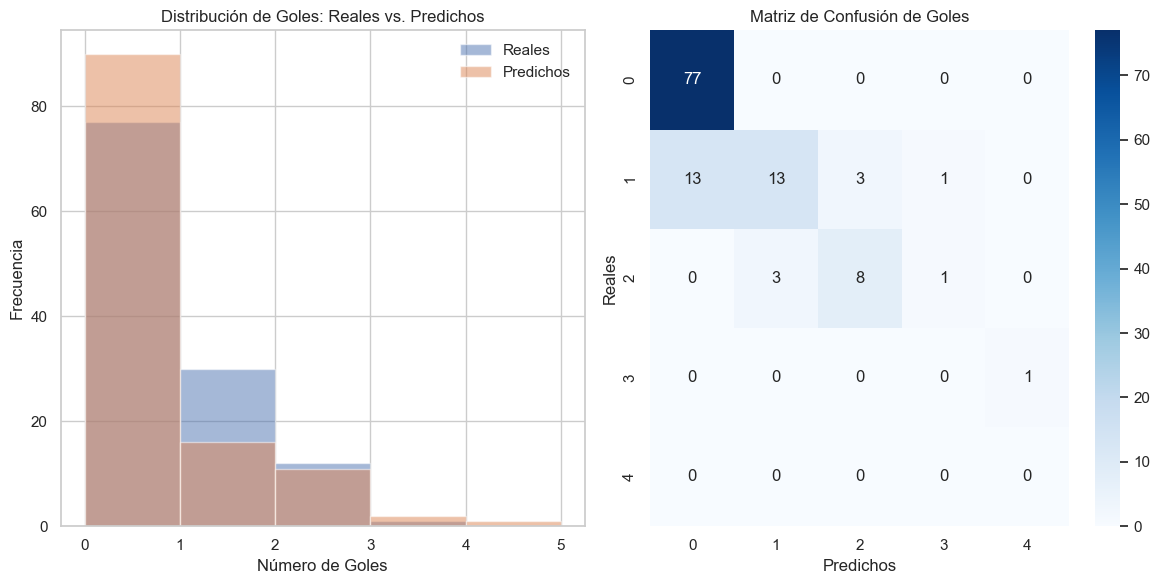


Modelo guardado como 'modelo_poisson_goles.pkl'


In [24]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Cargar los datos preparados
datos = pd.read_csv('datos_preparados_modelo_poisson.csv')

# Mostrar información básica
print(f"Forma del DataFrame: {datos.shape}")
print("\nTipos de datos:")
print(datos.dtypes.value_counts())

# Convertir columnas booleanas a numéricas (1/0)
for col in datos.select_dtypes(include=['bool']).columns:
    datos[col] = datos[col].astype(int)

# Separar características y variable objetivo
X = datos.drop(['Goles', 'Jugador'], axis=1)
y = datos['Goles']

# Verificar valores extremos en variables numéricas
print("\nEstadísticas de variables numéricas:")
print(X.describe())

# Identificar y eliminar valores extremos
columnas_numericas = X.select_dtypes(include=np.number).columns
for col in columnas_numericas:
    # Calcular rango intercuartílico (IQR)
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Definir límites para valores extremos
    lower_bound = Q1 - 3 * IQR
    upper_bound = Q3 + 3 * IQR
    
    # Recortar valores extremos
    X[col] = X[col].clip(lower=lower_bound, upper=upper_bound)

# Verificar que todo sea numérico
for col in X.columns:
    if not np.issubdtype(X[col].dtype, np.number):
        print(f"Convirtiendo columna no numérica: {col}")
        X[col] = pd.to_numeric(X[col], errors='coerce')

# Manejar valores nulos o infinitos
X = X.replace([np.inf, -np.inf], np.nan)
X = X.fillna(0)

# Estandarizar variables numéricas para mejorar la estabilidad numérica
scaler = StandardScaler()
X_scaled = X.copy()
X_scaled[columnas_numericas] = scaler.fit_transform(X[columnas_numericas])

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Añadir una constante para el intercepto
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Variable para controlar qué tipo de modelo se usa finalmente
modelo_tipo = "statsmodels_glm"  # Valores posibles: "statsmodels_glm", "sklearn_poisson"

# Ajustar modelo Poisson con manejo de errores
print("\nEntrenando modelo Poisson...")
try:
    # Intento inicial con el dataset completo
    poisson_model = sm.GLM(y_train, X_train_sm, family=sm.families.Poisson()).fit()
except ValueError as e:
    print(f"Error en el primer intento: {e}")
    
    # Identificar filas que podrían estar causando problemas
    print("Intentando identificar filas problemáticas...")
    
    # Probar con un subconjunto más pequeño
    subset_size = int(len(X_train) * 0.9)  # Usar 90% de los datos
    subset_idx = np.random.choice(len(X_train), size=subset_size, replace=False)
    
    X_train_subset = X_train.iloc[subset_idx]
    y_train_subset = y_train.iloc[subset_idx]
    
    # Añadir constante al subconjunto
    X_train_subset_sm = sm.add_constant(X_train_subset)
    
    # Intentar con el subconjunto
    try:
        poisson_model = sm.GLM(y_train_subset, X_train_subset_sm, family=sm.families.Poisson()).fit()
        print("Modelo entrenado con éxito usando un subconjunto de datos.")
    except ValueError:
        print("Error persistente. Intentando con una especificación alternativa...")
        
        # Intentar con un modelo de regresión Poisson más simple
        # Seleccionar solo las variables más importantes
        importantes = ['Tiros a puerta', 'Precision_Tiro', 'Eficiencia_Tiro', 'Indice_Ofensivo', 
                       'Sede_Local', 'Sede_Visitante']
        importantes = [col for col in importantes if col in X_train.columns]
        
        X_train_simple = X_train[importantes]
        X_train_simple_sm = sm.add_constant(X_train_simple)
        
        try:
            poisson_model = sm.GLM(y_train, X_train_simple_sm, family=sm.families.Poisson()).fit()
            print("Modelo simplificado entrenado con éxito.")
            
            # Ajustar X_test para usar solo estas variables
            X_test_sm = sm.add_constant(X_test[importantes])
        except ValueError:
            print("Todos los intentos fallaron con GLM. Usando un modelo alternativo...")
            
            # Usar un modelo de regresión Poisson alternativo
            from sklearn.linear_model import PoissonRegressor
            poisson_model = PoissonRegressor(alpha=1.0, max_iter=300)
            poisson_model.fit(X_train, y_train)
            modelo_tipo = "sklearn_poisson"
            
            print("Modelo PoissonRegressor de scikit-learn entrenado con éxito.")

# Imprimir resumen del modelo (si es un modelo statsmodels)
if modelo_tipo == "statsmodels_glm":
    print(poisson_model.summary())

# Predicción en conjunto de prueba
if modelo_tipo == "statsmodels_glm":
    y_pred = poisson_model.predict(X_test_sm)
else:
    # Para sklearn
    y_pred = poisson_model.predict(X_test)

# Las predicciones de Poisson son los valores lambda esperados (media)
# Para predecir el número de goles, redondeamos al entero más cercano
y_pred_rounded = np.round(y_pred).astype(int)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nEvaluación del modelo:")
print(f"Error cuadrático medio (MSE): {mse:.4f}")
print(f"Error absoluto medio (MAE): {mae:.4f}")
print(f"Raíz del error cuadrático medio (RMSE): {rmse:.4f}")

# Verificar distribución de predicciones vs. reales
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(y_test, bins=range(6), alpha=0.5, label='Reales')
plt.hist(y_pred_rounded, bins=range(6), alpha=0.5, label='Predichos')
plt.title('Distribución de Goles: Reales vs. Predichos')
plt.xlabel('Número de Goles')
plt.ylabel('Frecuencia')
plt.legend()

# Matriz de confusión para clasificación de número de goles
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rounded)

plt.subplot(1, 2, 2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión de Goles')
plt.xlabel('Predichos')
plt.ylabel('Reales')
plt.tight_layout()
plt.show()

# Guardar el modelo entrenado - Corregido para evitar el error
import pickle
if modelo_tipo == "statsmodels_glm":
    variables = X_train_sm.columns.tolist()
else:
    variables = X_train.columns.tolist()

modelo_dict = {
    'modelo': poisson_model,
    'variables': variables,
    'scaler': scaler,
    'tipo_modelo': modelo_tipo
}

with open('modelo_poisson_goles.pkl', 'wb') as f:
    pickle.dump(modelo_dict, f)

print("\nModelo guardado como 'modelo_poisson_goles.pkl'")

Usar modelo para prediccion calendario 2025

Iniciando predicción de goles para el calendario 2025...
Datos cargados: 597 registros de jugadores
Calendario procesado: 188 partidos
Modelo cargado. Tipo: statsmodels_glm

Columnas en el DataFrame de jugadores:
['Tiros totales', 'Tiros a puerta', 'Minutos', 'Precision_Tiro', 'Indice_Ofensivo', 'Mes', 'Año', 'Semana_Año', 'Bisemana', 'Minutos_por_Partido', 'Eficiencia_Tiro', 'Indice_Participacion', 'Indice_Disciplina', 'Sede_Local', 'Sede_Visitante', 'Sede_Neutral', 'Oponente_Alianza FC', 'Oponente_América de Cali', 'Oponente_Atlético Huila', 'Oponente_Atlético Junior', 'Oponente_Atlético Nacional', 'Oponente_Boyacá Chicó', 'Oponente_Bucaramanga', 'Oponente_Cortuluá', 'Oponente_Deportes Tolima', 'Oponente_Deportivo Cali', 'Oponente_Deportivo Pasto', 'Oponente_Deportivo Pereira', 'Oponente_Envigado', 'Oponente_Fortaleza CEIF', 'Oponente_Independiente Medellín', 'Oponente_Independiente Santa Fe', 'Oponente_Jaguares', 'Oponente_La Equidad', 'Oponente_Llaneros', 'Oponente_Millonarios', 'O

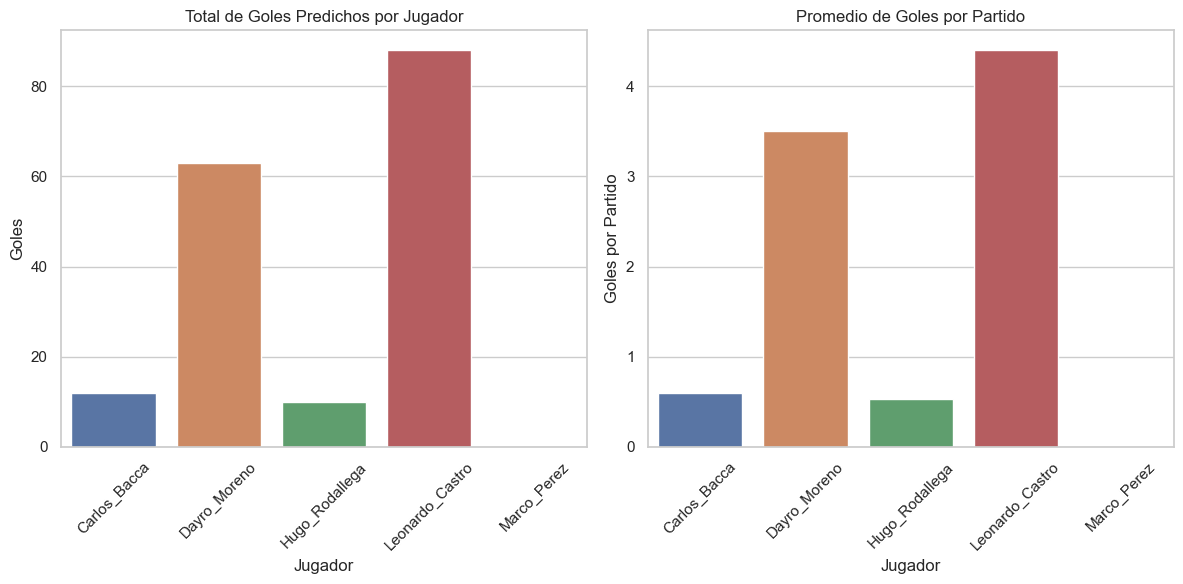


Predicciones por fecha:
Jugador                                     Carlos_Bacca  Dayro_Moreno  Hugo_Rodallega  Leonardo_Castro  Marco_Perez
Fecha_Numero Equipo      Oponente                                                                                   
1            Junior      Cali                          0             0               0                0            0
             Millonarios Unión Magdalena               0             0               0                0            0
             Once Caldas Atlético Nacional             0             0               0                0            0
             Santa Fe    Pereira                       0             0               0                0            0
2            Junior      Águilas Doradas               0             0               0                0            0
...                                                  ...           ...             ...              ...          ...
19           Santa Fe    Cali          

In [30]:
import pandas as pd
import numpy as np
import pickle
import statsmodels.api as sm
from datetime import datetime
import re
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Cargar el modelo entrenado
def cargar_modelo(ruta_modelo='modelo_poisson_goles.pkl'):
    """Carga el modelo entrenado desde un archivo pickle"""
    with open(ruta_modelo, 'rb') as f:
        modelo_dict = pickle.load(f)
    
    return modelo_dict['modelo'], modelo_dict['variables'], modelo_dict.get('tipo_modelo', 'statsmodels_glm')

# 2. Procesar el calendario
def procesar_calendario(ruta_calendario='calendario_2025.txt'):
    """Procesa el archivo de texto del calendario y lo convierte en DataFrame"""
    with open(ruta_calendario, 'r', encoding='utf-8') as f:
        contenido = f.read()
    
    # Procesar el contenido para extraer las fechas y partidos
    partidos = []
    
    # Patrón para identificar secciones de fechas
    pattern_fecha = r'Fecha (\d+)\s+([^\n]+)'
    
    # Dividir el contenido por fechas
    secciones_fechas = re.findall(pattern_fecha, contenido)
    
    for num_fecha, fecha_texto in secciones_fechas:
        # Convertir la fecha de texto a objeto datetime
        try:
            # Intentar extraer la fecha (formato esperado: "Viernes 24 de enero")
            match_fecha = re.search(r'(\w+) (\d+) de (\w+)', fecha_texto)
            if match_fecha:
                dia_semana, dia, mes = match_fecha.groups()
                # Mapear nombres de meses en español a números
                meses = {
                    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4, 'mayo': 5, 'junio': 6,
                    'julio': 7, 'agosto': 8, 'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
                }
                mes_num = meses.get(mes.lower(), 1)  # Default a enero si no se encuentra
                fecha_obj = datetime(2025, mes_num, int(dia))
            else:
                # Si no se puede extraer la fecha, usar un valor predeterminado
                fecha_obj = datetime(2025, 1, 1)
        except:
            # En caso de error, usar un valor predeterminado
            fecha_obj = datetime(2025, 1, 1)
        
        # Buscar los partidos para esta fecha
        inicio_seccion = contenido.find(f"Fecha {num_fecha}")
        if inicio_seccion == -1:
            continue
            
        # Buscar el inicio de la siguiente fecha o el final del archivo
        siguiente_fecha = f"Fecha {int(num_fecha) + 1}"
        fin_seccion = contenido.find(siguiente_fecha, inicio_seccion)
        if fin_seccion == -1:
            fin_seccion = len(contenido)
        
        # Extraer el texto de la sección actual
        seccion_texto = contenido[inicio_seccion:fin_seccion]
        
        # Buscar los partidos en esta sección (patrón: -Equipo1 vs. Equipo2)
        partido_pattern = r'-([^v]+)\s+vs\.\s+(.+)'
        partidos_encontrados = re.findall(partido_pattern, seccion_texto)
        
        for equipo_local, equipo_visitante in partidos_encontrados:
            # Limpiar espacios en blanco
            equipo_local = equipo_local.strip()
            equipo_visitante = equipo_visitante.strip()
            
            # Añadir a la lista de partidos
            partidos.append({
                'Fecha_Numero': int(num_fecha),
                'Fecha': fecha_obj,
                'Mes': fecha_obj.month,
                'Año': 2025,
                'Dia_Semana': fecha_obj.strftime('%A'),
                'Equipo_Local': equipo_local,
                'Equipo_Visitante': equipo_visitante,
                'Semana_Año': fecha_obj.isocalendar()[1],
                'Bisemana': (fecha_obj.isocalendar()[1] // 2) + 1,
                'Trimestre': (fecha_obj.month - 1) // 3 + 1
            })
    
    # Convertir a DataFrame
    df_calendario = pd.DataFrame(partidos)
    
    # Añadir fase del torneo
    def asignar_fase(fecha_num):
        if fecha_num <= 7:
            return 'Inicio'
        elif fecha_num <= 14:
            return 'Medio'
        else:
            return 'Final'
    
    df_calendario['Fase_Torneo'] = df_calendario['Fecha_Numero'].apply(asignar_fase)
    
    return df_calendario

# 3. Preparar datos para predicción por jugador
def preparar_datos_prediccion_jugador(df_calendario, df_jugadores, variables_modelo):
    """Prepara los datos para predecir goles para cada jugador en el calendario"""
    # Verificar las columnas disponibles en el DataFrame
    print("\nColumnas en el DataFrame de jugadores:")
    print(df_jugadores.columns.tolist())
    
    # Obtener información de los jugadores
    jugadores = df_jugadores['Jugador'].unique()
    print(f"\nPreparando predicciones para {len(jugadores)} jugadores: {jugadores}")
    
    # Asignar equipos manualmente para jugadores específicos
    equipos_manuales = {
        'Carlos_Bacca': 'Junior',
        'Dayro_Moreno': 'Once Caldas',
        'Hugo_Rodallega': 'Santa Fe',
        'Leonardo_Castro': 'Millonarios',
        'Marco_Perez': 'Junior'
    }
    
    # Determinar equipo actual de cada jugador
    equipos_jugador = {}
    for jugador in jugadores:
        # Intentar asignar equipo manual
        if jugador in equipos_manuales:
            equipos_jugador[jugador] = equipos_manuales[jugador]
            print(f"Jugador: {jugador}, Equipo asignado manualmente: {equipos_jugador[jugador]}")
        else:
            # Si no está en la lista manual, asignar uno predeterminado
            equipos_jugador[jugador] = "Junior"
            print(f"Jugador: {jugador}, Equipo predeterminado: {equipos_jugador[jugador]}")
    
    # Preparar datos para predicción
    predicciones = []
    
    # Para cada partido del calendario
    for i, partido in df_calendario.iterrows():
        # Para cada jugador
        for jugador in jugadores:
            if jugador not in equipos_jugador:
                continue
                
            equipo = equipos_jugador[jugador]
            
            # Verificar si el jugador participa en este partido
            juega_local = equipo in partido['Equipo_Local']
            juega_visitante = equipo in partido['Equipo_Visitante']
            
            # Comparación más flexible
            if not (juega_local or juega_visitante):
                equipo_local_lower = partido['Equipo_Local'].lower()
                equipo_visitante_lower = partido['Equipo_Visitante'].lower()
                equipo_lower = equipo.lower()
                
                juega_local = equipo_lower in equipo_local_lower
                juega_visitante = equipo_lower in equipo_visitante_lower
            
            if not (juega_local or juega_visitante):
                continue
            
            # Obtener oponente
            oponente = partido['Equipo_Visitante'] if juega_local else partido['Equipo_Local']
            
            # Filtrar datos históricos del jugador
            datos_jugador = df_jugadores[df_jugadores['Jugador'] == jugador]
            
            # Crear registro base para este partido
            registro = {
                'Jugador': jugador,
                'Equipo': equipo,
                'Oponente': oponente,
                'Fecha_Numero': partido['Fecha_Numero'],
                'Fecha': partido['Fecha'],
                'Sede_Local': 1 if juega_local else 0,
                'Sede_Visitante': 1 if juega_visitante else 0,
                'Sede_Neutral': 0,
                'Mes': partido['Mes'],
                'Año': partido['Año'],
                'Semana_Año': partido['Semana_Año'],
                'Bisemana': partido['Bisemana'],
                'Trimestre': partido['Trimestre'],
                'Fase_Torneo': partido['Fase_Torneo']
            }
            
            # Añadir estadísticas promedio del jugador
            for col in variables_modelo:
                if col in ['Tiros totales', 'Tiros a puerta', 'Minutos', 'Precision_Tiro', 'Indice_Ofensivo', 
                          'Minutos_por_Partido', 'Eficiencia_Tiro', 'Indice_Participacion', 'Indice_Disciplina']:
                    if col in datos_jugador.columns:
                        registro[col] = datos_jugador[col].mean()
                    else:
                        registro[col] = 0
            
            # Crear variables dummy para equipos
            for col in variables_modelo:
                if col.startswith('Equipo_'):
                    equipo_col = col.replace('Equipo_', '')
                    
                    # Comparación de equipos
                    if equipo_col == "JUNIOR" and equipo == "Junior":
                        registro[col] = 1
                    elif equipo_col == "ONCE CALDAS" and equipo == "Once Caldas":
                        registro[col] = 1
                    elif equipo_col == "SANTA FE" and equipo == "Santa Fe":
                        registro[col] = 1
                    elif equipo_col == "MILLONARIOS" and equipo == "Millonarios":
                        registro[col] = 1
                    else:
                        registro[col] = 0
            
            # Crear variables dummy para oponentes
            for col in variables_modelo:
                if col.startswith('Oponente_'):
                    oponente_nombre = col.replace('Oponente_', '')
                    
                    # Comparar nombres de oponentes
                    oponente_match = False
                    
                    # Lista de posibles equivalencias
                    equivalencias = [
                        ('Junior', ['Junior', 'Atlético Junior', 'JUNIOR']),
                        ('Santa Fe', ['Santa Fe', 'Independiente Santa Fe', 'SANTA FE']),
                        ('Once Caldas', ['Once Caldas', 'ONCE CALDAS']),
                        ('Millonarios', ['Millonarios', 'MILLONARIOS']),
                        ('Tolima', ['Tolima', 'Deportes Tolima']),
                        ('Cali', ['Cali', 'Deportivo Cali']),
                        ('Nacional', ['Nacional', 'Atlético Nacional']),
                        ('América', ['América', 'América de Cali']),
                        ('Pereira', ['Pereira', 'Deportivo Pereira']),
                        ('Bucaramanga', ['Bucaramanga', 'Atlético Bucaramanga']),
                        ('Pasto', ['Pasto', 'Deportivo Pasto']),
                        ('Medellín', ['Medellín', 'Independiente Medellín', 'DIM','Independiente']),
                        ('Envigado', ['Envigado']),
                        ('Chicó', ['Chicó', 'Boyacá Chicó']),
                        ('Águilas', ['Águilas', 'Águilas Doradas']),
                        ('La Equidad', ['La Equidad', 'Equidad']),
                        ('Alianza', ['Alianza', 'Alianza FC']),
                        ('Llaneros', ['Llaneros']),
                        ('Fortaleza', ['Fortaleza', 'Fortaleza CEIF']),
                        ('Unión Magdalena', ['Unión Magdalena', 'Unión'])
                    ]
                    
                    for equiv_name, variants in equivalencias:
                        if any(variant in oponente_nombre for variant in variants) and any(variant in oponente for variant in variants):
                            oponente_match = True
                            break
                    
                    registro[col] = 1 if oponente_match else 0
            
            # Crear variables dummy para posición
            if 'Posición' in datos_jugador.columns:
                posicion = datos_jugador['Posición'].mode()[0]  # Posición más común
                for col in variables_modelo:
                    if col.startswith('Posición_'):
                        pos_col = col.replace('Posición_', '')
                        registro[col] = 1 if posicion == pos_col else 0
            
            # Crear variables dummy para fase del torneo
            for col in variables_modelo:
                if col.startswith('Fase_Torneo_'):
                    fase_col = col.replace('Fase_Torneo_', '')
                    registro[col] = 1 if partido['Fase_Torneo'] == fase_col else 0
            
            # Crear variables dummy para trimestre
            for col in variables_modelo:
                if col.startswith('Trimestre_'):
                    trim_col = int(col.replace('Trimestre_', ''))
                    registro[col] = 1 if partido['Trimestre'] == trim_col else 0
            
            # Añadir a la lista de predicciones
            predicciones.append(registro)
    
    # Si no hay predicciones, devolver None
    if len(predicciones) == 0:
        print("No se encontraron coincidencias de jugadores con partidos del calendario.")
        return None, None
    
    # Convertir a DataFrame
    df_pred = pd.DataFrame(predicciones)
    
    # Asegurarse de que todas las columnas del modelo estén presentes
    for col in variables_modelo:
        if col not in df_pred.columns:
            df_pred[col] = 0
    
    # Seleccionar solo las variables del modelo y en el mismo orden
    X_pred = df_pred[variables_modelo].copy()
    
    # Información adicional para interpretación
    info = df_pred[['Jugador', 'Equipo', 'Oponente', 'Fecha_Numero', 'Fecha', 'Sede_Local', 'Sede_Visitante']]
    
    return X_pred, info

# 4. Realizar predicciones
def predecir_goles_calendario(df_calendario, df_jugadores):
    """Predice los goles para cada jugador en los partidos del calendario 2025"""
    # Cargar modelo
    modelo, variables, tipo_modelo = cargar_modelo()
    print(f"Modelo cargado. Tipo: {tipo_modelo}")
    
    # Preparar datos para predicción
    X_pred, info = preparar_datos_prediccion_jugador(df_calendario, df_jugadores, variables)
    
    if X_pred is None:
        return None
    
    # Añadir constante para statsmodels si es necesario
    if tipo_modelo == "statsmodels_glm":
        X_pred_sm = sm.add_constant(X_pred)
        # Realizar predicciones
        y_pred = modelo.predict(X_pred_sm)
    else:
        # Para modelos de sklearn
        y_pred = modelo.predict(X_pred)
    
    # Redondear a número entero de goles
    y_pred_rounded = np.round(y_pred).astype(int)
    
    # Combinar predicciones con información
    predicciones = info.copy()
    predicciones['Goles_Predichos'] = y_pred
    predicciones['Goles_Redondeados'] = y_pred_rounded
    
    return predicciones

# 5. Función principal para ejecutar la predicción
def predecir_goles_2025(ruta_jugadores='datos_preparados_modelo_poisson.csv', 
                        ruta_calendario='calendario_2025.txt'):
    """Función principal para predecir goles de jugadores en el calendario 2025"""
    print("Iniciando predicción de goles para el calendario 2025...")
    
    # Cargar datos de jugadores
    df_jugadores = pd.read_csv(ruta_jugadores)
    print(f"Datos cargados: {df_jugadores.shape[0]} registros de jugadores")
    
    # Procesar calendario
    df_calendario = procesar_calendario(ruta_calendario)
    print(f"Calendario procesado: {df_calendario.shape[0]} partidos")
    
    # Realizar predicciones
    predicciones = predecir_goles_calendario(df_calendario, df_jugadores)
    
    if predicciones is None:
        print("No se pudieron realizar predicciones.")
        return None, None, None
    
    # Guardar predicciones
    predicciones.to_csv('predicciones_goles_2025.csv', index=False)
    print(f"Predicciones guardadas en 'predicciones_goles_2025.csv'")
    
    # Mostrar resumen de predicciones
    print("\nResumen de predicciones por jugador:")
    resumen = predicciones.groupby('Jugador').agg({
        'Goles_Redondeados': ['sum', 'mean', 'count']
    })
    resumen.columns = ['Total_Goles', 'Promedio_Goles', 'Partidos']
    print(resumen)
    
    # Visualizar predicciones
    plt.figure(figsize=(12, 6))
    
    # Gráfico 1: Total de goles por jugador
    plt.subplot(1, 2, 1)
    sns.barplot(x='Jugador', y='Total_Goles', data=resumen.reset_index())
    plt.title('Total de Goles Predichos por Jugador')
    plt.xticks(rotation=45)
    plt.ylabel('Goles')
    
    # Gráfico 2: Promedio de goles por jugador
    plt.subplot(1, 2, 2)
    sns.barplot(x='Jugador', y='Promedio_Goles', data=resumen.reset_index())
    plt.title('Promedio de Goles por Partido')
    plt.xticks(rotation=45)
    plt.ylabel('Goles por Partido')
    
    plt.tight_layout()
    plt.savefig('predicciones_goles_2025.png')
    plt.show()
    
    # Crear tabla detallada por fecha
    print("\nPredicciones por fecha:")
    tabla_fechas = predicciones.pivot_table(
        index=['Fecha_Numero', 'Equipo', 'Oponente'],
        columns='Jugador',
        values='Goles_Redondeados',
        aggfunc='sum'
    ).fillna(0).astype(int)
    
    print(tabla_fechas)
    
    return predicciones, resumen, tabla_fechas

# Si se ejecuta como script principal
if __name__ == "__main__":
    predicciones, resumen, tabla_fechas = predecir_goles_2025()

Preparacion ARIMAX

Datos cargados: 597 registros
Preparando datos para 5 jugadores: ['Leonardo_Castro' 'Marco_Perez' 'Dayro_Moreno' 'Carlos_Bacca'
 'Hugo_Rodallega']
Total de variables exógenas: 47
Variables de oponentes incluidas: 23
Jugador: Leonardo_Castro, Observaciones: 126, Estacionaria: True (p-valor: 0.0000)
Jugador: Marco_Perez, Observaciones: 115, Estacionaria: True (p-valor: 0.0000)
Jugador: Dayro_Moreno, Observaciones: 144, Estacionaria: True (p-valor: 0.0000)
Jugador: Carlos_Bacca, Observaciones: 121, Estacionaria: False (p-valor: 0.0919)
Jugador: Hugo_Rodallega, Observaciones: 91, Estacionaria: True (p-valor: 0.0000)


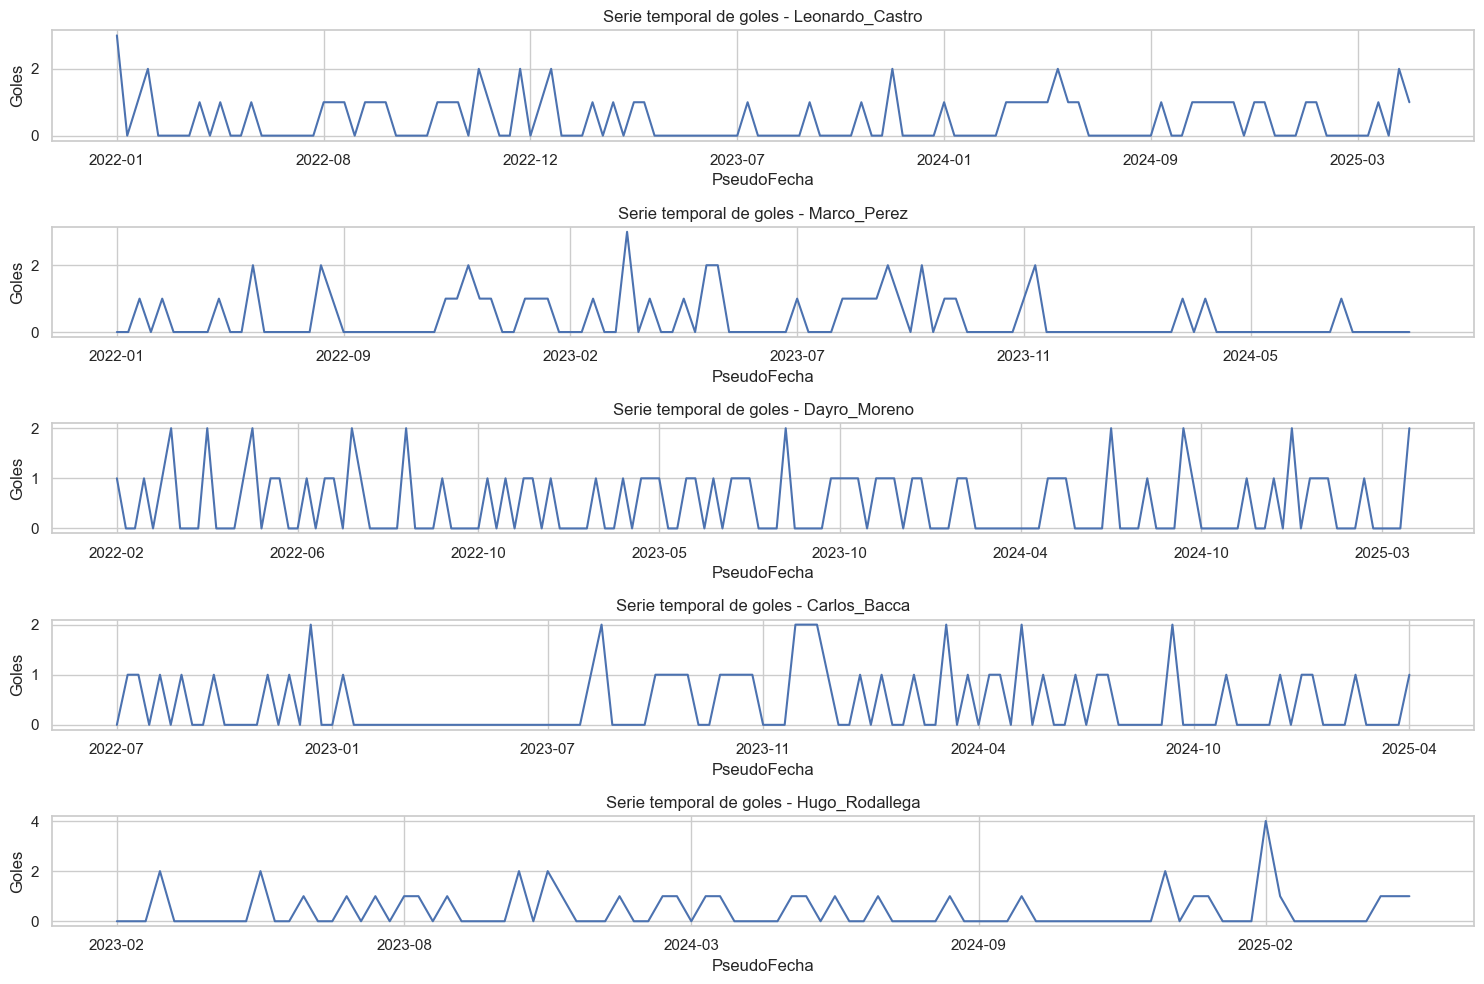

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Cargar los datos
def preparar_datos_arimax(ruta_archivo='datos_preparados_modelo_poisson.csv'):
    """
    Prepara los datos para un modelo ARIMAX, organizándolos en series temporales
    para cada jugador con variables exógenas.
    """
    # Cargar datos
    df = pd.read_csv(ruta_archivo)
    print(f"Datos cargados: {df.shape[0]} registros")
    
    # Convertir la fecha a formato datetime si está en formato string
    if 'Fecha' in df.columns and not pd.api.types.is_datetime64_any_dtype(df['Fecha']):
        try:
            df['Fecha'] = pd.to_datetime(df['Fecha'])
        except:
            print("No se pudo convertir la columna Fecha a datetime. Usando índices temporales.")
    
    # Ordenar por fecha si está disponible, o por algún otro índice temporal
    if 'Fecha' in df.columns:
        df = df.sort_values('Fecha')
    elif 'Año' in df.columns and 'Mes' in df.columns:
        # Crear una pseudo-fecha basada en Año y Mes
        df['PseudoFecha'] = df['Año'].astype(str) + '-' + df['Mes'].astype(str).str.zfill(2)
        df = df.sort_values('PseudoFecha')
    
    # Listar jugadores únicos
    jugadores = df['Jugador'].unique()
    print(f"Preparando datos para {len(jugadores)} jugadores: {jugadores}")
    
    # Seleccionar variables relevantes para el modelo ARIMAX
    # Variables básicas
    variables_exogenas_base = [
        'Tiros totales', 'Tiros a puerta', 'Minutos', 'Precision_Tiro',
        'Indice_Ofensivo', 'Minutos_por_Partido', 'Eficiencia_Tiro', 
        'Indice_Participacion', 'Indice_Disciplina', 'Sede_Local', 
        'Sede_Visitante', 'Sede_Neutral'
    ]
    
    # Añadir variables de oponentes
    variables_oponente = [col for col in df.columns if col.startswith('Oponente_') and 
                         col not in ['Oponente_Original', 'Oponente_Estandarizado']]
    
    # Añadir variables de posición, fase y temporales
    variables_adicionales = [col for col in df.columns if col.startswith('Posición_') or 
                            col.startswith('Fase_Torneo_') or 
                            col.startswith('Trimestre_')]
    
    # Combinar todas las variables exógenas
    todas_variables_exogenas = variables_exogenas_base + variables_oponente + variables_adicionales
    
    # Verificar que las variables exogenas estén en el dataframe
    variables_exogenas = [var for var in todas_variables_exogenas if var in df.columns]
    
    print(f"Total de variables exógenas: {len(variables_exogenas)}")
    print(f"Variables de oponentes incluidas: {len(variables_oponente)}")
    
    # Crear diccionarios para almacenar las series temporales y variables exógenas de cada jugador
    datos_jugadores = {}
    
    for jugador in jugadores:
        # Filtrar datos del jugador
        datos_jugador = df[df['Jugador'] == jugador].copy()
        
        # Verificar si hay suficientes datos para el análisis de series temporales
        if len(datos_jugador) < 8:  # Mínimo recomendado para ARIMA
            print(f"Advertencia: {jugador} tiene solo {len(datos_jugador)} observaciones, lo cual puede ser insuficiente para ARIMAX.")
        
        # Establecer índice temporal
        if 'Fecha' in datos_jugador.columns:
            datos_jugador = datos_jugador.set_index('Fecha')
        elif 'PseudoFecha' in datos_jugador.columns:
            datos_jugador = datos_jugador.set_index('PseudoFecha')
        
        # Crear la serie temporal de goles
        serie_goles = datos_jugador['Goles']
        
        # Extraer variables exógenas
        variables_exogenas_jugador = datos_jugador[variables_exogenas].copy()
        
        # Manejar valores faltantes
        serie_goles = serie_goles.fillna(0)
        variables_exogenas_jugador = variables_exogenas_jugador.fillna(0)
        
        # Almacenar los datos del jugador
        datos_jugadores[jugador] = {
            'serie_goles': serie_goles,
            'variables_exogenas': variables_exogenas_jugador,
            'n_observaciones': len(serie_goles)
        }
        
        # Análisis de estacionariedad
        resultado_adf = adfuller(serie_goles)
        datos_jugadores[jugador]['estacionaria'] = resultado_adf[1] < 0.05  # p-valor < 0.05 indica estacionariedad
        datos_jugadores[jugador]['adf_pvalue'] = resultado_adf[1]
        
        print(f"Jugador: {jugador}, Observaciones: {len(serie_goles)}, Estacionaria: {datos_jugadores[jugador]['estacionaria']} (p-valor: {resultado_adf[1]:.4f})")
    
    # Visualizar las series de goles para cada jugador
    plt.figure(figsize=(15, 10))
    
    for i, (jugador, datos) in enumerate(datos_jugadores.items(), 1):
        plt.subplot(len(jugadores), 1, i)
        datos['serie_goles'].plot()
        plt.title(f"Serie temporal de goles - {jugador}")
        plt.ylabel("Goles")
        plt.grid(True)
    
    plt.tight_layout()
    plt.savefig('series_temporales_goles.png')
    plt.show()
    
    return datos_jugadores, variables_exogenas

if __name__ == "__main__":
    datos_jugadores, variables_exogenas = preparar_datos_arimax()

Entrenamiento ARIMAX

Datos cargados: 597 registros
Preparando datos para 5 jugadores: ['Leonardo_Castro' 'Marco_Perez' 'Dayro_Moreno' 'Carlos_Bacca'
 'Hugo_Rodallega']
Jugador: Leonardo_Castro, Observaciones: 126, Estacionaria: True (p-valor: 0.0000)
Jugador: Marco_Perez, Observaciones: 115, Estacionaria: True (p-valor: 0.0000)
Jugador: Dayro_Moreno, Observaciones: 144, Estacionaria: True (p-valor: 0.0000)
Jugador: Carlos_Bacca, Observaciones: 121, Estacionaria: False (p-valor: 0.0919)
Jugador: Hugo_Rodallega, Observaciones: 91, Estacionaria: True (p-valor: 0.0000)


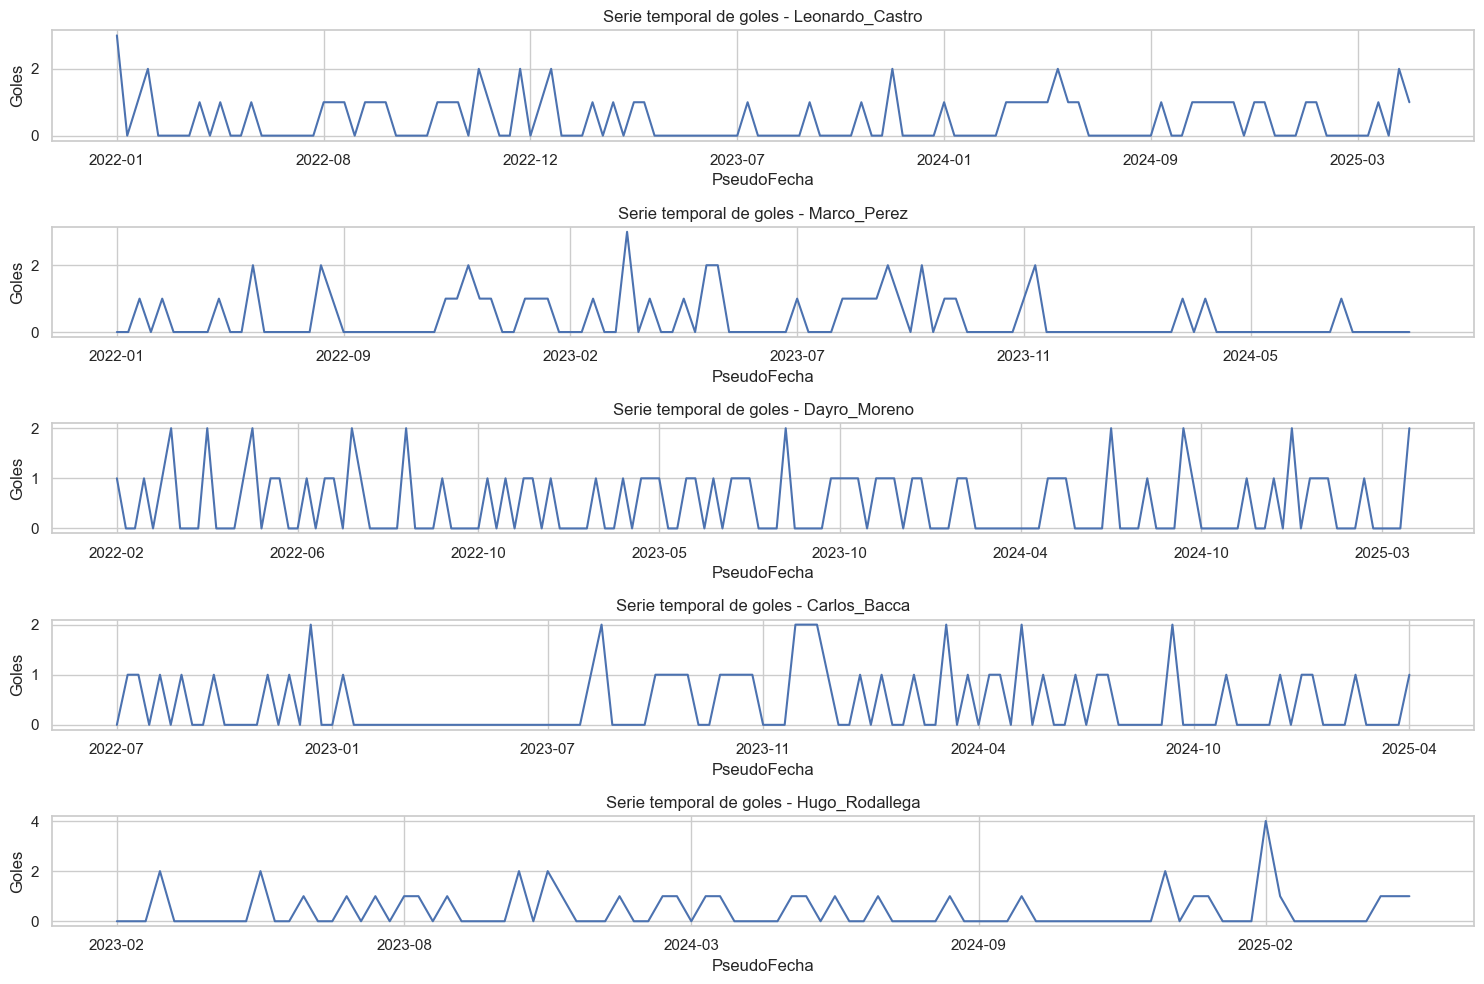

Iniciando entrenamiento de modelos ARIMAX...

Entrenando modelo para Leonardo_Castro
ARIMAX(0, 0, 0) - AIC: -1.2063
ARIMAX(0, 0, 1) - AIC: -3.0856
ARIMAX(0, 0, 2) - AIC: -0.4591
ARIMAX(0, 1, 0) - AIC: 83.4420
ARIMAX(0, 1, 1) - AIC: 4.9129
ARIMAX(0, 1, 2) - AIC: 5.3932
ARIMAX(0, 2, 0) - AIC: 215.1358
ARIMAX(0, 2, 1) - AIC: 88.3158
ARIMAX(0, 2, 2) - AIC: 32.3783
ARIMAX(1, 0, 0) - AIC: 0.2066
ARIMAX(1, 0, 1) - AIC: 383.6225
ARIMAX(1, 0, 2) - AIC: 0.2480
ARIMAX(1, 1, 0) - AIC: 55.7673
ARIMAX(1, 1, 1) - AIC: 8.7677
ARIMAX(1, 1, 2) - AIC: 9.9310
ARIMAX(1, 2, 0) - AIC: 157.4196
ARIMAX(1, 2, 1) - AIC: 59.8383
ARIMAX(1, 2, 2) - AIC: 60.0551
ARIMAX(2, 0, 0) - AIC: -0.7623
ARIMAX(2, 0, 1) - AIC: 420.7191
ARIMAX(2, 0, 2) - AIC: 3.6868
ARIMAX(2, 1, 0) - AIC: 26.4927
ARIMAX(2, 1, 1) - AIC: 25.1158
ARIMAX(2, 1, 2) - AIC: 17.6923
ARIMAX(2, 2, 0) - AIC: 95.1251
ARIMAX(2, 2, 1) - AIC: 36.4846
ARIMAX(2, 2, 2) - AIC: 43.3376

Mejor modelo para Leonardo_Castro: ARIMAX(0, 0, 1) - AIC: -3.0856
MAE: 0.1371, R

In [46]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import warnings
from sklearn.metrics import mean_squared_error, mean_absolute_error
from datetime import datetime
from statsmodels.tsa.stattools import adfuller

warnings.filterwarnings("ignore")

# Incluir el código de preparación directamente
def preparar_datos_arimax(ruta_archivo='datos_preparados_modelo_poisson.csv'):
    """
    Prepara los datos para un modelo ARIMAX, organizándolos en series temporales
    para cada jugador con variables exógenas.
    """
    # Cargar datos
    df = pd.read_csv(ruta_archivo)
    print(f"Datos cargados: {df.shape[0]} registros")
    
    # Convertir la fecha a formato datetime si está en formato string
    if 'Fecha' in df.columns and not pd.api.types.is_datetime64_any_dtype(df['Fecha']):
        try:
            df['Fecha'] = pd.to_datetime(df['Fecha'])
        except:
            print("No se pudo convertir la columna Fecha a datetime. Usando índices temporales.")
    
    # Ordenar por fecha si está disponible, o por algún otro índice temporal
    if 'Fecha' in df.columns:
        df = df.sort_values('Fecha')
    elif 'Año' in df.columns and 'Mes' in df.columns:
        # Crear una pseudo-fecha basada en Año y Mes
        df['PseudoFecha'] = df['Año'].astype(str) + '-' + df['Mes'].astype(str).str.zfill(2)
        df = df.sort_values('PseudoFecha')
    
    # Listar jugadores únicos
    jugadores = df['Jugador'].unique()
    print(f"Preparando datos para {len(jugadores)} jugadores: {jugadores}")
    
    # Seleccionar variables relevantes para el modelo ARIMAX
    # Para ARIMAX necesitamos una serie temporal (goles) y variables exógenas
    variables_exogenas = [
        'Tiros totales', 'Tiros a puerta', 'Minutos', 'Precision_Tiro',
        'Minutos_por_Partido', 'Eficiencia_Tiro', 'Indice_Participacion', 
        'Indice_Disciplina', 'Sede_Local', 'Sede_Visitante'
    ]
    
    # Verificar que las variables exogenas estén en el dataframe
    variables_exogenas = [var for var in variables_exogenas if var in df.columns]
    
    # Crear diccionarios para almacenar las series temporales y variables exógenas de cada jugador
    datos_jugadores = {}
    
    for jugador in jugadores:
        # Filtrar datos del jugador
        datos_jugador = df[df['Jugador'] == jugador].copy()
        
        # Verificar si hay suficientes datos para el análisis de series temporales
        if len(datos_jugador) < 8:  # Mínimo recomendado para ARIMA
            print(f"Advertencia: {jugador} tiene solo {len(datos_jugador)} observaciones, lo cual puede ser insuficiente para ARIMAX.")
        
        # Establecer índice temporal
        if 'Fecha' in datos_jugador.columns:
            datos_jugador = datos_jugador.set_index('Fecha')
        elif 'PseudoFecha' in datos_jugador.columns:
            datos_jugador = datos_jugador.set_index('PseudoFecha')
        
        # Crear la serie temporal de goles
        serie_goles = datos_jugador['Goles']
        
        # Extraer variables exógenas
        variables_exogenas_jugador = datos_jugador[variables_exogenas].copy()
        
        # Manejar valores faltantes
        serie_goles = serie_goles.fillna(0)
        variables_exogenas_jugador = variables_exogenas_jugador.fillna(0)
        
        # Almacenar los datos del jugador
        datos_jugadores[jugador] = {
            'serie_goles': serie_goles,
            'variables_exogenas': variables_exogenas_jugador,
            'n_observaciones': len(serie_goles)
        }
        
        # Análisis de estacionariedad
        resultado_adf = adfuller(serie_goles)
        datos_jugadores[jugador]['estacionaria'] = resultado_adf[1] < 0.05  # p-valor < 0.05 indica estacionariedad
        datos_jugadores[jugador]['adf_pvalue'] = resultado_adf[1]
        
        print(f"Jugador: {jugador}, Observaciones: {len(serie_goles)}, Estacionaria: {datos_jugadores[jugador]['estacionaria']} (p-valor: {resultado_adf[1]:.4f})")
    
    # Visualizar las series de goles para cada jugador
    plt.figure(figsize=(15, 10))
    
    for i, (jugador, datos) in enumerate(datos_jugadores.items(), 1):
        plt.subplot(len(jugadores), 1, i)
        datos['serie_goles'].plot()
        plt.title(f"Serie temporal de goles - {jugador}")
        plt.ylabel("Goles")
        plt.grid(True)
    
    plt.tight_layout()
    plt.savefig('series_temporales_goles.png')
    plt.show()
    
    return datos_jugadores, variables_exogenas

def entrenar_modelos_arimax(datos_jugadores, variables_exogenas):
    """
    Entrena modelos ARIMAX para cada jugador utilizando los datos preparados.
    Encuentra los mejores parámetros para cada jugador y guarda los modelos entrenados.
    
    Parámetros:
    -----------
    datos_jugadores: dict
        Diccionario con los datos preparados para cada jugador
    variables_exogenas: list
        Lista de nombres de variables exógenas utilizadas
    
    Retorna:
    --------
    dict: Diccionario con los modelos entrenados y sus métricas
    """
    print("Iniciando entrenamiento de modelos ARIMAX...")
    
    # Definir rangos para la búsqueda de grid de parámetros
    p = d = q = range(0, 3)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(range(0, 2), range(0, 2), range(0, 2)))]
    
    # Diccionario para almacenar los resultados
    resultados_modelos = {}
    
    # Entrenar modelo para cada jugador
    for jugador, datos in datos_jugadores.items():
        print(f"\n{'='*50}")
        print(f"Entrenando modelo para {jugador}")
        print(f"{'='*50}")
        
        # Obtener serie de tiempo y variables exógenas
        serie_goles = datos['serie_goles']
        exogenas = datos['variables_exogenas']
        
        # Si la serie tiene pocas observaciones, usar parámetros simples
        if len(serie_goles) < 12:
            print(f"Serie corta ({len(serie_goles)} observaciones). Usando modelo simplificado.")
            mejor_aic = float("inf")
            mejor_modelo = None
            mejores_parametros = None
            
            # Intentar modelos simples
            modelos_simples = [(1,0,0), (0,0,1), (1,0,1), (1,1,0)]
            for param in modelos_simples:
                try:
                    modelo_temp = SARIMAX(
                        serie_goles,
                        exog=exogenas,
                        order=param,
                        enforce_stationarity=False,
                        enforce_invertibility=False
                    )
                    resultado = modelo_temp.fit(disp=False)
                    aic = resultado.aic
                    
                    if aic < mejor_aic:
                        mejor_aic = aic
                        mejor_modelo = resultado
                        mejores_parametros = param
                        
                    print(f"ARIMAX{param} - AIC: {aic:.4f}")
                except Exception as e:
                    print(f"Error con ARIMAX{param}: {str(e)}")
                    continue
        else:
            # Buscar los mejores parámetros mediante grid search
            mejor_aic = float("inf")
            mejor_modelo = None
            mejores_parametros = None
            
            for param in pdq:
                # No consideramos modelos con estacionalidad para series cortas
                try:
                    modelo_temp = SARIMAX(
                        serie_goles,
                        exog=exogenas,
                        order=param,
                        enforce_stationarity=False,
                        enforce_invertibility=False
                    )
                    resultado = modelo_temp.fit(disp=False)
                    aic = resultado.aic
                    
                    # Guardar el mejor modelo según AIC
                    if aic < mejor_aic:
                        mejor_aic = aic
                        mejor_modelo = resultado
                        mejores_parametros = param
                    
                    print(f"ARIMAX{param} - AIC: {aic:.4f}")
                except Exception as e:
                    continue
        
        if mejor_modelo is None:
            print(f"No se pudo entrenar ningún modelo para {jugador}. Intentando modelo básico.")
            try:
                # Intentar un modelo básico como último recurso
                modelo_temp = SARIMAX(
                    serie_goles,
                    exog=exogenas,
                    order=(1,0,0),
                    enforce_stationarity=False,
                    enforce_invertibility=False
                )
                mejor_modelo = modelo_temp.fit(disp=False)
                mejores_parametros = (1,0,0)
                mejor_aic = mejor_modelo.aic
            except Exception as e:
                print(f"No se pudo entrenar ningún modelo para {jugador}. Error: {str(e)}")
                continue
        
        print(f"\nMejor modelo para {jugador}: ARIMAX{mejores_parametros} - AIC: {mejor_aic:.4f}")
        
        # Hacer predicciones dentro de la muestra
        predicciones = mejor_modelo.predict(dynamic=False)
        predicciones_redondeadas = np.round(predicciones).clip(0)  # Redondear y poner mínimo en 0
        
        # Calcular métricas
        mae = mean_absolute_error(serie_goles, predicciones)
        rmse = np.sqrt(mean_squared_error(serie_goles, predicciones))
        
        # Precisión específica para conteo de goles
        accuracy = np.mean(predicciones_redondeadas == serie_goles)
        
        print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}, Precisión: {accuracy:.4f}")
        
        # Visualizar resultados
        plt.figure(figsize=(12, 6))
        plt.plot(serie_goles.index, serie_goles, label='Observados')
        plt.plot(predicciones.index, predicciones, color='red', label='Predicciones')
        plt.title(f'Predicciones ARIMAX para {jugador} - ARIMAX{mejores_parametros}')
        plt.xlabel('Fecha')
        plt.ylabel('Goles')
        plt.legend()
        plt.grid(True)
        plt.savefig(f'arimax_predicciones_{jugador}.png')
        plt.close()
        
        # Diagnóstico de residuos
        residuos = mejor_modelo.resid
        
        plt.figure(figsize=(12, 8))
        # Gráfico de residuos
        plt.subplot(2, 2, 1)
        plt.plot(residuos)
        plt.title('Residuos')
        plt.grid(True)
        
        # Histograma de residuos
        plt.subplot(2, 2, 2)
        plt.hist(residuos, bins=20)
        plt.title('Histograma de residuos')
        
        # ACF de residuos
        plt.subplot(2, 2, 3)
        plot_acf(residuos, ax=plt.gca(), lags=20)
        
        # PACF de residuos
        plt.subplot(2, 2, 4)
        plot_pacf(residuos, ax=plt.gca(), lags=20)
        
        plt.tight_layout()
        plt.savefig(f'arimax_diagnostico_{jugador}.png')
        plt.close()
        
        # Guardar modelo y resultados
        resultados_modelos[jugador] = {
            'modelo': mejor_modelo,
            'parametros': mejores_parametros,
            'aic': mejor_aic,
            'mae': mae,
            'rmse': rmse,
            'precision': accuracy,
            'serie_observada': serie_goles,
            'predicciones': predicciones,
        }
    
    # Guardar todos los modelos entrenados
    with open('modelos_arimax.pkl', 'wb') as f:
        pickle.dump(resultados_modelos, f)
    
    print("\nTodos los modelos han sido entrenados y guardados en 'modelos_arimax.pkl'")
    
    # Comparar resultados entre jugadores
    resultados_comparacion = pd.DataFrame({
        'Jugador': [],
        'Parámetros': [],
        'AIC': [],
        'MAE': [],
        'RMSE': [],
        'Precisión': []
    })
    
    for jugador, resultados in resultados_modelos.items():
        nueva_fila = pd.DataFrame({
            'Jugador': [jugador],
            'Parámetros': [str(resultados['parametros'])],
            'AIC': [resultados['aic']],
            'MAE': [resultados['mae']],
            'RMSE': [resultados['rmse']],
            'Precisión': [resultados['precision']]
        })
        resultados_comparacion = pd.concat([resultados_comparacion, nueva_fila])
    
    # Ordenar por precisión descendente
    resultados_comparacion = resultados_comparacion.sort_values('Precisión', ascending=False).reset_index(drop=True)
    
    print("\nComparación de modelos:")
    print(resultados_comparacion)
    
    # Guardar comparación
    resultados_comparacion.to_csv('comparacion_modelos_arimax.csv', index=False)
    
    return resultados_modelos

if __name__ == "__main__":
    # Cargar y preparar los datos directamente
    datos_jugadores, variables_exogenas = preparar_datos_arimax()
    
    # Entrenar modelos
    resultados_modelos = entrenar_modelos_arimax(datos_jugadores, variables_exogenas)

Predicciones calendario 2025

In [ ]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from datetime import datetime
import re
import seaborn as sns

def cargar_modelos_arimax(ruta_modelo='modelos_arimax.pkl'):
    """Carga los modelos ARIMAX entrenados"""
    with open(ruta_modelo, 'rb') as f:
        resultados_modelos = pickle.load(f)
    return resultados_modelos

def mapear_nombre_equipo(nombre_equipo):
    """
    Mapea los nombres de los equipos del calendario a los formatos usados en el entrenamiento
    """
    # Convertir a minúsculas y eliminar espacios al inicio/final para comparación
    if not isinstance(nombre_equipo, str):
        return nombre_equipo
        
    nombre_lower = nombre_equipo.lower().strip()
    
    # Diccionario de mapeo
    mapeo = {
        # Mapeos de Junior
        'junior': 'JUNIOR',
        'atlético junior': 'JUNIOR',
        'atletico junior': 'JUNIOR',
        'atl. junior': 'JUNIOR',
        'atl junior': 'JUNIOR',
        'junior de barranquilla': 'JUNIOR',
        
        # Mapeos de Millonarios
        'millonarios': 'MILLONARIOS',
        'millonarios fc': 'MILLONARIOS',
        
        # Mapeos de Once Caldas
        'once caldas': 'ONCE CALDAS',
        'deportivo once caldas': 'ONCE CALDAS',
        
        # Mapeos de Santa Fe
        'santa fe': 'SANTA FE',
        'independiente santa fe': 'SANTA FE',
        'ind. santa fe': 'SANTA FE',
        
        # Mapeos de Bucaramanga
        'atlético bucaramanga': 'CA BUCARAMANGA',
        'atletico bucaramanga': 'CA BUCARAMANGA',
        'bucaramanga': 'CA BUCARAMANGA',
        
        # Mapeos de Pereira
        'pereira': 'PEREIRA',
        'deportivo pereira': 'PEREIRA',
        
        # Mapeos de Águilas Doradas / Rionegro
        'águilas doradas': 'CO RIONEGRO',
        'aguilas doradas': 'CO RIONEGRO',
        'rionegro águilas': 'CO RIONEGRO',
        'rionegro aguilas': 'CO RIONEGRO',
        
        # Otros equipos con prefijos estándar
        'américa': 'América de Cali',
        'américa de cali': 'América de Cali',
        'america de cali': 'América de Cali',
        'cali': 'Deportivo Cali',
        'deportivo cali': 'Deportivo Cali',
        'deportes tolima': 'Deportes Tolima',
        'tolima': 'Deportes Tolima',
        'la equidad': 'La Equidad',
        'equidad': 'La Equidad',
        'envigado': 'Envigado',
        'envigado fc': 'Envigado',
        'pasto': 'Deportivo Pasto',
        'deportivo pasto': 'Deportivo Pasto',
        'unión magdalena': 'Unión Magdalena',
        'union magdalena': 'Unión Magdalena',
        'magdalena': 'Unión Magdalena',
        'alianza': 'Alianza FC',
        'alianza fc': 'Alianza FC',
        'atlético nacional': 'Atlético Nacional',
        'atletico nacional': 'Atlético Nacional',
        'nacional': 'Atlético Nacional',
        'medellín': 'Independiente Medellín',
        'medellin': 'Independiente Medellín',
        'independiente medellín': 'Independiente Medellín',
        'dim': 'Independiente Medellín',
        'chicó': 'Boyacá Chicó',
        'chico': 'Boyacá Chicó',
        'boyacá chicó': 'Boyacá Chicó',
        'boyaca chico': 'Boyacá Chicó',
        'fortaleza': 'Fortaleza CEIF',
        'fortaleza ceif': 'Fortaleza CEIF',
        'llaneros': 'Llaneros'
    }
    
    # Buscar el nombre en el mapeo, si no existe, devolver el original
    return mapeo.get(nombre_lower, nombre_equipo)

def cargar_calendario_csv(ruta_calendario='calendario_2025.csv'):
    """Carga el calendario desde un archivo CSV"""
    df_calendario = pd.read_csv(ruta_calendario)
    
    # Asegurarse de que Fecha_Numero sea de tipo entero
    df_calendario['Fecha_Numero'] = df_calendario['Fecha_Numero'].astype(int)
    
    # Convertir la fecha de string a datetime
    df_calendario['Fecha'] = pd.to_datetime(df_calendario['Fecha'])
    
    # Añadir columnas adicionales
    df_calendario['Mes'] = df_calendario['Fecha'].dt.month
    df_calendario['Año'] = df_calendario['Fecha'].dt.year
    df_calendario['Dia_Semana'] = df_calendario['Fecha'].dt.day_name()
    df_calendario['Semana_Año'] = df_calendario['Fecha'].dt.isocalendar().week
    df_calendario['Bisemana'] = (df_calendario['Semana_Año'] // 2) + 1
    df_calendario['Trimestre'] = (df_calendario['Mes'] - 1) // 3 + 1
    
    # Mapear nombres de equipos
    df_calendario['Equipo_Local_Original'] = df_calendario['Equipo_Local'].copy()
    df_calendario['Equipo_Visitante_Original'] = df_calendario['Equipo_Visitante'].copy()
    
    df_calendario['Equipo_Local'] = df_calendario['Equipo_Local'].apply(mapear_nombre_equipo)
    df_calendario['Equipo_Visitante'] = df_calendario['Equipo_Visitante'].apply(mapear_nombre_equipo)
    
    # Añadir fase del torneo
    def asignar_fase(fecha_num):
        if fecha_num <= 7:
            return 'Inicio'
        elif fecha_num <= 14:
            return 'Medio'
        else:
            return 'Final'
    
    df_calendario['Fase_Torneo'] = df_calendario['Fecha_Numero'].apply(asignar_fase)
    
    print(f"Calendario cargado: {len(df_calendario)} partidos")
    
    # Verificar jugadores únicos
    jugadores_unicos = df_calendario['Jugador'].unique()
    print(f"Jugadores en el calendario: {', '.join(jugadores_unicos)}")
    
    # Contar partidos por jugador
    partidos_por_jugador = df_calendario.groupby('Jugador').size()
    print("Partidos por jugador:")
    for jugador, num_partidos in partidos_por_jugador.items():
        print(f"- {jugador}: {num_partidos} partidos")
    
    return df_calendario

def obtener_variables_exogenas():
    """
    Define las variables exógenas estándar para los modelos ARIMAX
    """
    # Variables comunes utilizadas durante el entrenamiento
    return [
        'Tiros totales', 'Tiros a puerta', 'Minutos', 'Precision_Tiro',
        'Indice_Ofensivo', 'Minutos_por_Partido', 'Eficiencia_Tiro', 
        'Indice_Participacion', 'Indice_Disciplina', 'Sede_Local', 
        'Sede_Visitante', 'Sede_Neutral'
    ]

def preparar_datos_para_prediccion_csv(df_calendario, df_jugadores, resultados_modelos):
    """Prepara los datos para realizar predicciones con los modelos ARIMAX utilizando el calendario en CSV"""
    # Asignar equipos manualmente para jugadores específicos con los nombres estandarizados
    equipos_manuales = {
        'Carlos_Bacca': 'JUNIOR',
        'Dayro_Moreno': 'ONCE CALDAS',
        'Hugo_Rodallega': 'SANTA FE',
        'Leonardo_Castro': 'MILLONARIOS',
        'Marco_Perez': 'JUNIOR'
    }
    
    # Lista de jugadores con modelos entrenados
    jugadores_modelos = list(resultados_modelos.keys())
    print(f"Preparando predicciones para {len(jugadores_modelos)} jugadores: {jugadores_modelos}")
    
    # Obtener lista de variables exógenas
    variables_exogenas = obtener_variables_exogenas()
    print(f"Variables exógenas utilizadas: {variables_exogenas}")
    
    # Preparar datos para predicción
    datos_prediccion = {}
    
    # Para cada jugador con modelo entrenado
    for jugador in jugadores_modelos:
        if jugador not in equipos_manuales:
            print(f"Advertencia: No se encontró asignación de equipo para {jugador}. Saltando...")
            continue
        
        equipo = equipos_manuales[jugador]
        print(f"Jugador: {jugador}, Equipo: {equipo}")
        
        # Filtrar datos históricos del jugador
        datos_jugador = df_jugadores[df_jugadores['Jugador'] == jugador]
        
        # Filtrar partidos del calendario donde participa este jugador
        partidos_jugador = df_calendario[df_calendario['Jugador'] == jugador].copy()
        
        if partidos_jugador.empty:
            print(f"No se encontraron partidos para {jugador} con equipo {equipo}")
            continue
        
        print(f"Encontrados {len(partidos_jugador)} partidos para {jugador}")
        
        # Preparar datos para cada partido
        for idx, partido in partidos_jugador.iterrows():
            # Determinar si es local o visitante
            juega_local = equipo.lower() in partido['Equipo_Local'].lower()
            juega_visitante = equipo.lower() in partido['Equipo_Visitante'].lower()
            
            oponente = partido['Equipo_Visitante'] if juega_local else partido['Equipo_Local']
            
            # Actualizar valores para este partido
            partidos_jugador.at[idx, 'Sede_Local'] = 1 if juega_local else 0
            partidos_jugador.at[idx, 'Sede_Visitante'] = 1 if juega_visitante else 0
            partidos_jugador.at[idx, 'Sede_Neutral'] = 0
            partidos_jugador.at[idx, 'Oponente'] = oponente
            partidos_jugador.at[idx, 'Equipo'] = equipo
            
            # Añadir valores promedio para las variables exógenas requeridas
            for var in variables_exogenas:
                if var in ['Sede_Local', 'Sede_Visitante', 'Sede_Neutral']:
                    continue  # Ya los hemos establecido arriba
                    
                if var in datos_jugador.columns:
                    partidos_jugador.at[idx, var] = datos_jugador[var].mean()
                else:
                    # Para otras variables, usar valores por defecto
                    partidos_jugador.at[idx, var] = 0
        
        # Ordenar por fecha
        partidos_jugador = partidos_jugador.sort_values('Fecha')
        
        # Establecer el índice
        partidos_jugador = partidos_jugador.set_index('Fecha')
        
        # Guardar los datos de predicción
        datos_prediccion[jugador] = {
            'X_pred': partidos_jugador[variables_exogenas],
            'df_partidos': partidos_jugador
        }
    
    return datos_prediccion

def realizar_predicciones(resultados_modelos, datos_prediccion):
    """Realiza predicciones para cada jugador usando los modelos ARIMAX"""
    predicciones_jugadores = {}
    
    for jugador, datos in datos_prediccion.items():
        if jugador not in resultados_modelos:
            print(f"No se encontró modelo para {jugador}")
            continue
        
        modelo = resultados_modelos[jugador]['modelo']
        
        try:
            # Realizar predicción
            X_pred = datos['X_pred']
            
            # Predicción fuera de muestra
            # Usar solo steps para modelos simples que no tienen componente exógeno
            if resultados_modelos[jugador]['parametros'] == (0, 0, 0):
                # Para modelos (0,0,0) que son básicamente regresión, predecir usando la media
                predicciones = np.full(len(X_pred), modelo.predict().mean())
            else:
                # Para modelos más complejos, usar forecast con exógenas
                predicciones = modelo.forecast(steps=len(X_pred), exog=X_pred)
            
            # Redondear predicciones y asegurar que no sean negativas
            predicciones_redondeadas = np.round(predicciones).clip(0).astype(int)
            
            # Combinar con información de partidos
            df_predicciones = datos['df_partidos'].copy()
            df_predicciones['Goles_Predichos'] = predicciones
            df_predicciones['Goles_Redondeados'] = predicciones_redondeadas
            
            predicciones_jugadores[jugador] = df_predicciones
            
            print(f"Predicciones completadas para {jugador}. Total de partidos: {len(predicciones)}")
        except Exception as e:
            print(f"Error al predecir para {jugador}: {str(e)}")
    
    return predicciones_jugadores

def visualizar_resultados(predicciones_jugadores):
    """Visualiza y guarda los resultados de las predicciones"""
    # Crear un DataFrame consolidado de todas las predicciones
    dfs_predicciones = []
    
    for jugador, df in predicciones_jugadores.items():
        df_temp = df.reset_index()
        df_temp['Jugador'] = jugador
        dfs_predicciones.append(df_temp)
    
    # Concatenar todos los DataFrames
    df_todas_predicciones = pd.concat(dfs_predicciones)
    
    # Guardar predicciones en CSV
    df_todas_predicciones.to_csv('predicciones_arimax_2025.csv', index=False)
    print("Predicciones guardadas en 'predicciones_arimax_2025.csv'")
    
    # Resumir predicciones por jugador
    resumen = df_todas_predicciones.groupby('Jugador').agg({
        'Goles_Redondeados': ['sum', 'mean', 'count']
    })
    resumen.columns = ['Total_Goles', 'Promedio_Goles', 'Partidos']
    
    print("\nResumen de predicciones por jugador:")
    print(resumen)
    
    # Crear tabla detallada por fecha
    print("\nPredicciones por fecha:")
    tabla_fechas = df_todas_predicciones.pivot_table(
        index=['Fecha_Numero', 'Equipo', 'Oponente'],
        columns='Jugador',
        values='Goles_Redondeados',
        aggfunc='sum'
    ).fillna(0).astype(int)
    
    print(tabla_fechas)
    
    return resumen, tabla_fechas

def predecir_goles_2025_arimax_csv(ruta_jugadores='datos_preparados_modelo_poisson.csv', 
                             ruta_calendario='calendario_2025.csv',
                             ruta_modelos='modelos_arimax.pkl'):
    """Función principal para predecir goles con modelos ARIMAX usando calendario en CSV"""
    print("Iniciando predicción de goles con ARIMAX para el calendario 2025...")
    
    # Cargar modelos entrenados
    resultados_modelos = cargar_modelos_arimax(ruta_modelos)
    print(f"Modelos cargados para {len(resultados_modelos)} jugadores")
    
    # Cargar datos de jugadores
    df_jugadores = pd.read_csv(ruta_jugadores)
    print(f"Datos de jugadores cargados: {df_jugadores.shape[0]} registros")
    
    # Cargar calendario desde CSV
    df_calendario = cargar_calendario_csv(ruta_calendario)
    print(f"Calendario procesado: {df_calendario.shape[0]} partidos")
    
    # Preparar datos para predicción usando la nueva función para CSV
    datos_prediccion = preparar_datos_para_prediccion_csv(df_calendario, df_jugadores, resultados_modelos)
    
    if not datos_prediccion:
        print("No se pudieron preparar datos para predicción")
        return None, None, None
    
    # Realizar predicciones
    predicciones_jugadores = realizar_predicciones(resultados_modelos, datos_prediccion)
    
    if not predicciones_jugadores:
        print("No se pudieron realizar predicciones")
        return None, None, None
    
    # Visualizar resultados
    resumen, tabla_fechas = visualizar_resultados(predicciones_jugadores)
    
    return predicciones_jugadores, resumen, tabla_fechas

if __name__ == "__main__":
    # Usar la función para cargar desde CSV
    predicciones_jugadores, resumen, tabla_fechas = predecir_goles_2025_arimax_csv()

Iniciando predicción de goles con ARIMAX para el calendario 2025...
Modelos cargados para 5 jugadores
Datos de jugadores cargados: 597 registros


TypeError: '<=' not supported between instances of 'str' and 'int'